In [1]:
Figure_root = '/root/Project/Cross-modal/Predictive_coding_new/Figure_202506'

In [1]:
Figure_root = 'D:/Project/Article - Predictive coding in early visual cortex/Figure_202506'

In [2]:
import matplotlib.pyplot as plt
fontsize = 7
pycortex_dpi = 96
pycortex_height = 1024
pycortex_figheight = 3.6
pycortex_fontsize = round(pycortex_height / pycortex_dpi / pycortex_figheight * fontsize, 1)
print(f'Fontsize = %d, Pycortex_fontsize = %.1f' % (fontsize, pycortex_fontsize))

plt.rc('font', size=fontsize)

Fontsize = 7, Pycortex_fontsize = 20.7


# Figure 0 - d

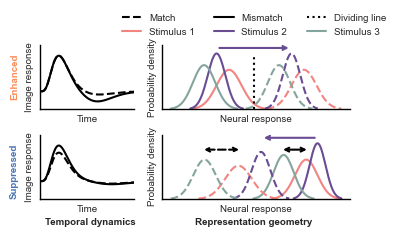

In [47]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats import gamma
from matplotlib.lines import Line2D

# 时间轴
t = np.linspace(0, 30, 300)

# HRF 函数
def hrf(t, peak=6, undershoot=20, p_ratio=0.167):
    hrf_peak = gamma.pdf(t, peak)
    hrf_undershoot = gamma.pdf(t, undershoot)
    hrf_curve = hrf_peak - p_ratio * hrf_undershoot
    return hrf_curve / np.max(hrf_curve)  # 归一化到1

# Cond A
hrf_A = hrf(t)

# Cond B，整体缩小幅度（例如 0.7 倍）
hrf_B = 0.8 * hrf_A

# 绘图
colors = ['black',
          'black']
fig = plt.figure(figsize=(4, 2))
gs = fig.add_gridspec(2, 2, width_ratios=[1, 2], wspace=0.2, hspace=0.4)

ax = fig.add_subplot(gs[1, 0])
ax.plot(t, hrf_A, linestyle='-', color=colors[0], linewidth=1.5, label='Cond A')
ax.plot(t, hrf_B, linestyle='--', color=colors[1], linewidth=1.5, label='Cond B')

ax.set_xlabel('Time', fontsize=fontsize, fontproperties='Arial')
ax.set_ylabel('Image response', fontsize=fontsize, fontproperties='Arial')
ax.set_xticks([])  # 不显示 x 轴刻度
ax.set_yticks([])
ax.grid(False)
# 移除图表的边框
for spine in ax.spines.values():
    spine.set_visible(False)

ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(1)
ax.spines['left'].set_color('black')

ax.set_xlim(0, 25)
ax.set_ylim(-0.5, 1.3)

import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats import gamma
from matplotlib.lines import Line2D

t = np.linspace(0, 30, 300)

def hrf(t, peak=6, undershoot=16, p_ratio=0.167):
    """双 Gamma HRF"""
    hrf_peak = gamma.pdf(t, peak)
    hrf_undershoot = gamma.pdf(t, undershoot)
    hrf_curve = hrf_peak - p_ratio * hrf_undershoot
    # 归一化到峰值1
    hrf_curve = hrf_curve / np.max(hrf_curve)
    return hrf_curve

# Cond A: 原始 HRF
hrf_A = hrf(t, peak=6, undershoot=16, p_ratio=0.167)

# Cond B: 峰值一样，但下降更低
hrf_B = hrf(t, peak=6, undershoot=16, p_ratio=0.5)  # 增大 p_ratio → 尾部更低

# 绘图
colors = ['black',
         'black']
ax = fig.add_subplot(gs[0, 0])
ax.plot(t, hrf_B, linestyle='-', color=colors[0], linewidth=1.5, label='Cond B')
ax.plot(t, hrf_A, linestyle='--', color=colors[1], linewidth=1.5, label='Cond A')


ax.set_xlabel('Time', fontsize=fontsize, fontproperties='Arial')
ax.set_ylabel('Image response', fontsize=fontsize, fontproperties='Arial')
ax.set_xticks([])  # 不显示 x 轴刻度
ax.set_yticks([])
ax.grid(False)
# 移除图表的边框
for spine in ax.spines.values():
    spine.set_visible(False)

ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(1)
ax.spines['left'].set_color('black')

ax.set_xlim(0, 25)
ax.set_ylim(-0.5, 1.3)

import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

x = np.linspace(-8, 8, 600)
ax = fig.add_subplot(gs[1, 1])

# 原始分布 (condition A)
stimuli_orig = {
    "Stimulus 1": (4.0, 1.0),
    "Stimulus 2": (5.0, 0.5),
    "Stimulus 3": (2.0, 0.8),
}

# 新条件 (condition B)，整体左移且间隔更大
stimuli_shifted = {
    "Stimulus 1": (-2.0, 1.4),
    "Stimulus 2": (0.0, 0.7),
    "Stimulus 3": (-5.0, 1.0),
}

# 为 Stimulus 1/2/3 设置固定颜色
colors = {
    "Stimulus 1": "#f28482",  # 粉橘
    "Stimulus 2": "#6a4c93",  # 青绿
    "Stimulus 3": "#84a59d",  # 紫色
}
# 绘制原始分布 (实线, Cond A)
for stim, (mu, var) in stimuli_orig.items():
    sigma = np.sqrt(var)
    mask = (x >= mu - 3*sigma) & (x <= mu + 3*sigma)
    pdf = 1/np.sqrt(2*np.pi*var) * np.exp(-(x-mu)**2/(2*var))
    ax.plot(x[mask], pdf[mask], linewidth=1.5, color=colors[stim], linestyle="-", label=f"{stim} - Cond A")

# 绘制新条件 (Cond B, 虚线, 只画均值±2σ)
for stim, (mu, var) in stimuli_shifted.items():
    sigma = np.sqrt(var)
    mask = (x >= mu - 3*sigma) & (x <= mu + 3*sigma)
    pdf = 1/np.sqrt(2*np.pi*var) * np.exp(-(x-mu)**2/(2*var))
    ax.plot(x[mask], pdf[mask], linewidth=1.5, color=colors[stim], linestyle="--", label=f"{stim} - Cond B")

ax.set_xlabel('Neural response', fontsize=fontsize, fontproperties='Arial')
ax.set_ylabel('Probability density', fontsize=fontsize, fontproperties='Arial')
ax.set_xticks([])  # 不显示 x 轴刻度
ax.set_yticks([])
ax.grid(False)
# 移除图表的边框
for spine in ax.spines.values():
    spine.set_visible(False)

ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(1)
ax.spines['left'].set_color('black')

mu_A, var_A = stimuli_orig["Stimulus 2"]
mu_B, var_B = stimuli_shifted["Stimulus 2"]

y_pos = 0.62  # 箭头的垂直位置
ax.annotate(
    "",
    xy=(mu_B, y_pos), xycoords="data",
    xytext=(mu_A, y_pos), textcoords="data",
    arrowprops=dict(arrowstyle="->", color=colors["Stimulus 2"], lw=1.5)
)

ax.set_ylim(0, 0.65)

# === Cond A: Stim 1 ↔ Stim 3 ===
mu1_A, _ = stimuli_orig["Stimulus 1"]
mu3_A, _ = stimuli_orig["Stimulus 3"]
y_pos = 0.5  # 箭头高度，可以调节
ax.annotate(
    "",
    xy=(mu3_A-0.3, y_pos), xycoords="data",
    xytext=(mu1_A+0.3, y_pos), textcoords="data",
    arrowprops=dict(arrowstyle="<->", color="black", lw=1.5)
)

# === Cond B: Stim 1 ↔ Stim 3 ===
mu1_B, _ = stimuli_shifted["Stimulus 1"]
mu3_B, _ = stimuli_shifted["Stimulus 3"]
y_pos = 0.5  # 同样的高度，可以单独调整
ax.annotate(
    "",
    xy=(mu3_B-0.3, y_pos), xycoords="data",
    xytext=(mu1_B+0.3, y_pos), textcoords="data",
    arrowprops=dict(arrowstyle="<->", color="black", lw=1.5, linestyle="--")
)
import os
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-8, 8, 600)
ax = fig.add_subplot(gs[0, 1])

# 原始分布 (condition A)
stimuli_orig = {
    "Stimulus 1": (-1.0, 1.0),
    "Stimulus 2": (-2.0, 0.5),
    "Stimulus 3": (-3, 0.8),
}

# 新条件 (condition B)，均值更大，但方差不变
stimuli_shifted = {
    "Stimulus 1": (5.0, 1.0),
    "Stimulus 2": (4.0, 0.5),
    "Stimulus 3": (3, 0.8),
}

# 绘制原始分布 (实线, Cond A)
for stim, (mu, var) in stimuli_orig.items():
    sigma = np.sqrt(var)
    mask = (x >= mu - 3*sigma) & (x <= mu + 3*sigma)
    pdf = 1/np.sqrt(2*np.pi*var) * np.exp(-(x-mu)**2/(2*var))
    ax.plot(x[mask], pdf[mask], linewidth=1.5, color=colors[stim], linestyle="-", label=f"{stim} - Cond A")

# 绘制新条件 (Cond B, 虚线, 只画均值±2σ)
for stim, (mu, var) in stimuli_shifted.items():
    sigma = np.sqrt(var)
    mask = (x >= mu - 3*sigma) & (x <= mu + 3*sigma)
    pdf = 1/np.sqrt(2*np.pi*var) * np.exp(-(x-mu)**2/(2*var))
    ax.plot(x[mask], pdf[mask], linewidth=1.5, color=colors[stim], linestyle="--", label=f"{stim} - Cond B")

ax.set_xlabel('Neural response', fontsize=fontsize, fontproperties='Arial')
ax.set_ylabel('Probability density', fontsize=fontsize, fontproperties='Arial')
ax.set_xticks([])  # 不显示 x 轴刻度
ax.set_yticks([])
ax.grid(False)
# 移除图表的边框
for spine in ax.spines.values():
    spine.set_visible(False)

ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(1)
ax.spines['left'].set_color('black')

mu_A, var_A = stimuli_orig["Stimulus 2"]
mu_B, var_B = stimuli_shifted["Stimulus 2"]

y_pos = 0.62  # 箭头的垂直位置
ax.annotate(
    "",
    xy=(mu_B, y_pos), xycoords="data",
    xytext=(mu_A, y_pos), textcoords="data",
    arrowprops=dict(arrowstyle="->", color=colors["Stimulus 2"], lw=1.5)
)

# === 找 Cond A 和 Cond B 的范围中点 ===
mu_A_min = min([mu for mu, _ in stimuli_orig.values()])
mu_A_max = max([mu for mu, _ in stimuli_orig.values()])
mid_A = (mu_A_min + mu_A_max) / 2

mu_B_min = min([mu for mu, _ in stimuli_shifted.values()])
mu_B_max = max([mu for mu, _ in stimuli_shifted.values()])
mid_B = (mu_B_min + mu_B_max) / 2

# 两个条件的整体中点
cond_mid = (mid_A + mid_B) / 2

# === 在图上画竖直虚线 ===
ax.vlines(
    cond_mid, ymin=0, ymax=0.55,
    color="black", linestyle=":", lw=1.5
)

ax.set_ylim(0, 0.65)

# 条件图例（黑色线型）
cond_match = Line2D([0], [0], color='black', linestyle='--', linewidth=1.5, label='Match')
cond_mismatch = Line2D([0], [0], color='black', linestyle='-', linewidth=1.5, label='Mismatch')
cond_dividing = Line2D([0], [0], color='black', linestyle=':', linewidth=1.5, label='Dividing line')

# 刺激图例（颜色线）
stim1 = Line2D([0], [0], color=colors['Stimulus 1'], linestyle='-', linewidth=1.5, label='Stimulus 1')
stim2 = Line2D([0], [0], color=colors['Stimulus 2'], linestyle='-', linewidth=1.5, label='Stimulus 2')
stim3 = Line2D([0], [0], color=colors['Stimulus 3'], linestyle='-', linewidth=1.5, label='Stimulus 3')

# 整合所有 handles
handles = [cond_match, stim1, cond_mismatch, stim2, cond_dividing, stim3]
# fig.legend(handles=handles, loc='upper center', ncol=3, fontsize=fontsize, frameon=False, handlelength=2, bbox_to_anchor=(0.48, 1.08))
fig.legend(handles=handles, loc='upper center', ncol=3, fontsize=fontsize, frameon=False, handlelength=2, bbox_to_anchor=(0.66, 1.08))

colors = ['#FC8C5A', '#4B74B2']
fig.text(0.25, -0.02, 'Temporal dynamics', ha='center', fontsize=fontsize, fontproperties='Arial', fontweight='bold')
fig.text(0.66, -0.02, 'Representation geometry', ha='center', fontsize=fontsize, fontproperties='Arial', fontweight='bold')
fig.text(0.05, 0.25, 'Suppressed', va='center', rotation='vertical', fontsize=fontsize, fontproperties='Arial', fontweight='bold', color=colors[1])
fig.text(0.05, 0.72, 'Enhanced', va='center', rotation='vertical', fontsize=fontsize, fontproperties='Arial', fontweight='bold', color=colors[0])

fig.savefig(os.path.join(Figure_root, 'Fig.0 - d.png'), format="png", dpi=500, bbox_inches="tight")

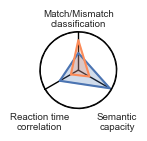

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
import os

# 定义三个维度
labels = ["Reaction time\ncorrelation", "Semantic\ncapacity", "Match/Mismatch\nclassification"]
n = len(labels)

# Suppressed 和 Enhanced 的值（假设分数，范围0-1）
suppressed = [0.5, 0.85, 0.4]  # 高RT相关，高语义，低匹配特征
enhanced   = [0.2, 0.3, 0.7]   # 低RT相关，低语义，高匹配特征

# 角度设置
angles = np.linspace(0, 2*np.pi, n, endpoint=False).tolist()
suppressed += suppressed[:1]
enhanced   += enhanced[:1]
angles     += angles[:1]

# 绘图
fig, ax = plt.subplots(figsize=(1, 1), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.deg2rad(210))
colors = ['#FC8C5A', '#4B74B2']
# Suppressed
ax.plot(angles, suppressed, color=colors[1], linewidth=1.5)
ax.fill(angles, suppressed, color=colors[1], alpha=0.25)

# Enhanced
ax.plot(angles, enhanced, color=colors[0], linewidth=1.5)
ax.fill(angles, enhanced, color=colors[0], alpha=0.25)

# 设置刻度
ax.set_xticks(angles[:-1])
ax.set_xticklabels([], fontsize=10)
ax.set_yticks([0.2, 0.4, 0.6, 0.8])
ax.set_yticklabels([])  # 去掉半径刻度
ax.set_ylim(0, 0.9)

# 去掉圆线，只保留径向线
ax.spines['polar'].set_visible(True)
ax.spines['polar'].set_color('black')
ax.grid(True)  # 去掉网格
for line in ax.yaxis.get_gridlines():
    line.set_visible(False)
for line in ax.xaxis.get_gridlines():
    line.set_color("black")
    line.set_linewidth(1)
circle = plt.Circle((0,0), 0.9, transform=ax.transData._b,
                    fill=False, color="black", linewidth=1.5)
ax.add_artist(circle)

# 外移标签
angle_shift = [0.4, -0.4, 0]
pos = [1.5, 1.5, 1.2]
for index, (angle, lab) in enumerate(zip(angles[:-1], labels)):
    ax.text(angle+angle_shift[index], pos[index], lab, fontsize=fontsize, ha="center", va="center", fontproperties='Arial')

Suppressed = Line2D([0], [0], color=colors[1], linestyle='-', linewidth=1.5, label='Suppressed')
Enhanced = Line2D([0], [0], color=colors[0], linestyle='-', linewidth=1.5, label='Enhanced')
handles = [Suppressed, Enhanced]
# fig.legend(handles=handles, loc='upper center', ncol=2, fontsize=fontsize, frameon=False, handlelength=2, bbox_to_anchor=(0.6, 1.3))

fig.savefig(os.path.join(Figure_root, 'Fig.0 - d_2.png'), format="png", dpi=500, bbox_inches="tight")

# Figure 1 - a

Background RRGGBBAA: ffffff00
Area 0:0:2274.66:1024 exported to 2275 x 1024 pixels (96 dpi)
Background RRGGBBAA: ffffff00
Area 0:0:2274.66:1024 exported to 2275 x 1024 pixels (96 dpi)


/tmp/ipykernel_38967/857038006.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Blues')


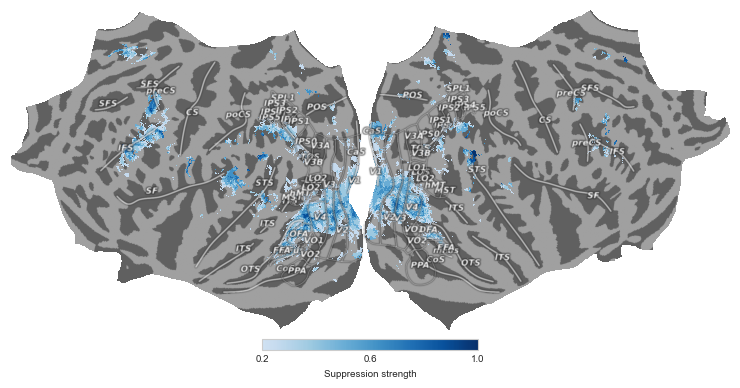

In [5]:
# Fig 1 - a
import os
import cortex
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

mpl.rcParams['svg.fonttype'] = 'none'

lh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/ONOFF_lh.csv')
rh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/ONOFF_rh.csv')

onoff = pd.concat([lh, rh])
onoff_data = onoff.to_numpy()
onoff_data = onoff_data.T

lh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/suppression_enhance_area_lh.csv')
rh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/suppression_enhance_area_rh.csv')

onoff = pd.concat([lh, rh])
data = onoff.to_numpy()
data = data.T
data[0] = np.where(onoff_data[2] < 1, np.nan, data[0])
data[0] = np.where(data[0] > 0.2, data[0], np.nan)

fig= plt.figure(figsize=(2 * pycortex_figheight, pycortex_figheight))
surface = cortex.dataset.Vertex(data[0], subject='fsaverage', vmin=0, vmax=1, cmap='Blues')
img = cortex.quickflat.make_figure(surface, dpi=300, with_colorbar=False, with_curvature=True, with_sulci=True, with_rois=True, with_labels=True, labelsize=str(pycortex_fontsize)+"pt", colorbar_location=(0.4, 0, 0.2, 0.02), fig=fig)

cmap = plt.cm.get_cmap('Blues')
truncated_cmap = mcolors.LinearSegmentedColormap.from_list('truncated_Blues', cmap(np.linspace(0.2, 1.0, 256)))
norm = mcolors.Normalize(vmin=0.2, vmax=1.0)
sm = plt.cm.ScalarMappable(cmap=truncated_cmap, norm=norm)
cb = plt.colorbar(sm, ax=fig.axes[-1], fraction=0.03, pad=0.015, orientation="horizontal")
cb.set_ticks([0.2, 0.6, 1.0])
cb.ax.set_xticklabels(['0.2', '0.6', '1.0'])  # 或 ['Low', 'Mid', 'Enhance']
cb.ax.tick_params(labelsize=fontsize)
cb.ax.tick_params(axis='x', length=0)

for label in cb.ax.get_xticklabels():
    label.set_fontfamily('Arial')  # 设置字体为 Arial

# 添加 colorbar 上方的标题标签
cb.set_label("Suppression strength", labelpad=4, fontsize=fontsize, fontfamily='Arial', fontweight='normal', rotation=0)
cb.ax.xaxis.set_label_position('bottom')

fig.savefig(os.path.join(Figure_root, "Fig.1 - a.png"), format="png", dpi=500, bbox_inches="tight")

C:\Users\DELL\AppData\Local\Temp\ipykernel_42924\4046575061.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar(sm, cax=ax, orientation="vertical")


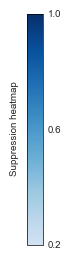

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

fig, ax = plt.subplots(figsize=(0.2, 3))
cmap = plt.cm.get_cmap('Blues')
truncated_cmap = mcolors.LinearSegmentedColormap.from_list('truncated_Blues', cmap(np.linspace(0.2, 1.0, 256)))
norm = mcolors.Normalize(vmin=0.2, vmax=1.0)
sm = plt.cm.ScalarMappable(cmap=truncated_cmap, norm=norm)
cb = plt.colorbar(sm, cax=ax, orientation="vertical")

cb.set_ticks([0.2, 0.6, 1.0])
cb.ax.set_yticklabels(['0.2', '0.6', '1.0'])
cb.ax.tick_params(labelsize=fontsize)
cb.ax.tick_params(axis='y', length=0)

# 添加在 colorbar 顶部的 label
cb.set_label("Suppression heatmap", labelpad=6, fontsize=fontsize, rotation=90)
cb.ax.yaxis.set_label_position('left')  # 把 label 放在右侧顶部
cb.outline.set_linewidth(0.5)
cb.outline.set_edgecolor('black')

fig.savefig(os.path.join(Figure_root, "Fig.1 - a_colorbar.png"), format="png", dpi=500, bbox_inches="tight")

Background RRGGBBAA: ffffff00
Area 0:0:2274.66:1024 exported to 2275 x 1024 pixels (96 dpi)
Background RRGGBBAA: ffffff00
Area 0:0:2274.66:1024 exported to 2275 x 1024 pixels (96 dpi)


/tmp/ipykernel_8999/3542079154.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds')


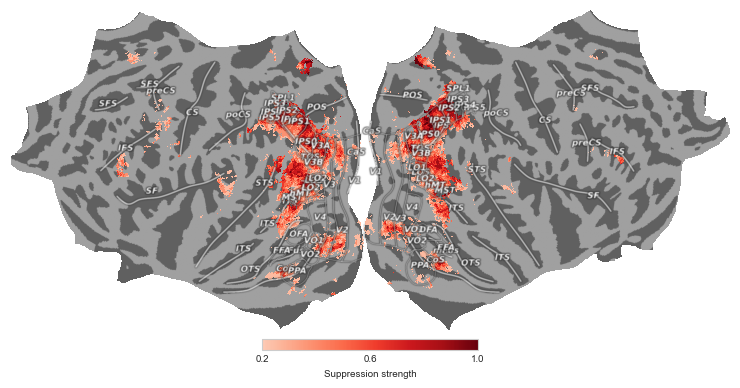

In [4]:
# Fig 1 - a
import os
import cortex
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

mpl.rcParams['svg.fonttype'] = 'none'

lh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/ONOFF_lh.csv')
rh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/ONOFF_rh.csv')

onoff = pd.concat([lh, rh])
onoff_data = onoff.to_numpy()
onoff_data = onoff_data.T

lh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/suppression_enhance_area_lh.csv')
rh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/suppression_enhance_area_rh.csv')

onoff = pd.concat([lh, rh])
data = onoff.to_numpy()
data = data.T
data[1] = np.where(onoff_data[2] < 1, np.nan, data[1])
data[1] = np.where(data[1] > 0.2, data[1], np.nan)

fig= plt.figure(figsize=(2 * pycortex_figheight, pycortex_figheight))
surface = cortex.dataset.Vertex(data[1], subject='fsaverage', vmin=0, vmax=1, cmap='Reds')
img = cortex.quickflat.make_figure(surface, dpi=500, with_colorbar=False, with_curvature=True, with_sulci=True, with_rois=True, with_labels=True, labelsize=str(pycortex_fontsize)+"pt", colorbar_location=(0.4, 0, 0.2, 0.02), fig=fig)

cmap = plt.cm.get_cmap('Reds')
truncated_cmap = mcolors.LinearSegmentedColormap.from_list('truncated_reds', cmap(np.linspace(0.2, 1.0, 256)))
norm = mcolors.Normalize(vmin=0.2, vmax=1.0)
sm = plt.cm.ScalarMappable(cmap=truncated_cmap, norm=norm)
cb = plt.colorbar(sm, ax=fig.axes[-1], fraction=0.03, pad=0.015, orientation="horizontal")
cb.set_ticks([0.2, 0.6, 1.0])
cb.ax.set_xticklabels(['0.2', '0.6', '1.0'])  # 或 ['Low', 'Mid', 'Enhance']
cb.ax.tick_params(labelsize=fontsize)
cb.ax.tick_params(axis='x', length=0)

for label in cb.ax.get_xticklabels():
    label.set_fontfamily('Arial')  # 设置字体为 Arial

# 添加 colorbar 上方的标题标签
cb.set_label("Suppression strength", labelpad=4, fontsize=fontsize, fontfamily='Arial', fontweight='normal', rotation=0)
cb.ax.xaxis.set_label_position('bottom')

fig.savefig(os.path.join(Figure_root, "Sup - enhance_area.png"), format="png", dpi=500, bbox_inches="tight")

/tmp/ipykernel_8999/3845106346.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds')


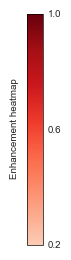

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

fig, ax = plt.subplots(figsize=(0.2, 3))
cmap = plt.cm.get_cmap('Reds')
truncated_cmap = mcolors.LinearSegmentedColormap.from_list('truncated_reds', cmap(np.linspace(0.2, 1.0, 256)))
norm = mcolors.Normalize(vmin=0.2, vmax=1.0)
sm = plt.cm.ScalarMappable(cmap=truncated_cmap, norm=norm)
cb = plt.colorbar(sm, cax=ax, orientation="vertical")

cb.set_ticks([0.2, 0.6, 1.0])
cb.ax.set_yticklabels(['0.2', '0.6', '1.0'])
cb.ax.tick_params(labelsize=fontsize)
cb.ax.tick_params(axis='y', length=0)

# 添加在 colorbar 顶部的 label
cb.set_label("Enhancement heatmap", labelpad=6, fontsize=fontsize, rotation=90)
cb.ax.yaxis.set_label_position('left')  # 把 label 放在右侧顶部
cb.outline.set_linewidth(0.5)
cb.outline.set_edgecolor('black')

fig.savefig(os.path.join(Figure_root, "Sup - enhance_colorbar.png"), format="png", dpi=500, bbox_inches="tight")

# Figure 1 - b

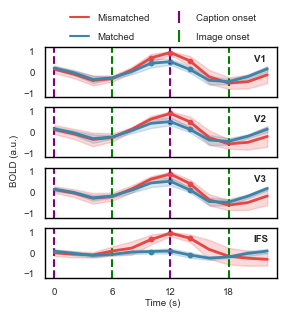

In [346]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import detrend
from scipy.stats import ttest_rel, wilcoxon
from statsmodels.stats.multitest import multipletests
import os

# 创建一个图形
# fig, ax = plt.subplots(figsize=(8, 5))

subjects = ['S1_LiJiawei', 'S2_ChenPeili', 'S3_WangZhenjie', 'S4_WangRuoming', 'S5_FangYu', 'S6_WuJinze', 'S7_LiuAnglin', 'S8_ChenQian']
# subjects = ['S1_LiJiawei', 'S2_ChenPeili', 'S3_WangZhenjie', 'S4_WangRuoming', 'S5_FangYu', 'S7_LiuAnglin','S8_ChenQian']
# 存储每个ROI的方差数据
all_std = []
roi_labels = ['V1', 'V2', 'V3', 'Suppression']
colors = ['#e84545',
          '#3d84a8']
mean_dif = []

# 遍历每个ROI文件
ts_dict_unmatch = {
    'V1': [],
    'V2': [],
    'V3': [],
    'IFS': []
}
ts_dict_match = {
    'V1': [],
    'V2': [],
    'V3': [],
    'IFS': []
}
for subject in subjects:
    for idx, t in enumerate(['V1.txt', 'V2.txt', 'V3.txt', 'IFS.txt']):
        # 加载ROI数据
        roi = np.loadtxt(os.path.join('D:/Dataset/Cross_modal/Processed_Data/', subject, 'ROI', t)).astype(int)
        data_unmatched = np.load('D:/' + subject + '_mean_ts_unmatch_main.npy')
        data_matched = np.load('D:/' + subject + '_mean_ts.npy')

        # 获取ROI对应的时间序列
        data_unmatched = data_unmatched[roi]
        data_matched = data_matched[roi]

        # # 去趋势
        # data_unmatched = detrend(data_unmatched).T
        # data_matched = detrend(data_matched).T
        data_unmatched = data_unmatched.T
        data_matched = data_matched.T

        mean_unmatched = np.mean(data_unmatched, axis=1)
        mean_matched = np.mean(data_matched, axis=1)

        # mean_unmatched = mean_unmatched - mean_unmatched[3]
        # mean_matched = mean_matched - mean_matched[3]

        max = np.max([np.max(np.abs(mean_unmatched)), np.max(np.abs(mean_matched))])
        mean_unmatched /= max
        mean_matched /= max

        ts_dict_unmatch[t[:-4]].append(mean_unmatched[:12])
        ts_dict_match[t[:-4]].append(mean_matched[:12])

fig = plt.figure(figsize=(3, 3))
time_points = np.arange(12) * 2
for index, k in enumerate(ts_dict_match.keys()):
    a = np.array(ts_dict_unmatch[k])
    b = np.array(ts_dict_match[k])
    p_values = []
    # 对每个时间点进行配对 t 检验
    for time_idx in range(a.shape[1]):
        t_stat, p_val = ttest_rel(a[:, time_idx], b[:, time_idx])
        # t_stat, p_val = wilcoxon(a[:, time_idx], b[:, time_idx])
        p_values.append(p_val)

    # 转为 NumPy 数组
    p_values = np.array(p_values)

    alpha = 0.05  # 设置置信水平为 0.1
    significant, p_values_corrected, _, _ = multipletests(p_values, alpha=alpha, method='fdr_bh')

    # 可视化结果
    time_points = np.arange(12) * 2

    ax = fig.add_subplot(4, 1, index+1)

    ax.axvline(x=0, color="purple", linestyle="--", linewidth=1.5)
    ax.axvline(x=12, color="purple", linestyle="--", linewidth=1.5)

    ax.axvline(x=6, color="green", linestyle="--", linewidth=1.5)
    ax.axvline(x=18, color="green", linestyle="--", linewidth=1.5)

    ax.plot(time_points, np.mean(ts_dict_unmatch[k], axis=0), color=colors[0], label='unmatched', linewidth=2)
    ax.plot(time_points, np.mean(ts_dict_match[k], axis=0), color=colors[1], label='matched', linewidth=2)

    for idx, is_significant in enumerate(significant):
        if is_significant:
            ax.scatter(time_points[idx], np.mean(a[:, idx]), color=colors[0], s=10, label="Significant" if idx == 0 else "")
            ax.scatter(time_points[idx], np.mean(b[:, idx]), color=colors[1], s=10, label="Significant" if idx == 0 else "")


    plt.fill_between(time_points, np.mean(ts_dict_unmatch[k], axis=0) - np.std(ts_dict_unmatch[k], axis=0),
                     np.where(np.mean(ts_dict_unmatch[k], axis=0) + np.std(ts_dict_unmatch[k], axis=0)>1, 1, np.mean(ts_dict_unmatch[k], axis=0) + np.std(ts_dict_unmatch[k], axis=0)),
                     color=colors[0], alpha=0.2, label="Mean ± Std Dev")

    plt.fill_between(time_points, np.mean(ts_dict_match[k], axis=0) - np.std(ts_dict_match[k], axis=0),
                     np.where(np.mean(ts_dict_match[k], axis=0) + np.std(ts_dict_match[k], axis=0)>1, 1, np.mean(ts_dict_match[k], axis=0) + np.std(ts_dict_match[k], axis=0)),
                     color=colors[1], alpha=0.2, label="Mean ± Std Dev")



    ax.text(0.9, 0.85, k, transform=ax.transAxes, ha='left', va='top', fontsize=fontsize, fontweight='bold')

    ax.set_xlim(-1, 23)
    ax.set_ylim(-1.2, 1.2)

    if index != 3:
        ax.set_xticks([])  # 不显示刻度线和标签
    else:
        ax.set_xticks([0, 6, 12, 18])
    ax.set_yticks([-1, 0, 1])

    ax.grid(False)
    for spine in ax.spines.values():
        spine.set_edgecolor('black')   # 设置颜色
        spine.set_linewidth(1)

handles = [
    plt.Line2D([0], [0], color=colors[0], label="Mismatched", linewidth=1.5),
    plt.Line2D([0], [0], color=colors[1], label="Matched", linewidth=1.5),
    plt.Line2D([0], [0], color="purple", marker='|', linestyle='None', markersize=8, markeredgewidth=1.5, label="Caption onset"),
    plt.Line2D([0], [0], color="green", marker='|', linestyle='None', markersize=8, markeredgewidth=1.5, label="Image onset"),
]
fig.legend(handles=handles, loc="upper center", ncol=2, fontsize=fontsize, frameon=False, bbox_to_anchor=(0.52, 1.02), labelspacing=1.02)
fig.supylabel('BOLD (a.u.)', fontsize=fontsize, x=0.01)
fig.supxlabel('Time (s)', fontsize=fontsize, x=0.52)

fig.savefig(os.path.join(Figure_root, "Fig.1 - b.png"), format="png", dpi=500, bbox_inches="tight")

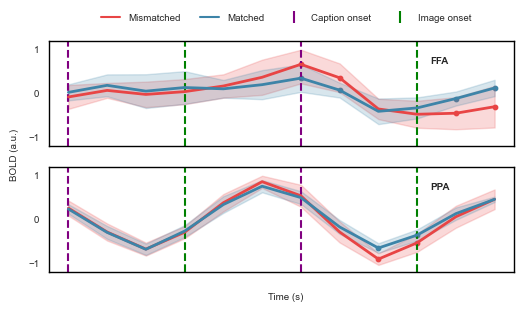

In [347]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import detrend
from scipy.stats import ttest_rel, wilcoxon
from statsmodels.stats.multitest import multipletests
import os

# 创建一个图形
# fig, ax = plt.subplots(figsize=(8, 5))

subjects = ['S1_LiJiawei', 'S2_ChenPeili', 'S3_WangZhenjie', 'S4_WangRuoming', 'S5_FangYu', 'S6_WuJinze', 'S7_LiuAnglin', 'S8_ChenQian']
# subjects = ['S1_LiJiawei', 'S2_ChenPeili', 'S3_WangZhenjie', 'S4_WangRuoming', 'S5_FangYu', 'S7_LiuAnglin','S8_ChenQian']
# 存储每个ROI的方差数据
all_std = []
roi_labels = ['FFA', 'PPA']
colors = ['#e84545',
          '#3d84a8']
mean_dif = []

# 遍历每个ROI文件
ts_dict_unmatch = {
    'Face': [],
    'Place': []
}
ts_dict_match = {
    'Face': [],
    'Place': []
}
for subject in subjects:
    for idx, t in enumerate(['Face.txt', 'Place.txt']):
        # 加载ROI数据
        roi = np.loadtxt(os.path.join('D:/Dataset/Cross_modal/Processed_Data/', subject, 'ROI', t)).astype(int)
        data_unmatched = np.load('D:/' + subject + '_mean_ts_unmatch_main.npy')
        data_matched = np.load('D:/' + subject + '_mean_ts.npy')

        # 获取ROI对应的时间序列
        data_unmatched = data_unmatched[roi]
        data_matched = data_matched[roi]

        # # 去趋势
        # data_unmatched = detrend(data_unmatched).T
        # data_matched = detrend(data_matched).T
        data_unmatched = data_unmatched.T
        data_matched = data_matched.T

        mean_unmatched = np.mean(data_unmatched, axis=1)
        mean_matched = np.mean(data_matched, axis=1)

        # mean_unmatched = mean_unmatched - mean_unmatched[3]
        # mean_matched = mean_matched - mean_matched[3]

        max = np.max([np.max(np.abs(mean_unmatched)), np.max(np.abs(mean_matched))])
        mean_unmatched /= max
        mean_matched /= max

        ts_dict_unmatch[t[:-4]].append(mean_unmatched[:12])
        ts_dict_match[t[:-4]].append(mean_matched[:12])

fig = plt.figure(figsize=(6, 3))
time_points = np.arange(12) * 2
for index, k in enumerate(ts_dict_match.keys()):
    a = np.array(ts_dict_unmatch[k])
    b = np.array(ts_dict_match[k])
    p_values = []
    # 对每个时间点进行配对 t 检验
    for time_idx in range(a.shape[1]):
        t_stat, p_val = ttest_rel(a[:, time_idx], b[:, time_idx])
        # t_stat, p_val = wilcoxon(a[:, time_idx], b[:, time_idx])
        p_values.append(p_val)

    # 转为 NumPy 数组
    p_values = np.array(p_values)

    # alpha = 0.05  # 设置置信水平为 0.05
    # significant, p_values_corrected, _, _ = multipletests(p_values, alpha=alpha, method='fdr_bh')
    significant = p_values <= 0.05

    # 可视化结果
    time_points = np.arange(12) * 2

    ax = fig.add_subplot(2, 1, index+1)

    ax.axvline(x=0, color="purple", linestyle="--", linewidth=1.5)
    ax.axvline(x=12, color="purple", linestyle="--", linewidth=1.5)

    ax.axvline(x=6, color="green", linestyle="--", linewidth=1.5)
    ax.axvline(x=18, color="green", linestyle="--", linewidth=1.5)

    ax.plot(time_points, np.mean(ts_dict_unmatch[k], axis=0), color=colors[0], label='unmatched', linewidth=2)
    ax.plot(time_points, np.mean(ts_dict_match[k], axis=0), color=colors[1], label='matched', linewidth=2)

    for idx, is_significant in enumerate(significant):
        if is_significant:
            ax.scatter(time_points[idx], np.mean(a[:, idx]), color=colors[0], s=10, label="Significant" if idx == 0 else "")
            ax.scatter(time_points[idx], np.mean(b[:, idx]), color=colors[1], s=10, label="Significant" if idx == 0 else "")


    plt.fill_between(time_points, np.mean(ts_dict_unmatch[k], axis=0) - np.std(ts_dict_unmatch[k], axis=0),
                     np.where(np.mean(ts_dict_unmatch[k], axis=0) + np.std(ts_dict_unmatch[k], axis=0)>1, 1, np.mean(ts_dict_unmatch[k], axis=0) + np.std(ts_dict_unmatch[k], axis=0)),
                     color=colors[0], alpha=0.2, label="Mean ± Std Dev")

    plt.fill_between(time_points, np.mean(ts_dict_match[k], axis=0) - np.std(ts_dict_match[k], axis=0),
                     np.where(np.mean(ts_dict_match[k], axis=0) + np.std(ts_dict_match[k], axis=0)>1, 1, np.mean(ts_dict_match[k], axis=0) + np.std(ts_dict_match[k], axis=0)),
                     color=colors[1], alpha=0.2, label="Mean ± Std Dev")

    if index == 0:
        k = 'FFA'
    else:
        k = 'PPA'
    ax.text(0.82, 0.85, k, transform=ax.transAxes, ha='left', va='top', fontsize=fontsize, fontweight='bold')

    ax.set_xlim(-1, 23)
    ax.set_ylim(-1.2, 1.2)

    if index != 3:
        ax.set_xticks([])  # 不显示刻度线和标签
    else:
        ax.set_xticks([0, 6, 12, 18])
    ax.set_yticks([-1, 0, 1])

    ax.grid(False)
    for spine in ax.spines.values():
        spine.set_edgecolor('black')   # 设置颜色
        spine.set_linewidth(1)

handles = [
    plt.Line2D([0], [0], color=colors[0], label="Mismatched", linewidth=1.5),
    plt.Line2D([0], [0], color=colors[1], label="Matched", linewidth=1.5),
    plt.Line2D([0], [0], color="purple", marker='|', linestyle='None', markersize=8, markeredgewidth=1.5, label="Caption onset"),
    plt.Line2D([0], [0], color="green", marker='|', linestyle='None', markersize=8, markeredgewidth=1.5, label="Image onset"),
]
fig.legend(handles=handles, loc="upper center", ncol=4, fontsize=fontsize, frameon=False, bbox_to_anchor=(0.52, 1.0), labelspacing=1.02)
fig.supylabel('BOLD (a.u.)', fontsize=fontsize, x=0.06)
fig.supxlabel('Time (s)', fontsize=fontsize, x=0.52)

fig.savefig(os.path.join(Figure_root, "Sup - Face&Place_timeseries.png"), format="png", dpi=500, bbox_inches="tight")

# Figure 1 - c

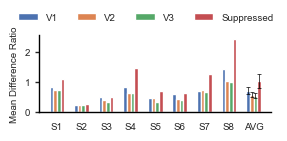

In [348]:
import numpy as np
import matplotlib.pyplot as plt
import os

# 被试列表 + AVG
subjects = ['S1_LiJiawei', 'S2_ChenPeili', 'S3_WangZhenjie', 'S4_WangRuoming', 'S5_FangYu', 'S6_WuJinze', 'S7_LiuAnglin', 'S8_ChenQian']
subjects_labels = [f"S{i+1}" for i in range(len(subjects))] + ['AVG']  # 用短名称

# ROI 名称
roi_labels = ['V1', 'V2', 'V3', 'Suppressed']
roi_num = len(roi_labels)

# 存储所有被试的 mean difference ratio
all_mean_dif = np.zeros((len(subjects), roi_num))

# 遍历每个被试
for sub_idx, subject in enumerate(subjects):
    mean_dif = []

    # 遍历每个 ROI
    for idx, t in enumerate(['V1.txt', 'V2.txt', 'V3.txt', 'EVC_Suppression.txt']):
        # 读取 ROI 数据
        roi = np.loadtxt(os.path.join('D:/Dataset/Cross_modal/Processed_Data/', subject, 'ROI', t)).astype(int)
        data_unmatched = np.load(f'D:/{subject}_mean_ts_unmatch_main.npy')
        data_matched = np.load(f'D:/{subject}_mean_ts.npy')

        # 提取 ROI 对应的时间序列
        data_unmatched = data_unmatched[roi].T
        data_matched = data_matched[roi].T

        # 计算标准差
        std_unmatched = np.std(data_unmatched, axis=0)
        std_matched = np.std(data_matched, axis=0)

        # 计算 mean difference ratio
        mean_dif.append((np.mean(std_unmatched) - np.mean(std_matched)) / np.mean(std_matched))

    # 存储该被试的结果
    all_mean_dif[sub_idx] = mean_dif

# 计算均值和标准误
mean_values = np.mean(all_mean_dif, axis=0)
sem_values = np.std(all_mean_dif, axis=0) / np.sqrt(len(subjects))

# 颜色设置（每个 ROI 一种颜色）
roi_colors = ['#4C72B0', '#DD8452', '#55A868', '#C44E52']  # V1, V2, V3, Suppression

# X 轴的刻度（9 组：8 被试 + 1 AVG）
x = np.arange(len(subjects) + 1)  # 8 subjects + 1 avg
width = 0.15  # 每个 ROI 的柱状图宽度

# 绘制柱状图
fig, ax = plt.subplots(figsize=(3, 1))

# 画每个 ROI 的柱状图
for i in range(roi_num):
    ax.bar(x[:8] + (i - 1.5) * width, all_mean_dif[:, i], width=width, label=roi_labels[i], color=roi_colors[i], alpha=1.0)

# 画 AVG，带误差线
for i in range(roi_num):
    ax.bar([x[-1] + (i - 1.5) * width], [mean_values[i]], yerr=[sem_values[i]], capsize=1.5, error_kw={'capthick': 0.5, 'elinewidth': 0.5}, width=width, color=roi_colors[i], alpha=1.0)

# 设置 X 轴
ax.set_xticks(x)
ax.set_xticklabels(subjects_labels, fontproperties='Arial', fontsize=fontsize)

# Y 轴
plt.tick_params(axis='y', which='both', left=True, length=3, width=1, labelsize=fontsize)
ax.set_ylabel("Mean Difference Ratio", fontproperties='Arial', fontsize=fontsize)

# 设置 legend 在图上方
ax.legend(loc='upper center', bbox_to_anchor=(0.46, 1.4), ncol=4, fontsize=fontsize, frameon=False)

# 添加网格
plt.grid(False)

for spine in ax.spines.values():
    spine.set_visible(False)

# 仅保留 X 和 Y 轴
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_color('black')

# 保存 SVG
fig.savefig(os.path.join(Figure_root, "Fig.1 - c.png"), format="png", dpi=500, bbox_inches="tight")

# Figure 1 - d

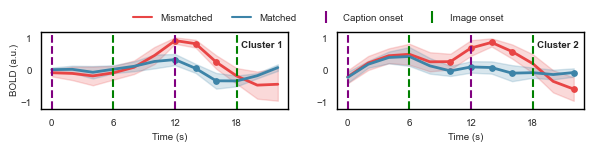

In [349]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from statsmodels.stats.multitest import multipletests
from scipy.stats import ttest_rel
from scipy.signal import detrend

subjects = ['S1_LiJiawei', 'S2_ChenPeili', 'S3_WangZhenjie','S4_WangRuoming', 'S5_FangYu', 'S6_WuJinze', 'S7_LiuAnglin', 'S8_ChenQian']

colors = ['#e84545',
          '#3d84a8']

fig = plt.figure(figsize=(7, 1.0))
for k in range(2):
    ax = fig.add_subplot(1, 2, k+1)
    ts_unmatched_main = []
    ts_unmatched = []
    ts_matched = []
    for subject in subjects:
    # 加载数据（假设已存在）
        suppression = np.loadtxt('D:/Dataset/Cross_modal/Processed_Data/' + subject + '/ROI/EVC_Suppression.txt').astype(int)
        act_2 = np.loadtxt('D:/Dataset/Cross_modal/Processed_Data/' + subject + '/ROI/Act_2.txt').astype(int)

        index = []
        for i in suppression:
            if i not in act_2:
                index.append(i)
        if k == 1:
            index = act_2

        data_unmatched_main_raw = np.load('D:/' + subject + '_mean_ts_unmatch_main.npy')
        data_unmatched_raw = np.load('D:/' + subject + '_mean_ts_unmatch.npy')
        data_matched_raw = np.load('D:/' + subject + '_mean_ts.npy')

        data_unmatched_main_raw = data_unmatched_main_raw[index]
        data_unmatched_raw = data_unmatched_raw[index]
        data_matched_raw = data_matched_raw[index]

        mean_unmatched_main = np.mean(data_unmatched_main_raw.T[:12], axis=1)
        mean_unmatched = np.mean(data_unmatched_raw.T[:12], axis=1)
        mean_matched = np.mean(data_matched_raw.T[:12], axis=1)

        max = np.max([np.max(np.abs(mean_unmatched_main)), np.max(np.abs(mean_unmatched)), np.max(np.abs(mean_matched))])
        mean_unmatched_main /= max
        mean_unmatched /= max
        mean_matched /= max

        ts_unmatched_main.append(mean_unmatched_main)
        ts_unmatched.append(mean_unmatched)
        ts_matched.append(mean_matched)

    # 将数据转为 NumPy 数组
    ts_unmatched_main = np.array(ts_unmatched_main)
    ts_unmatched = np.array(ts_unmatched)  # [被试数 x 时间点数]
    ts_matched = np.array(ts_matched)  # [被试数 x 时间点数]

    p_values = []

    # 对每个时间点进行配对 t 检验
    for time_idx in range(ts_unmatched.shape[1]):
        t_stat, p_val = ttest_rel(ts_unmatched_main[:, time_idx], ts_matched[:, time_idx])
        p_values.append(p_val)

    # 转为 NumPy 数组
    p_values = np.array(p_values)

    # FDR 校正
    alpha = 0.05  # 设置置信水平为 0.1
    significant, p_values_corrected, _, _ = multipletests(p_values, alpha=alpha, method='fdr_bh')

    # 可视化结果
    time_points = np.arange(12) * 2
    ax.plot(time_points, np.mean(ts_unmatched_main, axis=0), color=colors[0], label='Unmatched_main', linewidth=2)
    ax.plot(time_points, np.mean(ts_matched, axis=0), color=colors[1], label='Matched', linewidth=2)

    # 显著性标注
    for idx, is_significant in enumerate(significant):
        if is_significant:
            ax.scatter(time_points[idx], np.mean(ts_unmatched_main[:, idx]), color=colors[0], s=15, label="Significant" if idx == 0 else "")
            ax.scatter(time_points[idx], np.mean(ts_matched[:, idx]), color=colors[1], s=15, label="Significant" if idx == 0 else "")

    ax.fill_between(time_points, np.mean(ts_unmatched_main, axis=0) - np.std(ts_unmatched_main, axis=0),
                     (np.mean(ts_unmatched_main, axis=0) + np.std(ts_unmatched_main, axis=0)),
                    color=colors[0], alpha=0.2, label="Mean ± Std Dev")
    ax.fill_between(time_points, np.mean(ts_matched, axis=0) - np.std(ts_matched, axis=0),
                     np.mean(ts_matched, axis=0) + np.std(ts_matched, axis=0), color=colors[1], alpha=0.2, label="Mean ± Std Dev")

    ax.axvline(x=0, color="purple", linestyle="--", linewidth=1.5)
    ax.axvline(x=12, color="purple", linestyle="--", linewidth=1.5)

    ax.axvline(x=6, color="green", linestyle="--", linewidth=1.5)
    ax.axvline(x=18, color="green", linestyle="--", linewidth=1.5)

    ax.text(0.81, 0.88, 'Cluster '+str(k+1), transform=ax.transAxes, ha='left', va='top', fontsize=fontsize, fontweight='bold')

    plt.xlim(-1, 23)
    plt.ylim(-1.2, 1.2)
    plt.grid(False)
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(1)
        spine.set_color('black')

    ax.set_xticks([0, 6, 12, 18])
    ax.set_yticks([-1, 0, 1])

    ax.set_xlabel('Time (s)', x=0.52)

handles = [
    plt.Line2D([0], [0], color=colors[0], label="Mismatched", linewidth=1.5),
    plt.Line2D([0], [0], color=colors[1], label="Matched", linewidth=1.5),
    plt.Line2D([0], [0], color="purple", marker='|', linestyle='None', markersize=8, markeredgewidth=1.5, label="Caption onset"),
    plt.Line2D([0], [0], color="green", marker='|', linestyle='None', markersize=8, markeredgewidth=1.5, label="Image onset"),
]
fig.legend(handles=handles, loc="upper center", ncol=4, fontsize=fontsize, frameon=False, bbox_to_anchor=(0.52, 1.15))
fig.supylabel("BOLD (a.u.)", fontsize=fontsize, x=0.08)

fig.savefig(os.path.join(Figure_root, "Fig.1 - d.png"), format="png", dpi=500, bbox_inches="tight")

# Figure 2 - b

Background RRGGBBAA: ffffff00
Area 0:0:2274.66:1024 exported to 2275 x 1024 pixels (96 dpi)
Background RRGGBBAA: ffffff00
Area 0:0:2274.66:1024 exported to 2275 x 1024 pixels (96 dpi)


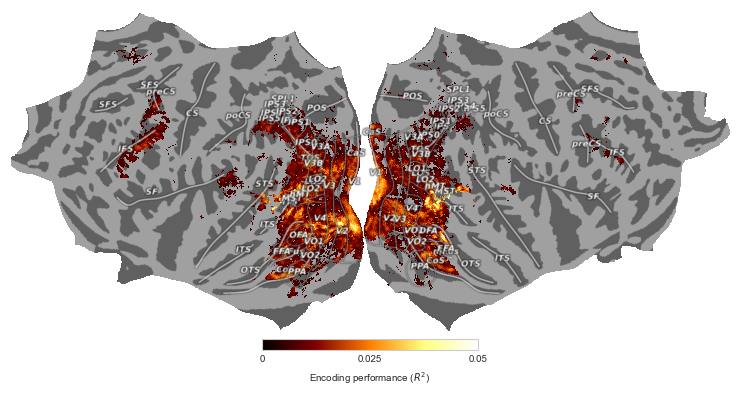

In [9]:
import os
import cortex
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

lh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/ONOFF_lh.csv')
rh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/ONOFF_rh.csv')

onoff = pd.concat([lh, rh])
onoff_data = onoff.to_numpy()
onoff_data = onoff_data.T

# 读取CSV文件
file1_df = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/caption_encoding_performance_lh.csv')
file2_df = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/caption_encoding_performance_rh.csv')

# 合并两个DataFrame
combined_df = pd.concat([file1_df, file2_df])
combined_df = combined_df.replace(0.0, np.nan)

# 将合并后的数据保存到新的CSV文件
data = combined_df.to_numpy()
data = data.T

data = np.where(data < 0.005, np.nan, data)
data = np.where(onoff_data[2] < 1, np.nan, data)

fig= plt.figure(figsize=(2 * pycortex_figheight, pycortex_figheight))
surface = cortex.dataset.Vertex(data[0], subject='fsaverage', cmap='afmhot', vmin=0, vmax=0.05)
img = cortex.quickflat.make_figure(surface, with_colorbar=False, with_curvature=True, with_sulci=True, with_rois=True, with_labels=True, labelsize=str(pycortex_fontsize)+"pt", colorbar_location=(0.4, 0, 0.2, 0.02), fig=fig)

sm = plt.cm.ScalarMappable(cmap='afmhot', norm=plt.Normalize(vmin=0, vmax=0.05))
cb = plt.colorbar(sm, ax=fig.axes[-1], fraction=0.03, pad=0.015, orientation="horizontal")
cb.set_label(r"Encoding performance ($R^2$)", fontsize=fontsize)

cb.set_ticks([0, 0.025, 0.05])
cb.ax.set_xticklabels(['0', '0.025', '0.05'])  # 或 ['Low', 'Mid', 'Enhance']
cb.ax.tick_params(labelsize=fontsize)
cb.ax.tick_params(axis='x', length=0)

fig.savefig(os.path.join(Figure_root, "Fig.2 - a.png"), format="png", dpi=500, bbox_inches="tight")

C:\Users\DELL\AppData\Local\Temp\ipykernel_42924\3588858120.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar(sm, cax=ax, fraction=0.03, pad=0.015, orientation="vertical")


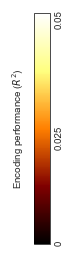

In [7]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

fig, ax = plt.subplots(figsize=(0.2, 3))
sm = plt.cm.ScalarMappable(cmap='afmhot', norm=plt.Normalize(vmin=0, vmax=0.05))
cb = plt.colorbar(sm, cax=ax, fraction=0.03, pad=0.015, orientation="vertical")

cb.set_ticks([0, 0.025, 0.05])
cb.ax.set_yticklabels(['0', '0.025', '0.05'], rotation=90)  # 或 ['Low', 'Mid', 'Enhance']
cb.ax.tick_params(labelsize=fontsize)
cb.ax.tick_params(axis='y', length=0)

# 添加在 colorbar 顶部的 label
cb.set_label(r"Encoding performance ($R^2$)", labelpad=6, fontsize=fontsize, rotation=90)
cb.ax.yaxis.set_label_position('left')  # 把 label 放在右侧顶部
cb.outline.set_linewidth(0.5)
cb.outline.set_edgecolor('black')

fig.savefig(os.path.join(Figure_root, "Fig.2 - a_colorbar.png"), format="png", dpi=500, bbox_inches="tight")

# Figure 2 - d

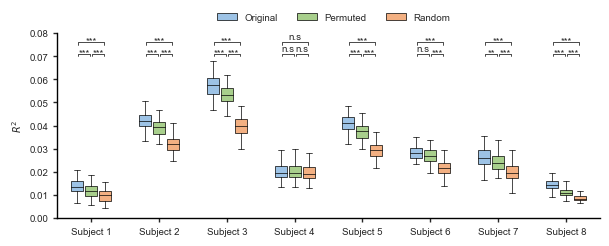

In [87]:
import os
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.stats import ttest_ind, ttest_rel, wilcoxon, mannwhitneyu

CLIP_df = pd.read_csv('D:/cap_results_CLIP_Bert.csv')
CLIP_data = []
for i in range(8):
    normal_temp = []
    shuffle_temp = []
    replace_temp = []
    for j in range(100):
        normal_temp.append(CLIP_df['Normal'][i*100+j])
        shuffle_temp.append(CLIP_df['Shuffle'][i*100+j])
        replace_temp.append(CLIP_df['Replace'][i*100+j])
    CLIP_data.append([normal_temp, shuffle_temp, replace_temp])

colors = [(157/255, 195/255, 230/255),
          (168/255, 207/255, 140/255),
          (243/255, 176/255, 130/255)]

fig, ax = plt.subplots(figsize=(7, 2.4))
xtick_p = []

bar_width = 0.6
space_width = 0.1
subject_space = bar_width * 3 + space_width * 2 + (bar_width + space_width) * 2
for i in range(8):
    position = [0+subject_space*i, bar_width+space_width+subject_space*i, 2*bar_width+2*space_width+subject_space*i]
    box = ax.boxplot(CLIP_data[i], labels=['Normal', 'Shuffle', 'Replace'], positions=position, widths=bar_width, patch_artist=True, showfliers=False)

    c = colors * 8
    for patch, color in zip(box['boxes'], c):
        patch.set_facecolor(color)
    for b in box['boxes']:
        b.set_linewidth(0.5)
    for median in box['medians']:
        median.set_linewidth(0.5)
        median.set_color('black')
    for whisker in box['whiskers']:
        whisker.set_linewidth(0.5)
        whisker.set_color('black')
    for cap in box['caps']:
        cap.set_linewidth(0.5)
        cap.set_color('black')

    xtick_p.append(bar_width+space_width+subject_space*i)

    t_stat, p_value = stats.mannwhitneyu(CLIP_data[i][0], CLIP_data[i][1])
    p_value = p_value * 24
    va = 'center'
    if p_value < 0.001:
        text = '***'
    elif p_value < 0.01:
        text = '**'
    elif p_value < 0.05:
        text = '*'
    else:
        text = 'n.s'
        va = 'bottom'
    plt.text(x=subject_space*i+(bar_width+space_width)/2, y=0.0715, s=text, fontsize=fontsize, ha='center', va=va)
    line_x = [position[0]+0.05, position[0]+0.05, position[1]-0.05, position[1]-0.05]
    line_y = [0.070, 0.071, 0.071, 0.070]
    plt.plot(line_x, line_y, c='black', linewidth=0.5)

    t_stat, p_value = stats.mannwhitneyu(CLIP_data[i][0], CLIP_data[i][2])
    p_value = p_value * 24
    va = 'center'
    if p_value < 0.001:
        text = '***'
    elif p_value < 0.01:
        text = '**'
    elif p_value < 0.05:
        text = '*'
    else:
        text = 'n.s'
        va = 'bottom'
    plt.text(x=bar_width+space_width+subject_space*i, y=0.0765, s=text, fontsize=fontsize, ha='center', va=va)
    line_x = [position[0]+0.05, position[0]+0.05, position[2]-0.05, position[2]-0.05]
    line_y = [0.075, 0.076, 0.076, 0.075]
    plt.plot(line_x, line_y, c='black', linewidth=0.5)

    t_stat, p_value = stats.mannwhitneyu(CLIP_data[i][1], CLIP_data[i][2])
    p_value = p_value * 24
    va = 'center'
    if p_value < 0.001:
        text = '***'
    elif p_value < 0.01:
        text = '**'
    elif p_value < 0.05:
        text = '*'
    else:
        text = 'n.s'
        va = 'bottom'
    plt.text(x=subject_space*i+(bar_width+space_width)*1.5, y=0.0715, s=text, fontsize=fontsize, ha='center', va=va)
    line_x = [position[1]+0.05, position[1]+0.05, position[2]-0.05, position[2]-0.05]
    line_y = [0.070, 0.071, 0.071, 0.070]
    plt.plot(line_x, line_y, c='black', linewidth=0.5)

plt.xticks(xtick_p, ['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4', 'Subject 5', 'Subject 6', 'Subject 7', 'Subject 8'])
plt.xlim(-0.6-0.4, 8 * subject_space - (bar_width + space_width) * 2+0.4)
plt.ylim(0, 0.08)
plt.xticks(fontsize=fontsize, fontproperties='Arial')
plt.yticks(fontsize=fontsize, fontproperties='Arial')
plt.ylabel(r'$R^2$', fontsize=fontsize, fontproperties='Arial')

plt.grid(False)
plt.tick_params(axis='x', which='both', bottom='off', length=3, width=1)
plt.tick_params(axis='y', which='both', left='off', length=3, width=1)

# 移除图表的边框
for spine in ax.spines.values():
    spine.set_visible(False)

# 仅保留 X 和 Y 轴
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_color('black')

handles = [
    mpatches.Patch(facecolor=colors[0], edgecolor='black', linewidth=0.5, label="Original"),
    mpatches.Patch(facecolor=colors[1], edgecolor='black', linewidth=0.5, label="Permuted"),
    mpatches.Patch(facecolor=colors[2], edgecolor='black', linewidth=0.5, label="Random"),
]

fig.legend(handles=handles, loc="upper center", ncol=4, fontsize=fontsize, frameon=False, bbox_to_anchor=(0.52, 1))

fig.savefig(os.path.join(Figure_root, "Fig.2 - d.png"), format="png", dpi=500, bbox_inches="tight")

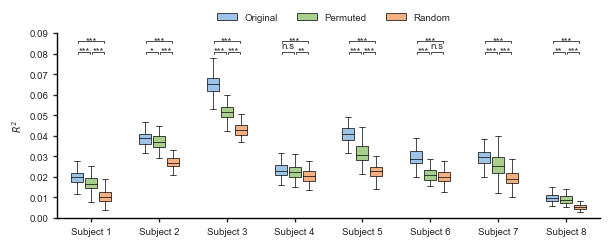

In [86]:
import os
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

CLIP_df = pd.read_csv('D:/cap_results_Bert.csv')
CLIP_data = []
for i in range(8):
    normal_temp = []
    shuffle_temp = []
    replace_temp = []
    for j in range(100):
        normal_temp.append(CLIP_df['Normal'][i*100+j])
        shuffle_temp.append(CLIP_df['Shuffle'][i*100+j])
        replace_temp.append(CLIP_df['Replace'][i*100+j])
    CLIP_data.append([normal_temp, shuffle_temp, replace_temp])

colors = [(157/255, 195/255, 230/255),
          (168/255, 207/255, 140/255),
          (243/255, 176/255, 130/255)]

fig, ax = plt.subplots(figsize=(7, 2.4))
xtick_p = []

bar_width = 0.6
space_width = 0.1
subject_space = bar_width * 3 + space_width * 2 + (bar_width + space_width) * 2
for i in range(8):
    position = [0+subject_space*i, bar_width+space_width+subject_space*i, 2*bar_width+2*space_width+subject_space*i]
    box = ax.boxplot(CLIP_data[i], labels=['Normal', 'Shuffle', 'Replace'], positions=position, widths=bar_width, patch_artist=True, showfliers=False)

    c = colors * 8
    for patch, color in zip(box['boxes'], c):
        patch.set_facecolor(color)
    for b in box['boxes']:
        b.set_linewidth(0.5)
    for median in box['medians']:
        median.set_linewidth(0.5)
        median.set_color('black')
    for whisker in box['whiskers']:
        whisker.set_linewidth(0.5)
        whisker.set_color('black')
    for cap in box['caps']:
        cap.set_linewidth(0.5)
        cap.set_color('black')

    xtick_p.append(bar_width+space_width+subject_space*i)

    t_stat, p_value = stats.mannwhitneyu(CLIP_data[i][0], CLIP_data[i][1])
    p_value = p_value * 24
    va = 'center'
    if p_value < 0.001:
        text = '***'
    elif p_value < 0.01:
        text = '**'
    elif p_value < 0.05:
        text = '*'
    else:
        text = 'n.s'
        va = 'bottom'
    plt.text(x=subject_space*i+(bar_width+space_width)/2, y=0.0815, s=text, fontsize=fontsize, ha='center', va=va)
    line_x = [position[0]+0.05, position[0]+0.05, position[1]-0.05, position[1]-0.05]
    line_y = [0.080, 0.081, 0.081, 0.080]
    plt.plot(line_x, line_y, c='black', linewidth=0.5)

    t_stat, p_value = stats.mannwhitneyu(CLIP_data[i][0], CLIP_data[i][2])
    p_value = p_value * 24
    va = 'center'
    if p_value < 0.001:
        text = '***'
    elif p_value < 0.01:
        text = '**'
    elif p_value < 0.05:
        text = '*'
    else:
        text = 'n.s'
        va = 'bottom'
    plt.text(x=bar_width+space_width+subject_space*i, y=0.0865, s=text, fontsize=fontsize, ha='center', va=va)
    line_x = [position[0]+0.05, position[0]+0.05, position[2]-0.05, position[2]-0.05]
    line_y = [0.085, 0.086, 0.086, 0.085]
    plt.plot(line_x, line_y, c='black', linewidth=0.5)

    t_stat, p_value = stats.mannwhitneyu(CLIP_data[i][1], CLIP_data[i][2])
    p_value = p_value * 24
    va = 'center'
    if p_value < 0.001:
        text = '***'
    elif p_value < 0.01:
        text = '**'
    elif p_value < 0.05:
        text = '*'
    else:
        text = 'n.s'
        va = 'bottom'
    plt.text(x=subject_space*i+(bar_width+space_width)*1.5, y=0.0815, s=text, fontsize=fontsize, ha='center', va=va)
    line_x = [position[1]+0.05, position[1]+0.05, position[2]-0.05, position[2]-0.05]
    line_y = [0.080, 0.081, 0.081, 0.080]
    plt.plot(line_x, line_y, c='black', linewidth=0.5)

plt.xticks(xtick_p, ['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4', 'Subject 5', 'Subject 6', 'Subject 7', 'Subject 8'])
plt.xlim(-0.6-0.4, 8 * subject_space - (bar_width + space_width) * 2+0.4)
plt.ylim(0, 0.09)
plt.xticks(fontsize=fontsize, fontproperties='Arial')
plt.yticks(fontsize=fontsize, fontproperties='Arial')
plt.ylabel(r'$R^2$', fontsize=fontsize, fontproperties='Arial')

plt.grid(False)
plt.tick_params(axis='x', which='both', bottom='off', length=3, width=1)
plt.tick_params(axis='y', which='both', left='off', length=3, width=1)

# 移除图表的边框
for spine in ax.spines.values():
    spine.set_visible(False)

# 仅保留 X 和 Y 轴
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_color('black')

handles = [
    mpatches.Patch(facecolor=colors[0], edgecolor='black', linewidth=0.5, label="Original"),
    mpatches.Patch(facecolor=colors[1], edgecolor='black', linewidth=0.5, label="Permuted"),
    mpatches.Patch(facecolor=colors[2], edgecolor='black', linewidth=0.5, label="Random"),
]

fig.legend(handles=handles, loc="upper center", ncol=4, fontsize=fontsize, frameon=False, bbox_to_anchor=(0.52, 1))

fig.savefig(os.path.join(Figure_root, "Sup - encoding_bert.png"), format="png", dpi=500, bbox_inches="tight")

# Figure 3 - a

/root/anaconda3/envs/tats/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:347: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


Background RRGGBBAA: ffffff00
Area 0:0:2274.66:1024 exported to 2275 x 1024 pixels (96 dpi)
Background RRGGBBAA: ffffff00
Area 0:0:2274.66:1024 exported to 2275 x 1024 pixels (96 dpi)


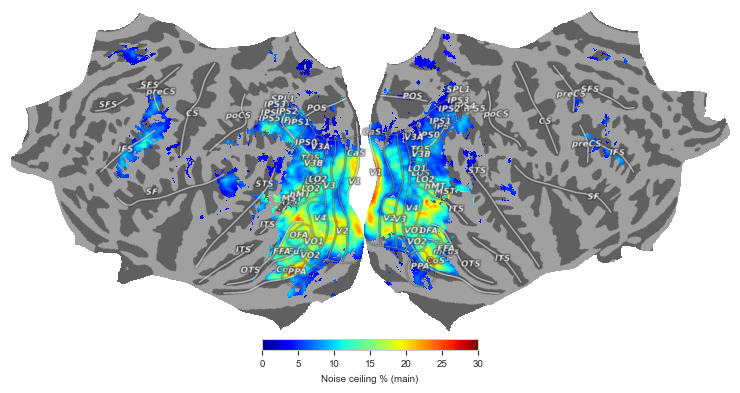

In [8]:
import os
import cortex
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pts, polys = cortex.database.db.get_surf('fsaverage', 'inflated', 'lh')
lh_surface = cortex.polyutils.Surface(pts, polys)

pts, polys = cortex.database.db.get_surf('fsaverage', 'inflated', 'rh')
rh_surface = cortex.polyutils.Surface(pts, polys)

lh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/ONOFF_lh.csv')
rh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/ONOFF_rh.csv')

onoff = pd.concat([lh, rh])
onoff = onoff.to_numpy()
onoff = onoff.T

lh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/noise_ceiling_lh.csv')
rh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/noise_ceiling_rh.csv')

data = pd.concat([lh, rh])
data = data.to_numpy()
data = data.T

for i in range(2):
    data[i, :len(pts)] = lh_surface.smooth(data[i, :len(pts)])
    data[i, len(pts):] = rh_surface.smooth(data[i, len(pts):])

data[0] = np.where(onoff[2] < 1, np.nan, data[0])
data[1] = np.where(onoff[2] < 1, np.nan, data[1])

fig= plt.figure(figsize=(2 * pycortex_figheight, pycortex_figheight))
surface = cortex.dataset.Vertex(data[0], subject='fsaverage', vmin=0, vmax=30, cmap='jet')
img = cortex.quickflat.make_figure(surface, with_colorbar=False, with_curvature=True, with_sulci=True, with_rois=True, with_labels=True, labelsize=str(pycortex_fontsize)+"pt", colorbar_location=(0.4, 0, 0.2, 0.02), fig=fig)

sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=30))
cb = plt.colorbar(sm, ax=fig.axes[-1], fraction=0.03, pad=0.015, orientation="horizontal")
cb.set_label("Noise ceiling % (main)", fontsize=fontsize)
cb.ax.tick_params(labelsize=fontsize)

fig.savefig(os.path.join(Figure_root, "Fig.3 - a.png"), format="png", dpi=500, bbox_inches="tight")

# Figure 3 - b

/root/anaconda3/envs/tats/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:347: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


Background RRGGBBAA: ffffff00
Area 0:0:2274.66:1024 exported to 2275 x 1024 pixels (96 dpi)
Background RRGGBBAA: ffffff00
Area 0:0:2274.66:1024 exported to 2275 x 1024 pixels (96 dpi)


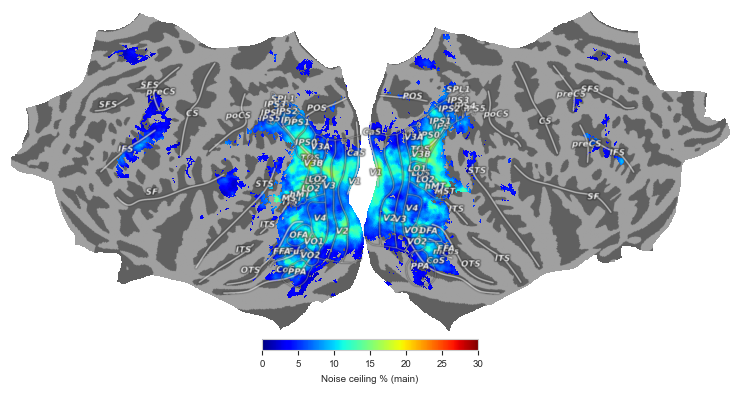

In [9]:
import os
import cortex
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pts, polys = cortex.database.db.get_surf('fsaverage', 'inflated', 'lh')
lh_surface = cortex.polyutils.Surface(pts, polys)

pts, polys = cortex.database.db.get_surf('fsaverage', 'inflated', 'rh')
rh_surface = cortex.polyutils.Surface(pts, polys)

lh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/ONOFF_lh.csv')
rh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/ONOFF_rh.csv')

onoff = pd.concat([lh, rh])
onoff = onoff.to_numpy()
onoff = onoff.T

lh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/noise_ceiling_lh.csv')
rh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/noise_ceiling_rh.csv')

data = pd.concat([lh, rh])
data = data.to_numpy()
data = data.T

for i in range(2):
    data[i, :len(pts)] = lh_surface.smooth(data[i, :len(pts)])
    data[i, len(pts):] = rh_surface.smooth(data[i, len(pts):])

data[0] = np.where(onoff[2] < 1, np.nan, data[0])
data[1] = np.where(onoff[2] < 1, np.nan, data[1])

fig= plt.figure(figsize=(2 * pycortex_figheight, pycortex_figheight))
surface = cortex.dataset.Vertex(data[1], subject='fsaverage', vmin=0, vmax=30, cmap='jet')
img = cortex.quickflat.make_figure(surface, with_colorbar=False, with_curvature=True, with_sulci=True, with_rois=True, with_labels=True, labelsize=str(pycortex_fontsize)+"pt", colorbar_location=(0.4, 0, 0.2, 0.02), fig=fig)

sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=30))
cb = plt.colorbar(sm, ax=fig.axes[-1], fraction=0.03, pad=0.015, orientation="horizontal")
cb.set_label("Noise ceiling % (main)", fontsize=fontsize)
cb.ax.tick_params(labelsize=fontsize)

fig.savefig(os.path.join(Figure_root, "Fig.3 - b.png"), format="png", dpi=500, bbox_inches="tight")

# Figure 3 - c

/root/anaconda3/envs/tats/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:347: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


Background RRGGBBAA: ffffff00
Area 0:0:2274.66:1024 exported to 2275 x 1024 pixels (96 dpi)
Background RRGGBBAA: ffffff00
Area 0:0:2274.66:1024 exported to 2275 x 1024 pixels (96 dpi)


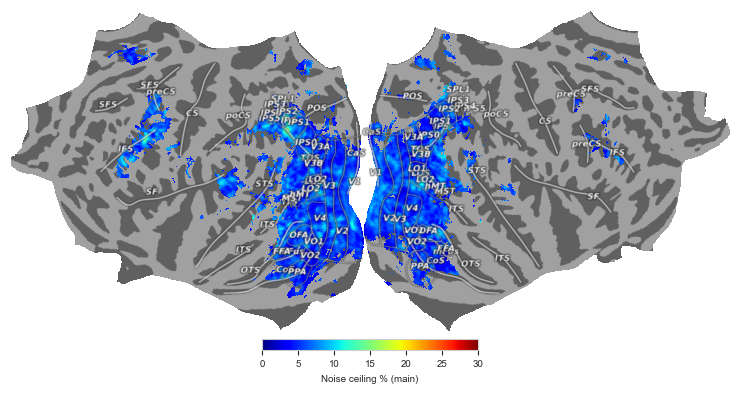

In [5]:
import os
import cortex
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pts, polys = cortex.database.db.get_surf('fsaverage', 'inflated', 'lh')
lh_surface = cortex.polyutils.Surface(pts, polys)

pts, polys = cortex.database.db.get_surf('fsaverage', 'inflated', 'rh')
rh_surface = cortex.polyutils.Surface(pts, polys)

lh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/ONOFF_lh.csv')
rh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/ONOFF_rh.csv')

onoff = pd.concat([lh, rh])
onoff = onoff.to_numpy()
onoff = onoff.T

lh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/noise_ceiling_control_lh.csv')
rh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/noise_ceiling_control_rh.csv')

data = pd.concat([lh, rh])
data = data.to_numpy()
data = data.T

for i in range(2):
    data[i, :len(pts)] = lh_surface.smooth(data[i, :len(pts)])
    data[i, len(pts):] = rh_surface.smooth(data[i, len(pts):])

data[0] = np.where(onoff[2] < 1, np.nan, data[0])
data[1] = np.where(onoff[2] < 1, np.nan, data[1])

fig= plt.figure(figsize=(2 * pycortex_figheight, pycortex_figheight))
surface = cortex.dataset.Vertex(data[0], subject='fsaverage', vmin=0, vmax=30, cmap='jet')
img = cortex.quickflat.make_figure(surface, with_colorbar=False, with_curvature=True, with_sulci=True, with_rois=True, with_labels=True, labelsize=str(pycortex_fontsize)+"pt", colorbar_location=(0.4, 0, 0.2, 0.02), fig=fig)

sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=30))
cb = plt.colorbar(sm, ax=fig.axes[-1], fraction=0.03, pad=0.015, orientation="horizontal")
cb.set_label("Noise ceiling % (main)", fontsize=fontsize)
cb.ax.tick_params(labelsize=fontsize)

fig.savefig(os.path.join(Figure_root, "Fig.3 - c.png"), format="png", dpi=500, bbox_inches="tight")

# Figure 3 - d

/root/anaconda3/envs/tats/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:347: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


Background RRGGBBAA: ffffff00
Area 0:0:2274.66:1024 exported to 2275 x 1024 pixels (96 dpi)
Background RRGGBBAA: ffffff00
Area 0:0:2274.66:1024 exported to 2275 x 1024 pixels (96 dpi)


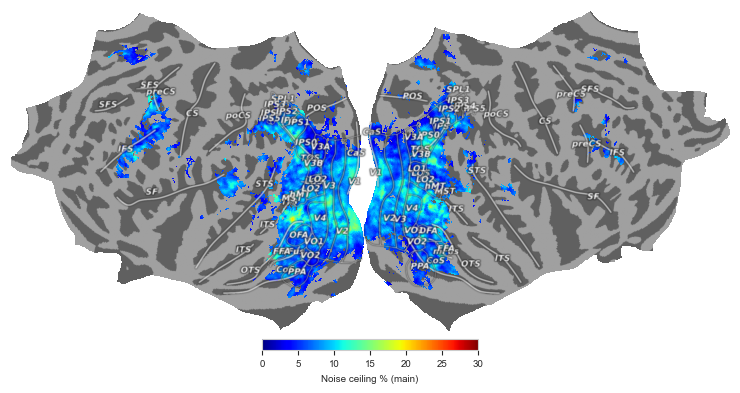

In [6]:
import os
import cortex
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pts, polys = cortex.database.db.get_surf('fsaverage', 'inflated', 'lh')
lh_surface = cortex.polyutils.Surface(pts, polys)

pts, polys = cortex.database.db.get_surf('fsaverage', 'inflated', 'rh')
rh_surface = cortex.polyutils.Surface(pts, polys)

lh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/ONOFF_lh.csv')
rh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/ONOFF_rh.csv')

onoff = pd.concat([lh, rh])
onoff = onoff.to_numpy()
onoff = onoff.T

lh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/noise_ceiling_control_lh.csv')
rh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/noise_ceiling_control_rh.csv')

data = pd.concat([lh, rh])
data = data.to_numpy()
data = data.T

for i in range(2):
    data[i, :len(pts)] = lh_surface.smooth(data[i, :len(pts)])
    data[i, len(pts):] = rh_surface.smooth(data[i, len(pts):])

data[0] = np.where(onoff[2] < 1, np.nan, data[0])
data[1] = np.where(onoff[2] < 1, np.nan, data[1])

fig= plt.figure(figsize=(2 * pycortex_figheight, pycortex_figheight))
surface = cortex.dataset.Vertex(data[1], subject='fsaverage', vmin=0, vmax=30, cmap='jet')
img = cortex.quickflat.make_figure(surface, with_colorbar=False, with_curvature=True, with_sulci=True, with_rois=True, with_labels=True, labelsize=str(pycortex_fontsize)+"pt", colorbar_location=(0.4, 0, 0.2, 0.02), fig=fig)

sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=30))
cb = plt.colorbar(sm, ax=fig.axes[-1], fraction=0.03, pad=0.015, orientation="horizontal")
cb.set_label("Noise ceiling % (main)", fontsize=fontsize)
cb.ax.tick_params(labelsize=fontsize)

fig.savefig(os.path.join(Figure_root, "Fig.3 - d.png"), format="png", dpi=500, bbox_inches="tight")

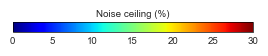

In [7]:
import os
import matplotlib.pyplot as plt
cycle_num = 100

fig, ax = plt.subplots(figsize=(3, 1))  # 设置colorbar的尺寸
fig.subplots_adjust(bottom=0.3, top=0.4,left=0.1,right=0.9)  # 调整图的上下边距

sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=30))
cb = plt.colorbar(sm, cax=ax, orientation='horizontal')  # 指定colorbar为水平方向
# cb.outline.set_edgecolor('black')
plt.xticks(fontsize=fontsize)
cb.set_label("Noise ceiling (%)", labelpad=4, fontsize=fontsize, fontfamily='Arial', fontweight='normal', rotation=0)
cb.ax.xaxis.set_label_position('top')
cb.ax.tick_params(axis='x', length=0)
cb.outline.set_linewidth(0.5)
cb.outline.set_edgecolor('black')

fig.savefig(os.path.join(Figure_root, "Fig.3 - d_colorbar.png"), format="png", dpi=500, bbox_inches="tight")

# Figure 4 - a

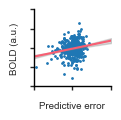

In [15]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import statsmodels.api as sm
from sklearn.cluster import KMeans, DBSCAN
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

beta = np.loadtxt('D:/beta.csv', delimiter=',')
unmatch_dissimilarity = pd.read_csv('D:/unmatch_dissimilarity.csv')

X = unmatch_dissimilarity['CLIP_ViT_layer_32']
X = sm.add_constant(X)
Y = pd.DataFrame(beta[:, 449], columns=['Y'])
model = sm.OLS(Y, X).fit()

label = 'CLIP_ViT_layer_32'
slope = model.params[label]
slope_std_error = model.bse[label]
intercept = model.params['const']
intercept_std_error = model.bse['const']
x = np.linspace(-5, 5, 100)
y = slope * x + intercept
upper_bound = (slope + slope_std_error) * x + (intercept + intercept_std_error)
lower_bound = (slope - slope_std_error) * x + (intercept - intercept_std_error)
fig = plt.figure(figsize=(1, 1))
plt.scatter(unmatch_dissimilarity[label], beta[:, 449], s=1)
plt.plot(x, y, c=(248/255, 94/255, 114/255))
plt.fill_between(x, lower_bound, upper_bound, color='gray', alpha=0.3, label='Standard Error')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel('Predictive error')
plt.ylabel('BOLD (a.u.)')

plt.grid(False)
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)

# 仅保留 X 和 Y 轴
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_color('black')

ax.set_xticks(np.arange(-5, 6, 5))
ax.set_yticks(np.linspace(-5, 5, 5))
ax.set_xticklabels([], fontsize=fontsize, fontproperties='Arial')
ax.set_yticklabels([], fontsize=fontsize, fontproperties='Arial')
plt.tick_params(axis='y', which='both', left=True, length=3, width=1, labelsize=fontsize)
plt.tick_params(axis='x', which='both', bottom=True, top=False, length=3, width=1, direction='out', labelsize=fontsize)

# 保存
fig.savefig(os.path.join(Figure_root, "Fig.4 - a_part.png"), format="png", dpi=500, bbox_inches="tight")

In [185]:
fig = plt.figure(figsize=(0.8, 0.8))
plt.scatter(unmatch_dissimilarity[label], beta[:, 449], s=0.8)
plt.plot(x, y, c=(248 / 255, 94 / 255, 114 / 255), linewidth=1)
plt.fill_between(x, lower_bound, upper_bound, color='gray', alpha=0.3, label='Standard Error')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
fig.supxlabel('Predictive error', y=-0.1, fontsize=fontsize)
fig.supylabel('BOLD (a.u.)', x=-0.1, fontsize=fontsize)

plt.grid(False)
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)

# 仅保留 X 和 Y 轴
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(0.8)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(0.8)
ax.spines['bottom'].set_color('black')

ax.set_xticks(np.arange(-5, 6, 5))
ax.set_yticks(np.linspace(-5, 5, 5))
ax.set_xticklabels([], fontsize=fontsize, fontproperties='Arial')
ax.set_yticklabels([], fontsize=fontsize, fontproperties='Arial')
plt.tick_params(axis='y', which='both', left=True, length=3, width=0.8, labelsize=fontsize)
plt.tick_params(axis='x', which='both', bottom=True, top=False, length=3, width=0.8, direction='out', labelsize=fontsize)

# 保存
fig.savefig(os.path.join(Figure_root, "Fig.4 - a_part.png"), format="png", dpi=500, bbox_inches="tight")

NameError: name 'label' is not defined

<Figure size 80x80 with 0 Axes>

# Figure 4 - b

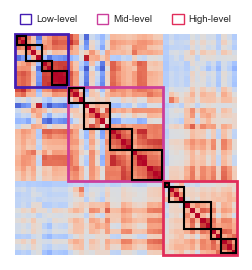

In [164]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 读取 CSV 文件
corr_matrix = pd.read_csv('D:/unmatch_dissimilarity_corr_matrix.csv', index_col=0)

low_level_features = ['CLIP_ViT_layer_1', 'CLIP_ViT_layer_2',
                      'Alexnet_features.0', 'Alexnet_features.1', 'Alexnet_features.2',
                      'Resnet18_layer1.0.relu_1', 'Resnet18_layer1.1.relu_1',
                      'Resnet50_layer1.0.relu_2', 'Resnet50_layer1.1.relu_2', 'Resnet50_layer1.2.relu_2']
mid_level_features = ['CLIP_ViT_layer_4', 'CLIP_ViT_layer_8', 'CLIP_ViT_layer_14',
                      'Alexnet_features.3', 'Alexnet_features.4', 'Alexnet_features.5', 'Alexnet_features.6', 'Alexnet_features.7',
                      'Resnet18_layer2.0.relu_1', 'Resnet18_layer2.1.relu_1', 'Resnet18_layer3.0.relu_1', 'Resnet18_layer3.1.relu_1',
                      'Resnet50_layer2.0.relu_2', 'Resnet50_layer2.1.relu_2', 'Resnet50_layer2.2.relu_2', 'Resnet50_layer3.0.relu_2',
                      'Resnet50_layer3.1.relu_2', 'Resnet50_layer3.2.relu_2']
high_level_features = ['CLIP_model',
                       'CLIP_ViT_layer_20', 'CLIP_ViT_layer_26', 'CLIP_ViT_layer_32',
                       'Alexnet_features.8', 'Alexnet_features.9', 'Alexnet_features.10', 'Alexnet_features.11', 'Alexnet_features.12',
                       'Resnet18_layer4.0.relu_1', 'Resnet18_layer4.1.relu_1',
                       'Resnet50_layer4.0.relu_2', 'Resnet50_layer4.1.relu_2', 'Resnet50_layer4.2.relu_2']
total = low_level_features + mid_level_features + high_level_features

fig, ax = plt.subplots(figsize=(3, 3))
heatmap = sns.heatmap(corr_matrix.loc[total].T.loc[total], annot=False, cmap='coolwarm', annot_kws={"size": fontsize}, vmin=-0.5, vmax=1, cbar=False, ax=ax)
ax.set_xticks([])
ax.set_yticks([])

# cbar = heatmap.collections[0].colorbar
# cbar.ax.tick_params(labelsize=fontsize)
# cbar.outline.set_linewidth(1)  # 设置边框宽度
# cbar.outline.set_edgecolor('black')  # 设置边框颜色

ax.set_xlabel('')

jit = 0.25
n = len(low_level_features + mid_level_features + high_level_features)
level_colors = ['#451db3', '#cb3e9c', '#e12d5a']
# low-level
rect = patches.Rectangle((0, 0), len(low_level_features), len(low_level_features), linewidth=2, edgecolor=level_colors[0], facecolor='none')
ax.add_patch(rect)

rect = patches.Rectangle((0+jit, 0+jit), 2-jit, 2-jit, linewidth=1.5, edgecolor='black', facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((2, 2), 3, 3, linewidth=1.5, edgecolor='black', facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((5, 5), 2, 2, linewidth=1.5, edgecolor='black', facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((7, 7), 3-jit, 3-jit, linewidth=1.5, edgecolor='black', facecolor='none')
ax.add_patch(rect)

# mid-level
rect = patches.Rectangle((len(low_level_features), len(low_level_features)), len(mid_level_features), len(mid_level_features), linewidth=2, edgecolor=level_colors[1], facecolor='none')
ax.add_patch(rect)

rect = patches.Rectangle((10+jit, 10+jit), 3-jit, 3-jit, linewidth=1.5, edgecolor='black', facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((13, 13), 5, 5, linewidth=1.5, edgecolor='black', facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((18, 18), 4, 4, linewidth=1.5, edgecolor='black', facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((22, 22), 6-jit, 6-jit, linewidth=1.5, edgecolor='black', facecolor='none')
ax.add_patch(rect)

# high-level
rect = patches.Rectangle((len(low_level_features+mid_level_features), len(low_level_features+mid_level_features)),
                         len(high_level_features), len(high_level_features), linewidth=2, edgecolor=level_colors[2], facecolor='none')
ax.add_patch(rect)

rect = patches.Rectangle((28+jit, 28+jit), 1-jit, 1-jit, linewidth=1.5, edgecolor='black', facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((29, 29), 3, 3, linewidth=1.5, edgecolor='black', facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((32, 32), 5, 5, linewidth=1.5, edgecolor='black', facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((37, 37), 2, 2, linewidth=1.5, edgecolor='black', facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((39, 39), 3-jit, 3-jit, linewidth=1.5, edgecolor='black', facecolor='none')
ax.add_patch(rect)

plt.xlim(-1, n+1)
plt.ylim(n+1, -1)

legend_elements = [
    mpatches.Patch(facecolor='none', edgecolor=level_colors[0], linewidth=1., label='Low-level'),
    mpatches.Patch(facecolor='none', edgecolor=level_colors[1], linewidth=1, label='Mid-level'),
    mpatches.Patch(facecolor='none', edgecolor=level_colors[2], linewidth=1, label='High-level'),
]

fig.legend(handles=legend_elements, loc='upper center', ncol=3, frameon=False, fontsize=fontsize, bbox_to_anchor=(0.51, 0.96), handleheight=1.2, handlelength=1.2, handletextpad=0.5)

fig.savefig(os.path.join(Figure_root, "Fig.4 - b.png"), format="png", dpi=500, bbox_inches="tight")

C:\Users\DELL\AppData\Local\Temp\ipykernel_17976\2879362401.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(sm, cax=ax, orientation='vertical')


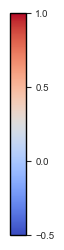

In [176]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

fig, ax = plt.subplots(figsize=(0.2, 2.88))

cmap = plt.cm.coolwarm
norm = mcolors.Normalize(vmin=-0.5, vmax=1.0)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # 需要设置才能画colorbar

cbar = plt.colorbar(sm, cax=ax, orientation='vertical')
cbar.set_ticks([-0.5, 0, 0.5, 1])  # 可以自定义刻度
cbar.ax.tick_params(labelsize=fontsize)
cbar.outline.set_linewidth(1)
cbar.outline.set_edgecolor('black')

fig.savefig(os.path.join(Figure_root, "Fig.4 - b_colorbar.png"), format="png", dpi=500, bbox_inches="tight")

# Figure 4 - c

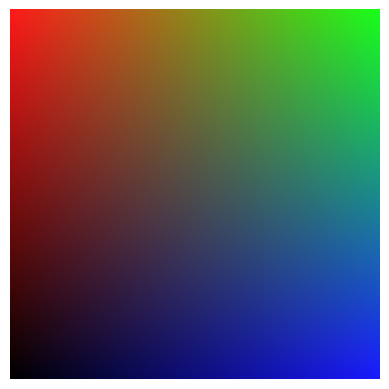

In [51]:
# 创建colormap
import numpy as np
import matplotlib.pyplot as plt

# 分辨率
N = 256
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, y)

# 四个角点颜色（R,G,B）
C00 = np.array([0, 0, 0])  # (0,0) - 黑
C10 = np.array([0.1, 0.1, 1.0])  # (1,0) - 蓝
C01 = np.array([1.0, 0.1, 0.1])  # (0,1) - 红
C11 = np.array([0.1, 1.0, 0.1])

# 双线性插值权重
w00 = (1 - X) * (1 - Y)
w10 = X * (1 - Y)
w01 = (1 - X) * Y
w11 = X * Y

# 对每个通道分别插值
RGB = (
    w00[..., None] * C00 +
    w10[..., None] * C10 +
    w01[..., None] * C01 +
    w11[..., None] * C11
)

# 可视化
plt.imshow(RGB, origin='lower')
plt.grid(False)
plt.axis('off')
plt.savefig('/root/pycortex/colormaps/RdBuYe_covar.png', bbox_inches='tight', pad_inches=0)

/root/anaconda3/envs/tats/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:347: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


Background RRGGBBAA: ffffff00
Area 0:0:2274.66:1024 exported to 2275 x 1024 pixels (96 dpi)
Background RRGGBBAA: ffffff00
Area 0:0:2274.66:1024 exported to 2275 x 1024 pixels (96 dpi)


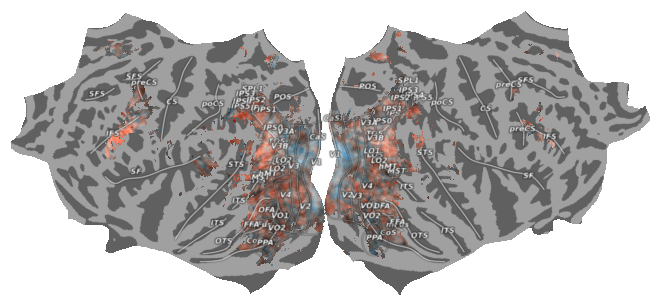

In [58]:
import os
import cortex
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pts, polys = cortex.database.db.get_surf('fsaverage', 'inflated', 'lh')
lh_surface = cortex.polyutils.Surface(pts, polys)

pts, polys = cortex.database.db.get_surf('fsaverage', 'inflated', 'rh')
rh_surface = cortex.polyutils.Surface(pts, polys)

lh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/ONOFF_lh.csv')
rh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/ONOFF_rh.csv')

onoff = pd.concat([lh, rh])
onoff_data = onoff.to_numpy()
onoff_data = onoff_data.T

lh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/level_transfer_main_ClstMsk_lh.csv')
rh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/level_transfer_main_ClstMsk_rh.csv')

ClstMsk = pd.concat([lh, rh])
ClstMsk = ClstMsk.to_numpy()
ClstMsk = ClstMsk.T

lh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/level_transfer_main_lh.csv')
rh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/level_transfer_main_rh.csv')

onoff = pd.concat([lh, rh])
data = onoff.to_numpy()
data = data.T

for i in range(3):
    data[i, :len(pts)] = lh_surface.smooth(data[i, :len(pts)])
    data[i, len(pts):] = rh_surface.smooth(data[i, len(pts):])

data[0] = np.where(onoff_data[2] > 1, data[0], np.nan)
data[1] = np.where(onoff_data[2] > 1, data[1], np.nan)
data[2] = np.where(onoff_data[2] > 1, data[2], np.nan)

# data[0] = np.where(data[0] >= 0.35, data[0], np.nan)
# data[1] = np.where(data[1] >= 0.35, data[1], np.nan)
# data[2] = np.where(data[2] >= 0.35, data[2], np.nan)

mask = np.zeros_like(data[0])
for i in range(len(data[0])):
    if ClstMsk[1, i] or ClstMsk[2, i]:
        mask[i] = 1

# data[0] = np.where(mask > 0, data[0], np.nan)
# data[1] = np.where(mask > 0, data[1], np.nan)
# data[2] = np.where(mask > 0, data[2], np.nan)

fig= plt.figure(figsize=(2 * 3.2, 3.2))
surface = cortex.dataset.Vertex2D(data[1], data[2], subject='fsaverage', cmap='PU_RdBu_covar', vmin=0, vmax=0.9, vmin2=0, vmax2=0.9)
_ = cortex.quickflat.make_figure(surface, with_colorbar=False, with_curvature=True, with_sulci=True, with_rois=True,
                                 with_labels=True, labelsize=str(pycortex_fontsize)+"pt", colorbar_location=(0.4, 0, 0.2, 0.02), fig=fig)

fig.savefig(os.path.join(Figure_root, "Fig.4 - c.png"), format="png", dpi=500, bbox_inches="tight")

# Figure 4 - d

/root/anaconda3/envs/tats/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:347: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


Background RRGGBBAA: ffffff00
Area 0:0:2274.66:1024 exported to 2275 x 1024 pixels (96 dpi)
Background RRGGBBAA: ffffff00
Area 0:0:2274.66:1024 exported to 2275 x 1024 pixels (96 dpi)


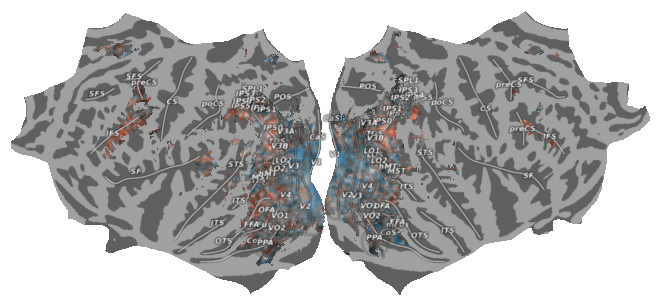

In [57]:
import os
import cortex
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pts, polys = cortex.database.db.get_surf('fsaverage', 'inflated', 'lh')
lh_surface = cortex.polyutils.Surface(pts, polys)

pts, polys = cortex.database.db.get_surf('fsaverage', 'inflated', 'rh')
rh_surface = cortex.polyutils.Surface(pts, polys)

lh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/ONOFF_lh.csv')
rh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/ONOFF_rh.csv')

onoff = pd.concat([lh, rh])
onoff_data = onoff.to_numpy()
onoff_data = onoff_data.T

lh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/level_transfer_control_lh.csv')
rh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/level_transfer_control_rh.csv')

onoff = pd.concat([lh, rh])
data = onoff.to_numpy()
data = data.T

for i in range(3):
    data[i, :len(pts)] = lh_surface.smooth(data[i, :len(pts)])
    data[i, len(pts):] = rh_surface.smooth(data[i, len(pts):])

data[0] = np.where(onoff_data[2] > 1, data[0], np.nan)
data[1] = np.where(onoff_data[2] > 1, data[1], np.nan)
data[2] = np.where(onoff_data[2] > 1, data[2], np.nan)

fig= plt.figure(figsize=(2 * 3.2, 3.2))
surface = cortex.dataset.Vertex2D(data[1], data[2], subject='fsaverage', cmap='PU_RdBu_covar', vmin=0, vmax=0.9, vmin2=0, vmax2=0.9)
_ = cortex.quickflat.make_figure(surface, with_colorbar=False, with_curvature=True, with_sulci=True, with_rois=True,
                                 with_labels=True, labelsize=str(pycortex_fontsize)+"pt", colorbar_location=(0.4, 0, 0.2, 0.02), fig=fig)

fig.savefig(os.path.join(Figure_root, "Fig.4 - d.png"), format="png", dpi=500, bbox_inches="tight")

# Figure 4 - e

[[0.12777388 0.27914039 0.22541462]
 [0.05384226 0.14307381 0.21663296]
 [0.00175593 0.12028095 0.20046825]]
[[0.12240131 0.1707545  0.02125672]
 [0.01541962 0.14054601 0.04271992]
 [0.         0.07287094 0.02955809]]


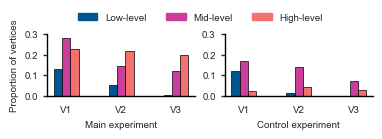

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import pandas as pd
import os
import cortex

roi_verts = cortex.get_roi_verts('fsaverage')
lh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/level_transfer_main_ClstMsk_lh.csv')
rh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/level_transfer_main_ClstMsk_rh.csv')
ClstMsk = pd.concat([lh, rh])
ClstMsk = ClstMsk.to_numpy()
ClstMsk = ClstMsk.T
# 统计数据
roi_labels = ['V1', 'V2', 'V3']
counts = []
for roi in roi_labels:
    count = np.array([0, 0, 0])
    for v in roi_verts[roi]:
        if ClstMsk[0, v] != 0:
            count[0] += 1
        if ClstMsk[1, v] != 0:
            count[1] += 1
        if ClstMsk[2, v] != 0:
            count[2] += 1
    counts.append(count / len(roi_verts[roi]))  # 计算不等于0的点比例
counts = np.array(counts)
print(counts)
colors = ['#005691', '#cb3e9c', '#f57170']
width = 0.15
x = np.arange(3)
fig = plt.figure(figsize=(4.2, 0.8))
ax = fig.add_subplot(1, 2, 1)
# 为每个ROI绘制3个bar
bar1 = ax.bar(x - width, counts[:, 0], width, label='Low', color=colors[0], edgecolor='black', linewidth=0.5)
bar2 = ax.bar(x, counts[:, 1], width, label='Mid', color=colors[1], edgecolor='black', linewidth=0.5)
bar3 = ax.bar(x + width, counts[:, 2], width, label='High', color=colors[2], edgecolor='black', linewidth=0.5)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.tick_params(axis='y', which='both', left='off', length=3, width=1)
plt.grid(False)
# 移除图表的边框
for spine in ax.spines.values():
    spine.set_visible(False)
# 仅保留 X 和 Y 轴
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_color('black')
# 添加标签
ax.set_xlabel('Main experiment', fontsize=fontsize)
ax.set_ylabel('Proportion of vertices', fontsize=fontsize)
ax.set_xticks(x)
ax.set_xticklabels(roi_labels, fontsize=fontsize)
ax.set_ylim(0, 0.3)  # 设置y轴范围

roi_verts = cortex.get_roi_verts('fsaverage')
lh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/level_transfer_control_ClstMsk_lh.csv')
rh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/level_transfer_control_ClstMsk_rh.csv')
ClstMsk = pd.concat([lh, rh])
ClstMsk = ClstMsk.to_numpy()
ClstMsk = ClstMsk.T
# 统计数据
roi_labels = ['V1', 'V2', 'V3']
counts = []

for roi in roi_labels:
    count = np.array([0, 0, 0])
    for v in roi_verts[roi]:
        if ClstMsk[0, v] != 0:
            count[0] += 1
        if ClstMsk[1, v] != 0:
            count[1] += 1
        if ClstMsk[2, v] != 0:
            count[2] += 1
    counts.append(count / len(roi_verts[roi]))  # 计算不等于0的点比例
counts = np.array(counts)
print(counts)
colors = ['#005691', '#cb3e9c', '#f57170']
width = 0.15
x = np.arange(3)
ax = fig.add_subplot(1, 2, 2)
# 为每个ROI绘制3个bar
bar1 = ax.bar(x - width, counts[:, 0], width, label='Low', color=colors[0], edgecolor='black', linewidth=0.5)
bar2 = ax.bar(x, counts[:, 1], width, label='Mid', color=colors[1], edgecolor='black', linewidth=0.5)
bar3 = ax.bar(x + width, counts[:, 2], width, label='High', color=colors[2], edgecolor='black', linewidth=0.5)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.tick_params(axis='y', which='both', left='off', length=3, width=1)
plt.grid(False)
# 移除图表的边框
for spine in ax.spines.values():
    spine.set_visible(False)
# 仅保留 X 和 Y 轴
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_color('black')
# 添加标签
ax.set_xticks(x)
ax.set_xticklabels(roi_labels, fontsize=fontsize)
ax.set_xlabel('Control experiment', fontsize=fontsize)
ax.set_ylim(0, 0.3)  # 设置y轴范围
handles = [
    patches.Rectangle((0, 0), 1, 1, color=colors[0], label="Low-level"),
    patches.Rectangle((0, 0), 1, 1, color=colors[1], label="Mid-level"),
    patches.Rectangle((0, 0), 1, 1, color=colors[2], label="High-level")
]
fig.legend(handles=handles, loc="upper center", ncol=3, fontsize=fontsize, frameon=False, bbox_to_anchor=(0.49, 1.25))
fig.savefig(os.path.join(Figure_root, "Fig.4 - e.png"), format="png", dpi=500, bbox_inches="tight")

# Figure 4 - f

23.0 0.2734375
15.0 0.6796875
19.0 0.47265625
18.0 0.52734375
13.0 0.76953125
18.0 0.52734375
26.0 0.15625
23.0 0.2734375
33.0 0.01953125


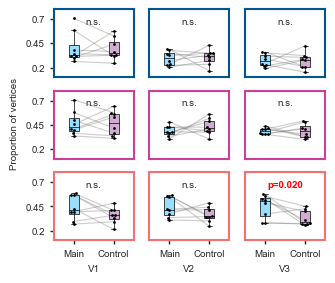

In [94]:
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel, ttest_ind, wilcoxon
from statsmodels.stats.multitest import fdrcorrection

data_match = np.load('D:/subject_level_transfer_portion.npy')
data_unmatch = np.load('D:/subject_level_transfer_portion_unmatch.npy')

# 初始化
t_vals = np.zeros((3, 3))  # 存储wilcoxon的统计量（注意：不是U值，是T值）
p_vals = np.zeros((3, 3))  # 存储p值

# Wilcoxon signed-rank test
for i in range(3):
    for j in range(3):
        stat, p = wilcoxon(data_match[:, i, j], data_unmatch[:, i, j], alternative='two-sided')
        t_vals[i, j] = stat
        p_vals[i, j] = p

colors = ['#99DEFF', '#D1AED1']
roi_colors = ['#005691', '#cb3e9c', '#f57170']
fig = plt.figure(figsize=(3.5, 3))
for i in range(3):
    for j in range(3):
        ax = fig.add_subplot(3, 3, i*3+j+1)
        t, p = wilcoxon(data_match[:, i, j], data_unmatch[:, i, j], alternative="greater")
        data_all = np.concatenate([data_match[:, i, j:j+1], data_unmatch[:, i, j:j+1]], axis=1)
        x_pos = [0, 1]
        for z in range(data_all.shape[0]):
            ax.plot(x_pos, data_all[z, :], color='gray', alpha=0.4, linewidth=0.8, markersize=0.2)

        # boxplot
        box = ax.boxplot([data_all[:, 0], data_all[:, 1]], positions=[0, 1], patch_artist=True, widths=0.25, showfliers=False)
        c = colors
        for patch, color in zip(box['boxes'], c):
            patch.set_facecolor(color)
        for b in box['boxes']:
            b.set_linewidth(0.5)
        for median in box['medians']:
            median.set_linewidth(0.5)
            median.set_color('black')
        for whisker in box['whiskers']:
            whisker.set_linewidth(0.5)
            whisker.set_color('black')
        for cap in box['caps']:
            cap.set_linewidth(0.5)
            cap.set_color('black')
        # sns.boxplot(data=[data_all[:, 0], data_all[:, 1]], palette="Set2", width=0.25, ax=ax)
        sns.swarmplot(data=[data_all[:, 0], data_all[:, 1]], color='k', size=2, ax=ax)

        if p < 0.05:
            ax.text(x=0.5, y=text_y, s=("p=%.3f"%p), fontsize=fontsize, ha='center', color='red', fontweight='bold')
        else:
            ax.text(x=0.5, y=0.65, s='n.s.', fontsize=fontsize, ha='center')
        print(t, p)

        ax.set_ylim(0.1, 0.8)
        if j == 0:
            ax.set_yticks([0.2, 0.45, 0.7])
            ax.set_yticklabels(['0.2', '0.45', '0.7'])
            ax.tick_params(axis='y', which='both', left=True, length=3, width=1, labelsize=fontsize)
        else:
            ax.set_yticklabels([])
        if i == 2:
            ax.set_xticks([0, 1])
            ax.set_xticklabels(['Main', 'Control'])
            ax.tick_params(axis='x', which='both', bottom=True, top=False, length=3, width=1, direction='out', labelsize=fontsize)
            if j == 0:
                ax.set_xlabel('V1')
            elif j == 1:
                ax.set_xlabel('V2')
            else:
                ax.set_xlabel('V3')
        else:
            ax.set_xticklabels([])

        ax.grid(False)

        for spine in ax.spines.values():
            spine.set_color(roi_colors[i])
            spine.set_linewidth(1.5)

fig.text(0, 0.5, 'Proportion of vertices', va='center', rotation='vertical', fontsize=fontsize, fontproperties='Arial')
fig.savefig(os.path.join(Figure_root, 'Fig.4 - f.png'), format="png", dpi=500, bbox_inches="tight")

D:\anaconda3\lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
D:\anaconda3\lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
D:\anaconda3\lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
D:\anaconda3\lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


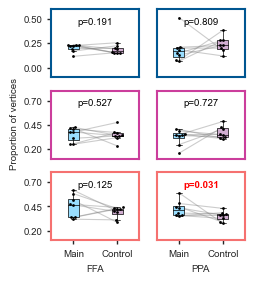

In [93]:
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel, ttest_ind, wilcoxon
from statsmodels.stats.multitest import fdrcorrection

data_match = np.load('D:/subject_level_transfer_portion_Face&Place.npy')
data_unmatch = np.load('D:/subject_level_transfer_portion_unmatch_Face&Place.npy')

# 初始化
t_vals = np.zeros((3, 2))  # 存储wilcoxon的统计量（注意：不是U值，是T值）
p_vals = np.zeros((3, 2))  # 存储p值

# Wilcoxon signed-rank test
for i in range(3):
    for j in range(2):
        stat, p = wilcoxon(data_match[:, i, j], data_unmatch[:, i, j], alternative='greater')
        t_vals[i, j] = stat
        p_vals[i, j] = p

colors = ['#99DEFF', '#D1AED1']
roi_colors = ['#005691', '#cb3e9c', '#f57170']
fig = plt.figure(figsize=(2.5, 3))
for i in range(3):
    for j in range(2):
        ax = fig.add_subplot(3, 2, i*2+j+1)
        t, p = wilcoxon(data_match[:, i, j], data_unmatch[:, i, j], alternative="greater")
        data_all = np.concatenate([data_match[:, i, j:j+1], data_unmatch[:, i, j:j+1]], axis=1)
        x_pos = [0, 1]
        for z in range(data_all.shape[0]):
            ax.plot(x_pos, data_all[z, :], color='gray', alpha=0.4, linewidth=0.8, markersize=0.2)

        # boxplot
        box = ax.boxplot([data_all[:, 0], data_all[:, 1]], positions=[0, 1], patch_artist=True, widths=0.25, showfliers=False)
        c = colors
        for patch, color in zip(box['boxes'], c):
            patch.set_facecolor(color)
        for b in box['boxes']:
            b.set_linewidth(0.5)
        for median in box['medians']:
            median.set_linewidth(0.5)
            median.set_color('black')
        for whisker in box['whiskers']:
            whisker.set_linewidth(0.5)
            whisker.set_color('black')
        for cap in box['caps']:
            cap.set_linewidth(0.5)
            cap.set_color('black')
        # sns.boxplot(data=[data_all[:, 0], data_all[:, 1]], palette="Set2", width=0.25, ax=ax)
        sns.swarmplot(data=[data_all[:, 0], data_all[:, 1]], color='k', size=2, ax=ax)

        if i == 0:
            text_y = 0.45
        else:
            text_y = 0.65

        if p < 0.05:
            ax.text(x=0.5, y=text_y, s=("p=%.3f"%p), fontsize=fontsize, ha='center', color='red', fontweight='bold')
        else:
            ax.text(x=0.5, y=text_y, s=("p=%.3f"%p), fontsize=fontsize, ha='center', color='black')

        if i == 0:
            ax.set_ylim(-0.1, 0.6)
        else:
            ax.set_ylim(0.1, 0.8)

        if j == 0:
            if i == 0:
                ax.set_yticks([0.0, 0.25, 0.5])
                ax.set_yticklabels(['0.00', '0.25', '0.50'])
            else:
                ax.set_yticks([0.2, 0.45, 0.7])
                ax.set_yticklabels(['0.20', '0.45', '0.70'])
            ax.tick_params(axis='y', which='both', left=True, length=3, width=1, labelsize=fontsize)
        else:
            ax.set_yticklabels([])
        if i == 2:
            ax.set_xticks([0, 1])
            ax.set_xticklabels(['Main', 'Control'])
            ax.tick_params(axis='x', which='both', bottom=True, top=False, length=3, width=1, direction='out', labelsize=fontsize)
            if j == 0:
                ax.set_xlabel('FFA')
            elif j == 1:
                ax.set_xlabel('PPA')
        else:
            ax.set_xticklabels([])

        ax.grid(False)

        for spine in ax.spines.values():
            spine.set_color(roi_colors[i])
            spine.set_linewidth(1.5)

fig.text(-0.04, 0.5, 'Proportion of vertices', va='center', rotation='vertical', fontsize=fontsize, fontproperties='Arial')
fig.savefig(os.path.join(Figure_root, 'Sup - Face&Place_pe_level.png'), format="png", dpi=500, bbox_inches="tight")

# Figure 4 - f_colorbar

C:\Users\DELL\AppData\Local\Temp\ipykernel_42924\2284917041.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar(sm, cax=ax, orientation="horizontal")


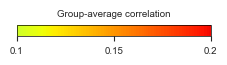

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

fig, ax = plt.subplots(figsize=(2.5, 0.15))
cmap = plt.cm.get_cmap('jet')
truncated_cmap = mcolors.LinearSegmentedColormap.from_list('truncated_Blues', cmap(np.linspace(0.6, 0.9, 256)))
norm = mcolors.Normalize(vmin=0.1, vmax=0.2)
sm = plt.cm.ScalarMappable(cmap=truncated_cmap, norm=norm)
cb = plt.colorbar(sm, cax=ax, orientation="horizontal")

cb.set_ticks([0.1, 0.15, 0.2])
cb.ax.set_xticklabels(['0.1', '0.15', '0.2'])
cb.ax.tick_params(labelsize=fontsize)
cb.ax.tick_params(axis='y', length=0)
cb.outline.set_linewidth(0.5)
cb.outline.set_edgecolor('black')

# 添加在 colorbar 顶部的 label
cb.set_label("Group-average correlation", labelpad=6, fontsize=fontsize)
cb.ax.xaxis.set_label_position('top')  # 把 label 放在右侧顶部
fig.savefig(os.path.join(Figure_root, "Fig.4 - f_colorbar.png"), format="png", dpi=500, bbox_inches="tight")

# Figure 4 - g

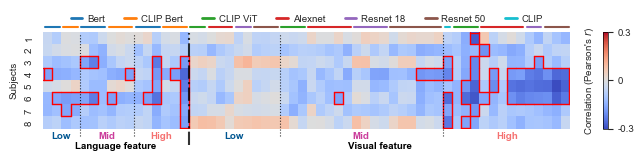

In [121]:
# Reaction time correlation with feature dissimilarity
import os
import numpy as np
import matplotlib
import seaborn as sns
from statsmodels.stats.multitest import fdrcorrection
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from skimage import measure
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

data = np.load('D:/rt_corr_ft_dis.npy')
unmatch_dissimilarity = pd.read_csv('D:/unmatch_dissimilarity.csv')

# rearange feature order
label = list(unmatch_dissimilarity.keys())
language_low_level_features = ['Bert_layer_1', 'Bert_layer_2', 'CLIP_Bert_layer_1', 'CLIP_Bert_layer_2']
language_mid_level_features = ['Bert_layer_4', 'Bert_layer_8', 'Bert_layer_12', 'CLIP_Bert_layer_4', 'CLIP_Bert_layer_8', 'CLIP_Bert_layer_12']
language_high_level_features = ['Bert_layer_16', 'Bert_layer_20', 'Bert_layer_24', 'CLIP_Bert_layer_16', 'CLIP_Bert_layer_20', 'CLIP_Bert_layer_24']
visual_low_level_features = ['CLIP_ViT_layer_1', 'CLIP_ViT_layer_2',
                      'Alexnet_features.0', 'Alexnet_features.1', 'Alexnet_features.2',
                      'Resnet18_layer1.0.relu_1', 'Resnet18_layer1.1.relu_1',
                      'Resnet50_layer1.0.relu_2', 'Resnet50_layer1.1.relu_2', 'Resnet50_layer1.2.relu_2']
visual_mid_level_features = ['CLIP_ViT_layer_4', 'CLIP_ViT_layer_8', 'CLIP_ViT_layer_14',
                      'Alexnet_features.3', 'Alexnet_features.4', 'Alexnet_features.5', 'Alexnet_features.6', 'Alexnet_features.7',
                      'Resnet18_layer2.0.relu_1', 'Resnet18_layer2.1.relu_1', 'Resnet18_layer3.0.relu_1', 'Resnet18_layer3.1.relu_1',
                      'Resnet50_layer2.0.relu_2', 'Resnet50_layer2.1.relu_2', 'Resnet50_layer2.2.relu_2', 'Resnet50_layer3.0.relu_2',
                      'Resnet50_layer3.1.relu_2', 'Resnet50_layer3.2.relu_2']
visual_high_level_features = ['CLIP_model',
                       'CLIP_ViT_layer_20', 'CLIP_ViT_layer_26', 'CLIP_ViT_layer_32',
                       'Alexnet_features.8', 'Alexnet_features.9', 'Alexnet_features.10', 'Alexnet_features.11', 'Alexnet_features.12',
                       'Resnet18_layer4.0.relu_1', 'Resnet18_layer4.1.relu_1',
                       'Resnet50_layer4.0.relu_2', 'Resnet50_layer4.1.relu_2', 'Resnet50_layer4.2.relu_2']
final_label = language_low_level_features + language_mid_level_features + language_high_level_features + visual_low_level_features + visual_mid_level_features + visual_high_level_features

index_order = [label.index(name) for name in final_label]
# 重排 data 和 p_corrected
data_reordered = data[:, index_order, :]  # 重新排列 feature 维
p_vals = data_reordered[:, :, 1]
r_vals = data_reordered[:, :, 0]

# FDR 校正
threshold = 0.01
p = p_vals.reshape(-1)
rejected, p_corrected = fdrcorrection(p, alpha=threshold)
p_corrected = p_corrected.reshape(p_vals.shape)

fig, ax = plt.subplots(figsize=(8.5, 1.25))
sns.heatmap(data_reordered[:, :, 0], annot=False, fmt=".2f", cmap='coolwarm', vmin=-0.3, vmax=0.3, ax=ax, )

# 添加红框表示显著的格子
rows, cols = data_reordered[:, :, 0].shape
color = 'red'
for i in range(rows):
    for j in range(cols):
        if p_corrected[i, j] >= threshold:
            continue  # 非显著点跳过
        if i == 0 or p_corrected[i-1, j] >= threshold:
            if i == 0:
                ax.add_line(Line2D([j, j+1], [i+0.03, i+0.03], color=color, linewidth=1))
            else:
                ax.add_line(Line2D([j, j+1], [i, i], color=color, linewidth=1))
        if i == rows-1 or p_corrected[i+1, j] >= threshold:
            if i == rows-1:
                ax.add_line(Line2D([j, j+1], [i+0.97, i+0.97], color=color, linewidth=1))
            else:
                ax.add_line(Line2D([j, j+1], [i+1, i+1], color=color, linewidth=1))
        if j == 0 or p_corrected[i, j-1] >= threshold:
            if j == 0:
                ax.add_line(Line2D([j+0.05, j+0.05], [i, i+1], color=color, linewidth=1))
            else:
                ax.add_line(Line2D([j, j], [i, i+1], color=color, linewidth=1))
        if j == cols-1 or p_corrected[i, j+1] >= threshold:
            if j == cols-1:
                ax.add_line(Line2D([j+0.9, j+0.9], [i, i+1], color=color, linewidth=1))
            else:
                ax.add_line(Line2D([j+1, j+1], [i, i+1], color=color, linewidth=1))

# Low Mid High level
num_models = len(final_label)
# 手动指定各分段长度
n_LLL = len(language_low_level_features)
n_LML = len(language_mid_level_features)
n_LHL = len(language_high_level_features)
n_VLL = len(visual_low_level_features)
n_VML = len(visual_mid_level_features)
n_VHL = len(visual_high_level_features)
# 计算各分段的起止位置（用于画线和写字）
segment_edges = np.cumsum([0, n_LLL, n_LML, n_LHL, n_VLL, n_VML, n_VHL])  # 共7个节点
# 设置 y 坐标略低于图像底部，用 axes 坐标更稳
y_offset = -0.03  # 稍低于图像
for i in range(1, len(segment_edges)-1):
    is_major_boundary = (i == 3)  # 第3个是 Language / Visual 分界线
    # 把 data 坐标的 x 转为 figure 相对坐标（0~1）
    x_data = segment_edges[i]
    x_fig = ax.transData.transform((x_data, 0))[0]               # data 坐标 → 像素
    x_fig_rel = fig.transFigure.inverted().transform((x_fig, 0))[0]  # 像素 → figure 坐标
    # 添加到 figure 的 lines 列表（在整个图上画线）
    fig.lines.append(plt.Line2D(
        [x_fig_rel, x_fig_rel],   # 横坐标 (x 固定)
        [-0.02, 0.8755] if is_major_boundary else [0.05, 0.8755],              # 纵坐标 (0 = 图底，1 = 图顶，可调更高如 1.05)
        transform=fig.transFigure,
        color='black',
        linewidth=1.5 if is_major_boundary else 0.8,
        linestyle='dashdot' if is_major_boundary else 'dotted',
        alpha=0.8
    ))
# 添加标签（以每个 block 的中心位置）
def label_segment(x0, x1, text, color, y, fontsize=fontsize):
    x_center = (x0 + x1) / 2
    ax.text(x_center, y, text, ha='center', va='top', fontsize=fontsize, fontproperties='Arial', fontweight='bold', transform=ax.get_xaxis_transform(), color=color)
# 每个子类标签
colors = ['#005691', '#cb3e9c', '#f57170']
label_segment(segment_edges[0], segment_edges[1], 'Low', colors[0], y_offset)
label_segment(segment_edges[1], segment_edges[2], 'Mid', colors[1], y_offset)
label_segment(segment_edges[2], segment_edges[3], 'High', colors[2], y_offset)
label_segment(segment_edges[3], segment_edges[4], 'Low', colors[0], y_offset)
label_segment(segment_edges[4], segment_edges[5], 'Mid', colors[1], y_offset)
label_segment(segment_edges[5], segment_edges[6], 'High', colors[2], y_offset)
# 大类标签（Language, Visual）
label_segment(segment_edges[0], segment_edges[3], 'Language feature', 'black', y_offset - 0.11, fontsize=fontsize)
label_segment(segment_edges[3], segment_edges[6], 'Visual feature', 'black', y_offset - 0.11, fontsize=fontsize)

ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticklabels(['1', '2', '3', '4', '5', '6', '7', '8'], fontsize=fontsize, fontproperties='Arial')

# ax.set_xlabel('Feature dissimilarity', fontsize=fontsize, fontproperties='Arial')
ax.set_ylabel('Subjects', fontsize=fontsize, fontproperties='Arial')

cbar = ax.collections[0].colorbar
# 设置刻度
cbar.set_ticks([-0.3, 0, 0.3])
cbar.set_ticklabels(['-0.3', '0', '0.3'])
for spine in cbar.ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.5)  # 可调粗细
cbar.ax.yaxis.set_label_position('left')  # 把 label 放在右侧顶部
cbar.set_label('Correlation (Pearson\'s $r$)', rotation=90, labelpad=5, loc='center', fontsize=fontsize, fontproperties='Arial')

model_edges = [0, 2, 4, 7, 10, 13, 16, 18, 21, 23, 26, 29, 34, 38, 44, 45, 48, 53, 55, 58]  # 每段是一个模型，按列数来
model_label = [0, 1, 0, 1, 0, 1, 2, 3, 4, 5, 2, 3, 4, 5, 6, 2, 3, 4, 5]
model_colors = [
    '#1f77b4',  # Blue
    '#ff7f0e',  # Orange
    '#2ca02c',  # Green
    '#d62728',  # Red
    '#9467bd',  # Purple
    '#8c564b',  # Brown
    '#17becf'   # Cyan
]
y_top = 0.92
for i in range(len(model_edges) - 1):
    # 当前模型对应的数据坐标范围
    x_start_data = model_edges[i]
    x_end_data = model_edges[i + 1]
    # 转为 figure 坐标（Line2D 只能在 figure 坐标中混合绘制）
    x_start_fig = fig.transFigure.inverted().transform(ax.transData.transform((x_start_data, 0)))[0]
    x_end_fig = fig.transFigure.inverted().transform(ax.transData.transform((x_end_data, 0)))[0]

    # 添加横线段
    fig.lines.append(plt.Line2D(
        [x_start_fig+0.002, x_end_fig-0.002],  # 横线的起止 x
        [y_top, y_top],            # y 坐标固定
        transform=fig.transFigure,
        color=model_colors[model_label[i]],
        linewidth=1.5
    ))
legend_elements = [
    Line2D([0], [0], color=model_colors[0], lw=2, label='Bert'),
    Line2D([0], [0], color=model_colors[1], lw=2, label='CLIP Bert'),
    Line2D([0], [0], color=model_colors[2], lw=2, label='CLIP ViT'),
    Line2D([0], [0], color=model_colors[3], lw=2, label='Alexnet'),
    Line2D([0], [0], color=model_colors[4], lw=2, label='Resnet 18'),
    Line2D([0], [0], color=model_colors[5], lw=2, label='Resnet 50'),
    Line2D([0], [0], color=model_colors[6], lw=2, label='CLIP'),
]

fig.legend(handles=legend_elements, loc='upper center', ncol=7, frameon=False, fontsize=fontsize, bbox_to_anchor=(0.435, 1.1), handleheight=1.2, handlelength=1.2, handletextpad=0.5)


fig.savefig(os.path.join(Figure_root, 'Fig.4 - g.png'), format="png", dpi=500, bbox_inches="tight")

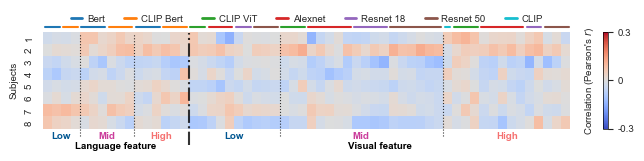

In [116]:
# Reaction time correlation with feature dissimilarity
import os
import numpy as np
import matplotlib
import seaborn as sns
from statsmodels.stats.multitest import fdrcorrection
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from skimage import measure
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

data = np.load('D:/rt_corr_ft_dis_unmatch.npy')
unmatch_dissimilarity = pd.read_csv('D:/unmatch_dissimilarity.csv')

# rearange feature order
label = list(unmatch_dissimilarity.keys())
language_low_level_features = ['Bert_layer_1', 'Bert_layer_2', 'CLIP_Bert_layer_1', 'CLIP_Bert_layer_2']
language_mid_level_features = ['Bert_layer_4', 'Bert_layer_8', 'Bert_layer_12', 'CLIP_Bert_layer_4', 'CLIP_Bert_layer_8', 'CLIP_Bert_layer_12']
language_high_level_features = ['Bert_layer_16', 'Bert_layer_20', 'Bert_layer_24', 'CLIP_Bert_layer_16', 'CLIP_Bert_layer_20', 'CLIP_Bert_layer_24']
visual_low_level_features = ['CLIP_ViT_layer_1', 'CLIP_ViT_layer_2',
                      'Alexnet_features.0', 'Alexnet_features.1', 'Alexnet_features.2',
                      'Resnet18_layer1.0.relu_1', 'Resnet18_layer1.1.relu_1',
                      'Resnet50_layer1.0.relu_2', 'Resnet50_layer1.1.relu_2', 'Resnet50_layer1.2.relu_2']
visual_mid_level_features = ['CLIP_ViT_layer_4', 'CLIP_ViT_layer_8', 'CLIP_ViT_layer_14',
                      'Alexnet_features.3', 'Alexnet_features.4', 'Alexnet_features.5', 'Alexnet_features.6', 'Alexnet_features.7',
                      'Resnet18_layer2.0.relu_1', 'Resnet18_layer2.1.relu_1', 'Resnet18_layer3.0.relu_1', 'Resnet18_layer3.1.relu_1',
                      'Resnet50_layer2.0.relu_2', 'Resnet50_layer2.1.relu_2', 'Resnet50_layer2.2.relu_2', 'Resnet50_layer3.0.relu_2',
                      'Resnet50_layer3.1.relu_2', 'Resnet50_layer3.2.relu_2']
visual_high_level_features = ['CLIP_model',
                       'CLIP_ViT_layer_20', 'CLIP_ViT_layer_26', 'CLIP_ViT_layer_32',
                       'Alexnet_features.8', 'Alexnet_features.9', 'Alexnet_features.10', 'Alexnet_features.11', 'Alexnet_features.12',
                       'Resnet18_layer4.0.relu_1', 'Resnet18_layer4.1.relu_1',
                       'Resnet50_layer4.0.relu_2', 'Resnet50_layer4.1.relu_2', 'Resnet50_layer4.2.relu_2']
final_label = language_low_level_features + language_mid_level_features + language_high_level_features + visual_low_level_features + visual_mid_level_features + visual_high_level_features

index_order = [label.index(name) for name in final_label]
# 重排 data 和 p_corrected
data_reordered = data[:, index_order, :]  # 重新排列 feature 维
p_vals = data_reordered[:, :, 1]
r_vals = data_reordered[:, :, 0]

# FDR 校正
threshold = 0.01
p = p_vals.reshape(-1)
rejected, p_corrected = fdrcorrection(p, alpha=threshold)
p_corrected = p_corrected.reshape(p_vals.shape)

fig, ax = plt.subplots(figsize=(8.5, 1.25))
sns.heatmap(data_reordered[:, :, 0], annot=False, fmt=".2f", cmap='coolwarm', vmin=-0.3, vmax=0.3, ax=ax, )

# 添加红框表示显著的格子
rows, cols = data_reordered[:, :, 0].shape
color = 'red'
for i in range(rows):
    for j in range(cols):
        if p_corrected[i, j] >= threshold:
            continue  # 非显著点跳过
        if i == 0 or p_corrected[i-1, j] >= threshold:
            if i == 0:
                ax.add_line(Line2D([j, j+1], [i+0.03, i+0.03], color=color, linewidth=1))
            else:
                ax.add_line(Line2D([j, j+1], [i, i], color=color, linewidth=1))
        if i == rows-1 or p_corrected[i+1, j] >= threshold:
            if i == rows-1:
                ax.add_line(Line2D([j, j+1], [i+0.97, i+0.97], color=color, linewidth=1))
            else:
                ax.add_line(Line2D([j, j+1], [i+1, i+1], color=color, linewidth=1))
        if j == 0 or p_corrected[i, j-1] >= threshold:
            if j == 0:
                ax.add_line(Line2D([j+0.05, j+0.05], [i, i+1], color=color, linewidth=1))
            else:
                ax.add_line(Line2D([j, j], [i, i+1], color=color, linewidth=1))
        if j == cols-1 or p_corrected[i, j+1] >= threshold:
            if j == cols-1:
                ax.add_line(Line2D([j+0.9, j+0.9], [i, i+1], color=color, linewidth=1))
            else:
                ax.add_line(Line2D([j+1, j+1], [i, i+1], color=color, linewidth=1))

# Low Mid High level
num_models = len(final_label)
# 手动指定各分段长度
n_LLL = len(language_low_level_features)
n_LML = len(language_mid_level_features)
n_LHL = len(language_high_level_features)
n_VLL = len(visual_low_level_features)
n_VML = len(visual_mid_level_features)
n_VHL = len(visual_high_level_features)
# 计算各分段的起止位置（用于画线和写字）
segment_edges = np.cumsum([0, n_LLL, n_LML, n_LHL, n_VLL, n_VML, n_VHL])  # 共7个节点
# 设置 y 坐标略低于图像底部，用 axes 坐标更稳
y_offset = -0.03  # 稍低于图像
for i in range(1, len(segment_edges)-1):
    is_major_boundary = (i == 3)  # 第3个是 Language / Visual 分界线
    # 把 data 坐标的 x 转为 figure 相对坐标（0~1）
    x_data = segment_edges[i]
    x_fig = ax.transData.transform((x_data, 0))[0]               # data 坐标 → 像素
    x_fig_rel = fig.transFigure.inverted().transform((x_fig, 0))[0]  # 像素 → figure 坐标
    # 添加到 figure 的 lines 列表（在整个图上画线）
    fig.lines.append(plt.Line2D(
        [x_fig_rel, x_fig_rel],   # 横坐标 (x 固定)
        [-0.02, 0.8755] if is_major_boundary else [0.05, 0.8755],              # 纵坐标 (0 = 图底，1 = 图顶，可调更高如 1.05)
        transform=fig.transFigure,
        color='black',
        linewidth=1.5 if is_major_boundary else 0.8,
        linestyle='dashdot' if is_major_boundary else 'dotted',
        alpha=0.8
    ))
# 添加标签（以每个 block 的中心位置）
def label_segment(x0, x1, text, color, y, fontsize=fontsize):
    x_center = (x0 + x1) / 2
    ax.text(x_center, y, text, ha='center', va='top', fontsize=fontsize, fontproperties='Arial', fontweight='bold', transform=ax.get_xaxis_transform(), color=color)
# 每个子类标签
colors = ['#005691', '#cb3e9c', '#f57170']
label_segment(segment_edges[0], segment_edges[1], 'Low', colors[0], y_offset)
label_segment(segment_edges[1], segment_edges[2], 'Mid', colors[1], y_offset)
label_segment(segment_edges[2], segment_edges[3], 'High', colors[2], y_offset)
label_segment(segment_edges[3], segment_edges[4], 'Low', colors[0], y_offset)
label_segment(segment_edges[4], segment_edges[5], 'Mid', colors[1], y_offset)
label_segment(segment_edges[5], segment_edges[6], 'High', colors[2], y_offset)
# 大类标签（Language, Visual）
label_segment(segment_edges[0], segment_edges[3], 'Language feature', 'black', y_offset - 0.11, fontsize=fontsize)
label_segment(segment_edges[3], segment_edges[6], 'Visual feature', 'black', y_offset - 0.11, fontsize=fontsize)

ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticklabels(['1', '2', '3', '4', '5', '6', '7', '8'], fontsize=fontsize, fontproperties='Arial')

# ax.set_xlabel('Feature dissimilarity', fontsize=fontsize, fontproperties='Arial')
ax.set_ylabel('Subjects', fontsize=fontsize, fontproperties='Arial')

cbar = ax.collections[0].colorbar
# 设置刻度
cbar.set_ticks([-0.3, 0, 0.3])
cbar.set_ticklabels(['-0.3', '0', '0.3'])
for spine in cbar.ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.5)  # 可调粗细
cbar.ax.yaxis.set_label_position('left')  # 把 label 放在右侧顶部
cbar.set_label('Correlation (Pearson\'s $r$)', rotation=90, labelpad=5, loc='center', fontsize=fontsize, fontproperties='Arial')

model_edges = [0, 2, 4, 7, 10, 13, 16, 18, 21, 23, 26, 29, 34, 38, 44, 45, 48, 53, 55, 58]  # 每段是一个模型，按列数来
model_label = [0, 1, 0, 1, 0, 1, 2, 3, 4, 5, 2, 3, 4, 5, 6, 2, 3, 4, 5]
model_colors = [
    '#1f77b4',  # Blue
    '#ff7f0e',  # Orange
    '#2ca02c',  # Green
    '#d62728',  # Red
    '#9467bd',  # Purple
    '#8c564b',  # Brown
    '#17becf'   # Cyan
]
y_top = 0.92
for i in range(len(model_edges) - 1):
    # 当前模型对应的数据坐标范围
    x_start_data = model_edges[i]
    x_end_data = model_edges[i + 1]
    # 转为 figure 坐标（Line2D 只能在 figure 坐标中混合绘制）
    x_start_fig = fig.transFigure.inverted().transform(ax.transData.transform((x_start_data, 0)))[0]
    x_end_fig = fig.transFigure.inverted().transform(ax.transData.transform((x_end_data, 0)))[0]

    # 添加横线段
    fig.lines.append(plt.Line2D(
        [x_start_fig+0.002, x_end_fig-0.002],  # 横线的起止 x
        [y_top, y_top],            # y 坐标固定
        transform=fig.transFigure,
        color=model_colors[model_label[i]],
        linewidth=1.5
    ))
legend_elements = [
    Line2D([0], [0], color=model_colors[0], lw=2, label='Bert'),
    Line2D([0], [0], color=model_colors[1], lw=2, label='CLIP Bert'),
    Line2D([0], [0], color=model_colors[2], lw=2, label='CLIP ViT'),
    Line2D([0], [0], color=model_colors[3], lw=2, label='Alexnet'),
    Line2D([0], [0], color=model_colors[4], lw=2, label='Resnet 18'),
    Line2D([0], [0], color=model_colors[5], lw=2, label='Resnet 50'),
    Line2D([0], [0], color=model_colors[6], lw=2, label='CLIP'),
]

fig.legend(handles=legend_elements, loc='upper center', ncol=7, frameon=False, fontsize=fontsize, bbox_to_anchor=(0.435, 1.1), handleheight=1.2, handlelength=1.2, handletextpad=0.5)


fig.savefig(os.path.join(Figure_root, 'Sup - unmatch_rt_corr.png'), format="png", dpi=500, bbox_inches="tight")

# Figure 4 - h

C:\Users\DELL\AppData\Local\Temp\ipykernel_25844\2386106764.py:126: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Subj 1', 'Subj 2', 'Subj 3', 'Subj 4', 'Subj 5', 'Subj 6', 'Subj 7', 'Subj 8'], fontsize=fontsize, fontproperties='Arial')
C:\Users\DELL\AppData\Local\Temp\ipykernel_25844\2386106764.py:128: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '1', '2', '3'], fontsize=fontsize, fontproperties='Arial')


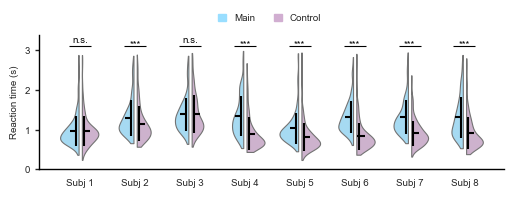

In [7]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import io
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_rel, mannwhitneyu, wilcoxon
from statsmodels.stats.multitest import fdrcorrection
import matplotlib.patches as patches

reaction_time = []
subjects = ['S1_LiJiawei', 'S2_ChenPeili', 'S3_WangZhenjie','S4_WangRuoming', 'S5_FangYu', 'S6_WuJinze', 'S7_LiuAnglin', 'S8_ChenQian']
for subject in subjects:
    sub_root = os.path.join('D:/Dataset/Cross_modal/Data', subject, 'behavior')
    subj_rt = []

    # Main experiment
    temp = []
    FileList = sorted(os.listdir(os.path.join(sub_root, 'stimulus')))
    FileList = [f for f in FileList if '.mat' in f]
    for file in FileList:
        behavior_data = io.loadmat(os.path.join(sub_root, 'stimulus', file))
        rt = behavior_data['theData']['rt'][0][0][0]
        trials = behavior_data['theSubject']['trial'][0][0][0][0][4][0]
        unmatch = behavior_data['theSubject']['trial'][0][0][0][0][3][0]
        img = [trials[t][0] for t in range(len(trials))]

        for i, t in enumerate(img):
            if t == 'None':
                continue
            if unmatch[i] == 1 and rt[i] != 0:
                temp.append(rt[i])
    subj_rt.append(temp)

    # Control experiment
    temp = []
    FileList = sorted(os.listdir(os.path.join(sub_root, 'unmatch')))
    FileList = [f for f in FileList if '.mat' in f]
    for file in FileList:
        behavior_data = io.loadmat(os.path.join(sub_root, 'unmatch', file))
        rt = behavior_data['theData']['rt'][0][0][0]
        trials = behavior_data['theSubject']['trial'][0][0][0][0][4][0]
        unmatch = behavior_data['theSubject']['trial'][0][0][0][0][3][0]
        img = [trials[t][0] for t in range(len(trials))]

        for i, t in enumerate(img):
            if t == 'None':
                continue
            if unmatch[i] == 1 and rt[i] != 0:
                temp.append(rt[i])
    subj_rt.append(temp)
    reaction_time.append(subj_rt)

t_stat = np.zeros(8)
p_vals = np.zeros(8)
for i in range(8):
    t_stat[i], p_vals[i] = mannwhitneyu(reaction_time[i][0], reaction_time[i][1])

p = p_vals.reshape(-1)
rejected, p_corrected = fdrcorrection(p, alpha=0.05)
p_corrected = p_corrected.reshape(p_vals.shape)

data = []
for i in range(8):  # 8 个被试
    for rt in reaction_time[i][0]:
        data.append({'Subject': f'Sub-{i+1}', 'Condition': 'Main', 'RT': rt})
    for rt in reaction_time[i][1]:
        data.append({'Subject': f'Sub-{i+1}', 'Condition': 'Control', 'RT': rt})

df = pd.DataFrame(data)
df = df[df['RT'] <= 3]

# 画图
colors = ['#99DEFF', '#D1AED1']
fig, ax = plt.subplots(figsize=(6, 1.75))
sns.violinplot(data=df, x='Subject', y='RT', hue='Condition', split=True, inner=None, gap=0.15, cut=0, palette=colors, linewidth=0.8)

subjects = sorted(df['Subject'].unique())
conditions = df['Condition'].unique()
offset = 0.15  # 控制横坐标上左右分开的位置偏移

linewidth = 1.5
for i, subj in enumerate(subjects):
    for j, cond in enumerate(conditions):
        # 当前的横坐标位置：Subject位置 ± offset
        x_pos = i + (-offset if cond == conditions[0] else offset)
        rt_vals = df[(df['Subject'] == subj) & (df['Condition'] == cond)]['RT']

        mean = rt_vals.mean()
        std = rt_vals.std()

        # 均值短横线
        if j == 0:
            ax.hlines(mean, x_pos-0.03, x_pos + 0.1, color='k', linewidth=linewidth)
        else:
            ax.hlines(mean, x_pos-0.1, x_pos+0.03, color='k', linewidth=linewidth)

        # 方差垂直线
        q1 = np.percentile(rt_vals, 25)
        q3 = np.percentile(rt_vals, 75)

        # 垂直线表示 Q1 到 Q3
        if j == 0:
            # ax.vlines(x_pos+0.09, q1, q3, color='k', linewidth=2.5)
            ax.vlines(x_pos+0.08, mean - std, mean + std, color='k', linewidth=linewidth)
        else:
            # ax.vlines(x_pos-0.09, q1, q3, color='k', linewidth=2.5)
            ax.vlines(x_pos-0.08, mean - std, mean + std, color='k', linewidth=linewidth)

    va = 'center'
    if p_corrected[i] > 0.05:
        text = 'n.s.'
        va = 'bottom'
    elif p_corrected[i] > 0.01:
        text = '*'
    elif p_corrected[i] > 0.001:
        text = '**'
    else:
        text = '***'
    ax.hlines(3.1, i-0.2, i+0.2, color='k', linewidth=0.8)
    ax.text(i, 3.15, text, ha='center', va=va, fontsize=fontsize, fontproperties='Arial', color='k')
plt.legend().set_visible(False)

ax.set_ylim(0, 3.4)

ax.set_xticklabels(['Subj 1', 'Subj 2', 'Subj 3', 'Subj 4', 'Subj 5', 'Subj 6', 'Subj 7', 'Subj 8'], fontsize=fontsize, fontproperties='Arial')
ax.set_xlabel(None)
ax.set_yticklabels(['0', '1', '2', '3'], fontsize=fontsize, fontproperties='Arial')
ax.set_ylabel('Reaction time (s)', fontsize=fontsize, fontproperties='Arial')

ax.grid(False)

for spine in ax.spines.values():
    spine.set_visible(False)
# 仅保留 X 和 Y 轴
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_color('black')

# plt.tick_params(axis='x', which='both', bottom='off')
plt.tick_params(axis='y', which='both', left='off', length=3, width=1)

handles = [
    patches.Rectangle((0, 0), 1, 1, color=colors[0], label="Main"),
    patches.Rectangle((0, 0), 1, 1, color=colors[1], label="Control")
]
fig.legend(handles=handles, loc="upper center", ncol=2, handleheight=0.8, handlelength=0.8, fontsize=fontsize, frameon=False, bbox_to_anchor=(0.51, 1.05))

fig.savefig(os.path.join(Figure_root, 'Fig.4 - h.png'), format="png", dpi=500, bbox_inches="tight")

# Figure 4 - i

C:\Users\DELL\AppData\Local\Temp\ipykernel_28296\1061108852.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(sm, cax=ax, orientation='horizontal')


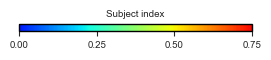

In [18]:
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

fig, ax = plt.subplots(figsize=(3, 0.1))
cmap = plt.cm.get_cmap('jet')
truncated_cmap = mcolors.LinearSegmentedColormap.from_list('truncated_jet', cmap(np.linspace(0.15, 0.9, 256)))
norm = mcolors.Normalize(vmin=0, vmax=0.75)
sm = plt.cm.ScalarMappable(cmap=truncated_cmap, norm=norm)

sm.set_array([])  # 需要设置才能画colorbar

cbar = plt.colorbar(sm, cax=ax, orientation='horizontal')
cbar.set_ticks([0, 0.25, 0.5, 0.75])  # 可以自定义刻度
cbar.ax.tick_params(labelsize=fontsize)
cbar.outline.set_linewidth(1)
cbar.outline.set_edgecolor('black')

cbar.ax.xaxis.set_label_position('top')  # 把 label 放在右侧顶部
cbar.set_label('Subject index', labelpad=5, loc='center', fontsize=fontsize, fontproperties='Arial')


fig.savefig(os.path.join(Figure_root, "Fig.4 - i_colorbar.png"), format="png", dpi=500, bbox_inches="tight")

# Figure 5 - b

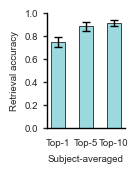

In [9]:
import matplotlib.pyplot as plt
import os
import numpy as np

# 示例数据
categories = ['Top-1', 'Top-5', 'Top-10']
values = [0.74553, 0.88192, 0.91015]
errors = [0.04512, 0.03636, 0.02426]   # 每个类别的误差值

# 自定义颜色列表（使用 RGB 值）
colors = ['#9cd9de'] * 3

bar_width = 0.5

# 创建柱状图
fig, ax = plt.subplots(figsize=(1, 1.5))
ax.bar(categories, values, color=colors, capsize=5, width=bar_width, edgecolor='black', linewidth=0.5)

ax.errorbar(categories, values, yerr=errors, fmt='none', elinewidth=1, capsize=3, capthick=1, color='black')

plt.xticks(fontsize=fontsize, fontproperties='Arial')
plt.yticks(fontsize=fontsize, fontproperties='Arial')

# plt.tick_params(axis='x', which='both', bottom='off')
plt.tick_params(axis='y', which='both', left='off', length=3, width=1)
plt.grid(False)

plt.xlabel('Subject-averaged', fontsize=fontsize, fontproperties='Arial', labelpad=5)
plt.ylabel('Retrieval accuracy', fontsize=fontsize, fontproperties='Arial')

plt.ylim(0, 1)

# 移除图表的边框
for spine in ax.spines.values():
    spine.set_visible(False)

# 仅保留 X 和 Y 轴
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_color('black')

fig.savefig(os.path.join(Figure_root, "Fig.5 - b.png"), format="png", dpi=500, bbox_inches="tight")

# Figure 5 - f

Background RRGGBBAA: ffffff00
Area 0:0:2274.66:1024 exported to 2275 x 1024 pixels (96 dpi)


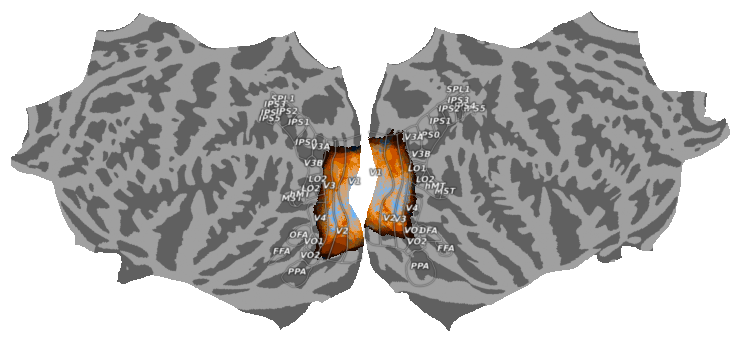

In [4]:
import os
import cortex
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
lh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/EVC_Suppresion_area_lh.csv')
rh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/EVC_Suppresion_area_rh.csv')

combined_df = pd.concat([lh, rh])
suppression = combined_df.to_numpy()
data = np.zeros((len(suppression), 2))

for i in range(len(suppression)):
    data[i, 0] = suppression[i, 0]
    data[i, 1] = suppression[i, 1]

    if data[i, 0] == 0 and data[i, 1] == 0:
        data[i] = np.nan

fig= plt.figure(figsize=(2 * pycortex_figheight, pycortex_figheight))
surface = cortex.dataset.Vertex2D(data[:, 0], data[:, 1], subject='fsaverage', cmap='PU_BuOr_covar', vmin=0, vmax=0.75, vmin2=0, vmax2=0.75)
_ = cortex.quickflat.make_figure(surface, with_colorbar=False, with_curvature=True, with_sulci=False, with_rois=True,
                                 with_labels=True, labelsize=str(pycortex_fontsize)+"pt", colorbar_location=(0.4, 0, 0.2, 0.02), fig=fig)
fig.savefig(os.path.join(Figure_root, "Fig.5 - f.png"), format="png", dpi=500, bbox_inches="tight")

# Figure 5 - g

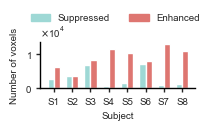

In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import matplotlib.patches as patches

# subjects = ['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4', 'Subject 5', 'Subject 6', 'Subject 7', 'Subject 8']
subjects = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8']

voxels = [[2870,3692,6837,681,1720,7069,1105,1154],
          [6230,3530,8404,11655,10429,8001,12863,10942]]

# colors = [(252/255, 140/255, 90/255),
#           (75/255, 116/255, 178/255)]
colors = [(158/255, 216/255, 213/255),
          (222/255, 118/255, 113/255)]

bar_width = 0.5
x = np.arange(len(subjects)) * 1.5

fig, ax = plt.subplots(figsize=(2, 0.6))

ax.bar(x - bar_width / 2, voxels[0], width=bar_width, label='Suppression', color=colors[0])
ax.bar(x + bar_width / 2, voxels[1], width=bar_width, label='Non-suppression', color=colors[1])

plt.ylim((0, 13500))

plt.xlabel('Subject', fontsize=fontsize, fontproperties='Arial')
plt.ylabel('Number of voxels', fontsize=fontsize, fontproperties='Arial')

plt.grid(False)
plt.tick_params(axis='x', which='both', bottom='off', length=3, width=1)
plt.tick_params(axis='y', which='both', left='off', length=3, width=1)

plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
for label in ax.get_yticklabels():
    label.set_fontsize(fontsize)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_color('black')

plt.xticks(x, subjects, fontsize=fontsize, fontproperties='Arial')
plt.yticks(fontsize=fontsize, fontproperties='Arial')

handles = [
    patches.Rectangle((0, 0), 1, 1, color=colors[0], label="Suppressed"),
    patches.Rectangle((0, 0), 1, 1, color=colors[1], label="Enhanced"),
]
fig.legend(handles=handles, loc="upper center", ncol=5, fontsize=fontsize, frameon=False, bbox_to_anchor=(0.5, 1.5))
fig.savefig(os.path.join(Figure_root, "Fig.5 - g.png"), format="png", dpi=500, bbox_inches="tight")

# Figure 5 - h

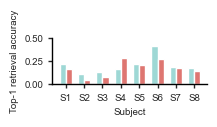

In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# subjects = ['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4', 'Subject 5', 'Subject 6', 'Subject 7', 'Subject 8']
subjects = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8']

retrieval_performance = [[0.22005,0.10784,0.13936,0.16667,0.21975,0.4122,0.18966,0.1769],
                         [0.17115,0.04412,0.07824,0.28676,0.21481,0.27317,0.17734,0.14988]]

# colors = [(252/255, 140/255, 90/255),
#           (75/255, 116/255, 178/255)]
colors = [(158/255, 216/255, 213/255),
          (222/255, 118/255, 113/255)]

bar_width = 0.5
x = np.arange(len(subjects)) * 1.5

fig, ax = plt.subplots(figsize=(2, 0.6))

ax.bar(x - bar_width / 2, retrieval_performance[0], width=bar_width, label='Suppression', color=colors[0])
ax.bar(x + bar_width / 2, retrieval_performance[1], width=bar_width, label='Non-suppression', color=colors[1])

plt.ylim((0, 0.5))

plt.xlabel('Subject', fontsize=fontsize, fontproperties='Arial')
plt.ylabel('Top-1 retrieval accuracy', fontsize=fontsize, fontproperties='Arial')

plt.grid(False)
plt.tick_params(axis='x', which='both', bottom='off', length=3, width=1)
plt.tick_params(axis='y', which='both', left='off', length=3, width=1)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_color('black')

plt.xticks(x, subjects, fontsize=fontsize, fontproperties='Arial')
plt.yticks(fontsize=fontsize, fontproperties='Arial')

# handles = [
#     patches.Rectangle((0, 0), 1, 1, color=colors[0], label="Suppressed"),
#     patches.Rectangle((0, 0), 1, 1, color=colors[1], label="Enhanced"),
# ]
# fig.legend(handles=handles, loc="upper center", ncol=5, fontsize=fontsize, frameon=False, bbox_to_anchor=(0.5, 1.2))
fig.savefig(os.path.join(Figure_root, "Fig.5 - h.png"), format="png", dpi=500, bbox_inches="tight")

# Figure 5 - I

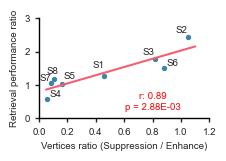

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

ratio = np.array([0.460674157,1.045892351,0.813541171,0.058429858,0.164924729,0.883514561,0.08590531,0.10546518])
retrieval_performance_ratio = np.array([1.285714286,2.444242974,1.781186094,0.581217743,1.022997067,1.50895047,1.069471073,1.180277555])
subjects = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8']

x = np.array([0.460674157,1.045892351,0.813541171,0.158429858,0.254924729,0.983514561,0.08590531,0.13546518])
y = np.array([1.455714286,2.504242974,1.841186094,0.581217743,1.122997067,1.50895047,1.069471073,1.280277555])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(ratio, retrieval_performance_ratio)

# Predict values using the linear model
x_values = np.linspace(0.05, 1.1, 100)
y_values = slope * x_values + intercept
if p_value < 0.001:
    line1_text = 'p < 0.001'
elif p_value < 0.01:
    line1_text = 'p < 0.01'
elif p_value < 0.05:
    line1_text = 'p < 0.01'
else:
    line1_text = 'n.s.'
line1_text = 'r: %.2f\np = %.2E' % (r_value, p_value)

fig, ax = plt.subplots(figsize=(2.2, 1.3))
ax.plot(x_values, y_values, color=(248/255, 94/255, 114/255), label='Fitted line')
ax.scatter(ratio, retrieval_performance_ratio, label='Subject', s=8, color='#3d84a8')

plt.xlim(0, 1.2)
plt.ylim(0, 3)

plt.xlabel('Vertices ratio (Suppression / Enhance)', fontsize=fontsize, fontproperties='Arial')
plt.ylabel('Retrieval performance ratio', fontsize=fontsize, fontproperties='Arial')

plt.grid(False)
plt.tick_params(axis='x', which='both', bottom='off', length=3, width=1)
plt.tick_params(axis='y', which='both', left='off', length=3, width=1)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_color('black')

ax.set_xticks(np.arange(0, 1.3, 0.2))
plt.xticks(fontsize=fontsize, fontproperties='Arial')
plt.yticks(fontsize=fontsize, fontproperties='Arial')

for i, label in enumerate(subjects):
    ax.text(x[i], y[i], label, fontsize=fontsize, fontproperties='Arial', ha='right', va='bottom')

ax.text(0.8, 0.5, line1_text, fontsize=fontsize, color='red', ha='center', va='center', fontproperties='Arial')

fig.savefig(os.path.join(Figure_root, "Fig.5 - i.png"), format="png", dpi=500, bbox_inches="tight")

# Figure 6 - a

In [3]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

def compute_mean_variance(match, unmatch):
    mean_diff = np.mean(np.mean(match, axis=1) - np.mean(unmatch, axis=1))
    var_diff = np.mean(np.var(match, axis=1) - np.var(unmatch, axis=1))
    return mean_diff, var_diff

def compute_covariance_metrics(match, unmatch):
    cov_match = np.cov(match)
    cov_unmatch = np.cov(unmatch)
    cov_diff = cov_match - cov_unmatch
    trace_diff = np.trace(cov_match) - np.trace(cov_unmatch)
    return cov_diff, trace_diff

def compute_pca_similarity(match, unmatch, n_components=10):
    pca_match = PCA(n_components=n_components).fit(match.T)
    pca_unmatch = PCA(n_components=n_components).fit(unmatch.T)
    similarity = np.abs(np.dot(pca_match.components_, pca_unmatch.components_.T))
    angles = np.degrees(np.arccos(np.clip(similarity, -1.0, 1.0)))
    return similarity, angles

def compute_decoding_accuracy(match, unmatch):
    X = np.concatenate([match.T, unmatch.T], axis=0)
    y = np.array([0] * match.shape[1] + [1] * unmatch.shape[1])
    clf = SVC(kernel='linear')
    acc = cross_val_score(clf, X, y, cv=5).mean()
    return acc

def pca_manifold_analysis(match, unmatch, n_components=3):
    # PCA 拟合
    pca_match = PCA(n_components=n_components).fit(match.T)
    pca_unmatch = PCA(n_components=n_components).fit(unmatch.T)

    # 获取前n个主轴的夹角（以cosine相似度为基础）
    cosine_sim = np.dot(pca_match.components_, pca_unmatch.components_.T)
    cosine_sim = np.clip(cosine_sim, -1, 1)
    angles = np.degrees(np.arccos(np.abs(cosine_sim)))

    return pca_match, pca_unmatch, angles


data = np.load('D:/neural_manifold.npz')
suppression_manifold = data['suppression_manifold']
enhance_manifold = data['enhance_manifold']

import warnings
warnings.filterwarnings('ignore')

trace_sup = []
acc_sup = []
cov_dif_sup = []

for roi_id in range(3):
    t = []
    for sub_id in range(8):
        match = suppression_manifold[sub_id, 0, roi_id]
        unmatch = suppression_manifold[sub_id, 1, roi_id]

        # match 和 unmatch 维度为 [100, 400]
        mean_diff, var_diff = compute_mean_variance(match, unmatch)
        cov_diff, trace_diff = compute_covariance_metrics(match, unmatch)
        similarity, angles = compute_pca_similarity(match, unmatch, n_components=10)
        acc = compute_decoding_accuracy(match, unmatch)
        pca_match, pca_unmatch, angles = pca_manifold_analysis(match, unmatch, n_components=10)

        t.append(trace_diff)
        acc_sup.append(acc)
        cov_dif_sup.append(np.mean(cov_diff))

    trace_sup.append(t)

trace_sup = trace_sup[1:]
acc_sup = [acc_sup[7:14], acc_sup[14:]]
cov_dif_sup = [cov_dif_sup[7:14], cov_dif_sup[14:]]

import warnings
warnings.filterwarnings('ignore')

trace_enh = []
acc_enh = []
cov_dif_enh = []

for roi_id in range(3):
    t = []
    for sub_id in range(8):
        match = enhance_manifold[sub_id, 0, roi_id]
        unmatch = enhance_manifold[sub_id, 1, roi_id]

        # match 和 unmatch 维度为 [100, 400]
        mean_diff, var_diff = compute_mean_variance(match, unmatch)
        cov_diff, trace_diff = compute_covariance_metrics(match, unmatch)
        similarity, angles = compute_pca_similarity(match, unmatch, n_components=10)
        acc = compute_decoding_accuracy(match, unmatch)
        pca_match, pca_unmatch, angles = pca_manifold_analysis(match, unmatch, n_components=10)

        t.append(trace_diff)
        acc_enh.append(acc)
        cov_dif_enh.append(np.mean(cov_diff))

    trace_enh.append(t)
trace_enh = trace_enh[1:]
acc_enh = [acc_enh[7:14], acc_enh[14:]]
cov_dif_enh = [cov_dif_enh[7:14], cov_dif_enh[14:]]

0.0078125
0.0234375
0.546875
0.0078125
0.015625
0.7421875


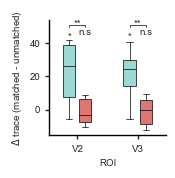

In [39]:
import os
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_rel, wilcoxon

colors = [(158/255, 216/255, 213/255),
          (222/255, 118/255, 113/255)]

fig, ax = plt.subplots(figsize=(1.5, 1.5))

# 设置位置：组1为位置 1 和 1.4，组2为 2.5 和 2.9
positions_sup = [1, 2.5]
positions_enh = [1.4, 2.9]

# 所有 boxplot 绘图
bp_sup = ax.boxplot(trace_sup, positions=positions_sup, widths=0.3, patch_artist=True, boxprops=dict(facecolor=colors[0]), showfliers=False)
bp_enh = ax.boxplot(trace_enh, positions=positions_enh, widths=0.3, patch_artist=True, boxprops=dict(facecolor=colors[1]), showfliers=False)

box = bp_sup
for patch, color in zip(box['boxes'], [colors[0], colors[0]]):
    patch.set_facecolor(color)
for b in box['boxes']:
    b.set_linewidth(0.5)
for median in box['medians']:
    median.set_linewidth(0.5)
    median.set_color('black')
for whisker in box['whiskers']:
    whisker.set_linewidth(0.5)
    whisker.set_color('black')
for cap in box['caps']:
    cap.set_linewidth(0.5)
    cap.set_color('black')

box = bp_enh
for patch, color in zip(box['boxes'], [colors[1], colors[1]]):
    patch.set_facecolor(color)
for b in box['boxes']:
    b.set_linewidth(0.5)
for median in box['medians']:
    median.set_linewidth(0.5)
    median.set_color('black')
for whisker in box['whiskers']:
    whisker.set_linewidth(0.5)
    whisker.set_color('black')
for cap in box['caps']:
    cap.set_linewidth(0.5)
    cap.set_color('black')

# 设置x轴刻度和标签
ax.set_xticks([1.2, 2.7])
ax.set_xticklabels(['V2', 'V3'])
plt.xticks(fontsize=fontsize, fontproperties='Arial')
plt.yticks(fontsize=fontsize, fontproperties='Arial')

plt.grid(False)
plt.tick_params(axis='x', which='both', bottom='off', length=3, width=1)
plt.tick_params(axis='y', which='both', left='off', length=3, width=1)

t_stat, p_value = wilcoxon(trace_sup[0], trace_enh[0])
va = 'center'
if p_value < 0.001:
    text = '***'
elif p_value < 0.01:
    text = '**'
elif p_value < 0.05:
    text = '*'
else:
    text = 'n.s'
    va = 'bottom'
plt.text(x=1.2, y=52, s=text, fontsize=fontsize, ha='center', va=va)
line_x = [1, 1, 1.4, 1.4]
line_y = [49.8, 51, 51, 49.8]
plt.plot(line_x, line_y, c='black', linewidth=0.5)
print(p_value)

# 检验是否偏移0
stat_sup, p_value = wilcoxon(trace_sup[0])
va = 'center'
if p_value < 0.001:
    text = '***'
elif p_value < 0.01:
    text = '**'
elif p_value < 0.05:
    text = '*'
else:
    text = 'n.s'
    va = 'bottom'
plt.text(x=1, y=44, s=text, fontsize=fontsize, ha='center', va=va)
print(p_value)
stat_enh, p_value = wilcoxon(trace_enh[0])
va = 'center'
if p_value < 0.001:
    text = '***'
elif p_value < 0.01:
    text = '**'
elif p_value < 0.05:
    text = '*'
else:
    text = 'n.s'
    va = 'bottom'
plt.text(x=1.4, y=44, s=text, fontsize=fontsize, ha='center', va=va)
print(p_value)

t_stat, p_value = wilcoxon(trace_sup[1], trace_enh[1])
va = 'center'
if p_value < 0.001:
    text = '***'
elif p_value < 0.01:
    text = '**'
elif p_value < 0.05:
    text = '*'
else:
    text = 'n.s'
    va = 'bottom'
plt.text(x=2.7, y=52, s=text, fontsize=fontsize, ha='center', va=va)
line_x = [2.5, 2.5, 2.9, 2.9]
line_y = [49.8, 51, 51, 49.8]
plt.plot(line_x, line_y, c='black', linewidth=0.5)
print(p_value)

# 检验是否偏移0
stat_sup, p_value = wilcoxon(trace_sup[1])
va = 'center'
if p_value < 0.001:
    text = '***'
elif p_value < 0.01:
    text = '**'
elif p_value < 0.05:
    text = '*'
else:
    text = 'n.s'
    va = 'bottom'
plt.text(x=2.5, y=44, s=text, fontsize=fontsize, ha='center', va=va)
print(p_value)
stat_enh, p_value = wilcoxon(trace_enh[1])
va = 'center'
if p_value < 0.001:
    text = '***'
elif p_value < 0.01:
    text = '**'
elif p_value < 0.05:
    text = '*'
else:
    text = 'n.s'
    va = 'bottom'
plt.text(x=2.9, y=44, s=text, fontsize=fontsize, ha='center', va=va)
print(p_value)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_color('black')

plt.xlabel('ROI', fontsize=fontsize, fontproperties='Arial')
plt.ylabel(r'$\Delta$ trace (matched - unmatched)', fontsize=fontsize, fontproperties='Arial')

fig.savefig(os.path.join(Figure_root, 'Fig.6 - a.png'), format='png', dpi=500, bbox_inches="tight")

# Figure 6 - b

0.015625
0.03125
0.463071015014588
0.00390625
0.001953125
0.6953125


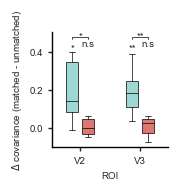

In [45]:
import os
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_rel, wilcoxon

colors = [(158/255, 216/255, 213/255),
          (222/255, 118/255, 113/255)]

fig, ax = plt.subplots(figsize=(1.5, 1.5))

# 设置位置：组1为位置 1 和 1.4，组2为 2.5 和 2.9
positions_sup = [1, 2.5]
positions_enh = [1.4, 2.9]

# 所有 boxplot 绘图
bp_sup = ax.boxplot(cov_dif_sup, positions=positions_sup, widths=0.3, patch_artist=True, boxprops=dict(facecolor=colors[0]), showfliers=False)
bp_enh = ax.boxplot(cov_dif_enh, positions=positions_enh, widths=0.3, patch_artist=True, boxprops=dict(facecolor=colors[1]), showfliers=False)

box = bp_sup
for patch, color in zip(box['boxes'], [colors[0], colors[0]]):
    patch.set_facecolor(color)
for b in box['boxes']:
    b.set_linewidth(0.5)
for median in box['medians']:
    median.set_linewidth(0.5)
    median.set_color('black')
for whisker in box['whiskers']:
    whisker.set_linewidth(0.5)
    whisker.set_color('black')
for cap in box['caps']:
    cap.set_linewidth(0.5)
    cap.set_color('black')

box = bp_enh
for patch, color in zip(box['boxes'], [colors[1], colors[1]]):
    patch.set_facecolor(color)
for b in box['boxes']:
    b.set_linewidth(0.5)
for median in box['medians']:
    median.set_linewidth(0.5)
    median.set_color('black')
for whisker in box['whiskers']:
    whisker.set_linewidth(0.5)
    whisker.set_color('black')
for cap in box['caps']:
    cap.set_linewidth(0.5)
    cap.set_color('black')

# 设置x轴刻度和标签
ax.set_xticks([1.2, 2.7])
ax.set_xticklabels(['V2', 'V3'])
plt.xticks(fontsize=fontsize, fontproperties='Arial')
plt.yticks(fontsize=fontsize, fontproperties='Arial')

plt.grid(False)
plt.tick_params(axis='x', which='both', bottom='off', length=3, width=1)
plt.tick_params(axis='y', which='both', left='off', length=3, width=1)

t_stat, p_value = wilcoxon(cov_dif_sup[0], cov_dif_enh[0])
va = 'center'
if p_value < 0.001:
    text = '***'
elif p_value < 0.01:
    text = '**'
elif p_value < 0.05:
    text = '*'
else:
    text = 'n.s'
    va = 'bottom'
plt.text(x=1.2, y=0.485, s=text, fontsize=fontsize, ha='center', va=va)
line_x = [1, 1, 1.4, 1.4]
line_y = [0.468, 0.478, 0.478, 0.468]
plt.plot(line_x, line_y, c='black', linewidth=0.5)
print(p_value)

# 检验是否偏移0
stat_sup, p_value = wilcoxon(cov_dif_sup[0])
va = 'center'
if p_value < 0.001:
    text = '***'
elif p_value < 0.01:
    text = '**'
elif p_value < 0.05:
    text = '*'
else:
    text = 'n.s'
    va = 'bottom'
plt.text(x=1, y=0.42, s=text, fontsize=fontsize, ha='center', va=va)
print(p_value)
stat_enh, p_value = wilcoxon(cov_dif_enh[0])
va = 'center'
if p_value < 0.001:
    text = '***'
elif p_value < 0.01:
    text = '**'
elif p_value < 0.05:
    text = '*'
else:
    text = 'n.s'
    va = 'bottom'
plt.text(x=1.4, y=0.42, s=text, fontsize=fontsize, ha='center', va=va)
print(p_value)

t_stat, p_value = wilcoxon(cov_dif_sup[1], cov_dif_enh[1])
va = 'center'
if p_value < 0.001:
    text = '***'
elif p_value < 0.01:
    text = '**'
elif p_value < 0.05:
    text = '*'
else:
    text = 'n.s'
    va = 'bottom'
plt.text(x=2.7, y=0.485, s=text, fontsize=fontsize, ha='center', va=va)
line_x = [2.5, 2.5, 2.9, 2.9]
line_y = [0.468, 0.478, 0.478, 0.468]
plt.plot(line_x, line_y, c='black', linewidth=0.5)
print(p_value)

# 检验是否偏移0
stat_sup, p_value = wilcoxon(cov_dif_sup[1])
va = 'center'
if p_value < 0.001:
    text = '***'
elif p_value < 0.01:
    text = '**'
elif p_value < 0.05:
    text = '*'
else:
    text = 'n.s'
    va = 'bottom'
plt.text(x=2.5, y=0.42, s=text, fontsize=fontsize, ha='center', va=va)
print(p_value)
stat_enh, p_value = wilcoxon(cov_dif_enh[1])
va = 'center'
if p_value < 0.001:
    text = '***'
elif p_value < 0.01:
    text = '**'
elif p_value < 0.05:
    text = '*'
else:
    text = 'n.s'
    va = 'bottom'
plt.text(x=2.9, y=0.42, s=text, fontsize=fontsize, ha='center', va=va)
print(p_value)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_color('black')

plt.xlabel('ROI', fontsize=fontsize, fontproperties='Arial')
plt.ylabel(r'$\Delta$ covariance (matched - unmatched)', fontsize=fontsize, fontproperties='Arial')

fig.savefig(os.path.join(Figure_root, 'Fig.6 - b.png'), format='png', dpi=500, bbox_inches="tight")

# Figure 6 - c

0.46875
0.015625
0.027281171477617997
0.037109375
0.001953125
0.001953125


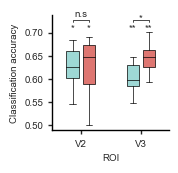

In [36]:
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_rel, wilcoxon

colors = [(158/255, 216/255, 213/255),
          (222/255, 118/255, 113/255)]

fig, ax = plt.subplots(figsize=(1.5, 1.5))

# 设置位置：组1为位置 1 和 1.4，组2为 2.5 和 2.9
positions_sup = [1, 2.5]
positions_enh = [1.4, 2.9]

# 所有 boxplot 绘图
bp_sup = ax.boxplot(acc_sup, positions=positions_sup, widths=0.3, patch_artist=True, boxprops=dict(facecolor=colors[0]), showfliers=False)
bp_enh = ax.boxplot(acc_enh, positions=positions_enh, widths=0.3, patch_artist=True, boxprops=dict(facecolor=colors[1]), showfliers=False)

box = bp_sup
for patch, color in zip(box['boxes'], [colors[0], colors[0]]):
    patch.set_facecolor(color)
for b in box['boxes']:
    b.set_linewidth(0.5)
for median in box['medians']:
    median.set_linewidth(0.5)
    median.set_color('black')
for whisker in box['whiskers']:
    whisker.set_linewidth(0.5)
    whisker.set_color('black')
for cap in box['caps']:
    cap.set_linewidth(0.5)
    cap.set_color('black')

box = bp_enh
for patch, color in zip(box['boxes'], [colors[1], colors[1]]):
    patch.set_facecolor(color)
for b in box['boxes']:
    b.set_linewidth(0.5)
for median in box['medians']:
    median.set_linewidth(0.5)
    median.set_color('black')
for whisker in box['whiskers']:
    whisker.set_linewidth(0.5)
    whisker.set_color('black')
for cap in box['caps']:
    cap.set_linewidth(0.5)
    cap.set_color('black')

# 设置x轴刻度和标签
ax.set_xticks([1.2, 2.7])
ax.set_xticklabels(['V2', 'V3'])
plt.xticks(fontsize=fontsize, fontproperties='Arial')
plt.yticks(fontsize=fontsize, fontproperties='Arial')

plt.grid(False)
plt.tick_params(axis='x', which='both', bottom='off', length=3, width=1)
plt.tick_params(axis='y', which='both', left='off', length=3, width=1)

t_stat, p_value = wilcoxon(acc_sup[0], acc_enh[0])
va = 'center'
if p_value < 0.001:
    text = '***'
elif p_value < 0.01:
    text = '**'
elif p_value < 0.05:
    text = '*'
else:
    text = 'n.s'
    va = 'bottom'
plt.text(x=1.2, y=0.73, s=text, fontsize=fontsize, ha='center', va=va)
line_x = [1, 1, 1.4, 1.4]
line_y = [0.723, 0.727, 0.727, 0.723]
plt.plot(line_x, line_y, c='black', linewidth=0.5)
print(p_value)

# 检验是否偏移0.5
stat_sup, p_value = wilcoxon(np.array(acc_sup[0])-0.5)
va = 'center'
if p_value < 0.001:
    text = '***'
elif p_value < 0.01:
    text = '**'
elif p_value < 0.05:
    text = '*'
else:
    text = 'n.s'
    va = 'bottom'
plt.text(x=1, y=0.71, s=text, fontsize=fontsize, ha='center', va=va)
print(p_value)
stat_enh, p_value = wilcoxon(np.array(acc_enh[0])-0.5)
va = 'center'
if p_value < 0.001:
    text = '***'
elif p_value < 0.01:
    text = '**'
elif p_value < 0.05:
    text = '*'
else:
    text = 'n.s'
    va = 'bottom'
plt.text(x=1.4, y=0.71, s=text, fontsize=fontsize, ha='center', va=va)
print(p_value)

t_stat, p_value = wilcoxon(acc_sup[1], acc_enh[1])
va = 'center'
if p_value < 0.001:
    text = '***'
elif p_value < 0.01:
    text = '**'
elif p_value < 0.05:
    text = '*'
else:
    text = 'n.s'
    va = 'bottom'
plt.text(x=2.7, y=0.73, s=text, fontsize=fontsize, ha='center', va=va)
line_x = [2.5, 2.5, 2.9, 2.9]
line_y = [0.723, 0.727, 0.727, 0.723]
plt.plot(line_x, line_y, c='black', linewidth=0.5)
print(p_value)

# 检验是否偏移0.5
stat_sup, p_value = wilcoxon(np.array(acc_sup[1])-0.5)
va = 'center'
if p_value < 0.001:
    text = '***'
elif p_value < 0.01:
    text = '**'
elif p_value < 0.05:
    text = '*'
else:
    text = 'n.s'
    va = 'bottom'
plt.text(x=2.5, y=0.71, s=text, fontsize=fontsize, ha='center', va=va)
print(p_value)
stat_enh, p_value = wilcoxon(np.array(acc_enh[1])-0.5)
va = 'center'
if p_value < 0.001:
    text = '***'
elif p_value < 0.01:
    text = '**'
elif p_value < 0.05:
    text = '*'
else:
    text = 'n.s'
    va = 'bottom'
plt.text(x=2.9, y=0.71, s=text, fontsize=fontsize, ha='center', va=va)
print(p_value)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_color('black')

plt.xlabel('ROI', fontsize=fontsize, fontproperties='Arial')
plt.ylabel('Classification accuracy', fontsize=fontsize, fontproperties='Arial')

fig.savefig(os.path.join(Figure_root, 'Fig.6 - c.png'), format='png', dpi=500, bbox_inches="tight")

# Figure 6 - d

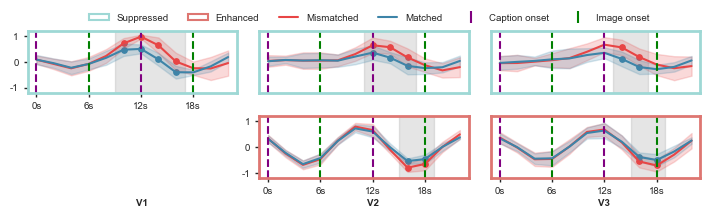

In [175]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests

data = np.load('D:/neural_manifold.npz')
suppression_manifold = data['suppression_manifold']
suppression_rt_corr = data['suppression_rt_corr']
suppression_ts = data['suppression_ts']
suppression_lp = data['suppression_lp']

enhance_manifold = data['enhance_manifold']
enhance_rt_corr = data['enhance_rt_corr']
enhance_ts = data['enhance_ts']
enhance_lp = data['enhance_lp']


colors = ['#e84545',
          '#3d84a8']
type_colors = [(158/255, 216/255, 213/255),
                (222/255, 118/255, 113/255)]
fig = plt.figure(figsize=(7, 1.75))
for i in range(2):
    for j in range(3):
        x = np.arange(12)
        if i == 1 and j == 0:
            continue
        ax = fig.add_subplot(2, 3, i*3+j+1)
        if i == 0:
            mean_unmatched_main = np.mean(suppression_ts[:, 1, j, :, :12], axis=1)
            mean_matched = np.mean(suppression_ts[:, 0, j, :, :12], axis=1)

            temp_unmatched = np.mean(enhance_ts[:, 1, j, :, :12], axis=1)
            temp_matched = np.mean(enhance_ts[:, 0, j, :, :12], axis=1)
        else:
            mean_unmatched_main = np.mean(enhance_ts[:, 1, j, :, :12], axis=1)
            mean_matched = np.mean(enhance_ts[:, 0, j, :, :12], axis=1)

            temp_unmatched = np.mean(suppression_ts[:, 1, j, :, :12], axis=1)
            temp_matched = np.mean(suppression_ts[:, 0, j, :, :12], axis=1)

        max = np.max([np.max(np.abs(mean_unmatched_main), axis=1), np.max(np.abs(mean_matched), axis=1),
                      np.max(np.abs(temp_unmatched), axis=1), np.max(np.abs(temp_matched), axis=1)], axis=0, keepdims=True).T
        mean_unmatched_main /= max
        mean_matched /= max

        # 将数据转为 NumPy 数组
        ts_unmatched_main = np.array(mean_unmatched_main)
        ts_matched = np.array(mean_matched)  # [被试数 x 时间点数]

        p_values = []

        # 对每个时间点进行配对 t 检验
        for time_idx in range(ts_matched.shape[1]):
            t_stat, p_val = wilcoxon(ts_unmatched_main[:, time_idx], ts_matched[:, time_idx])
            p_values.append(p_val)

        # 转为 NumPy 数组
        p_values = np.array(p_values)

        # FDR 校正
        alpha = 0.05  # 设置置信水平为 0.1
        significant, p_values_corrected, _, _ = multipletests(p_values, alpha=alpha, method='fdr_bh')

        # 可视化结果
        time_points = np.arange(12) * 2
        ax.plot(time_points, np.mean(ts_unmatched_main, axis=0), color=colors[0], label='Unmatched_main', linewidth=1.5)
        ax.plot(time_points, np.mean(ts_matched, axis=0), color=colors[1], label='Matched', linewidth=1.5)

        # 显著性标注
        for idx, is_significant in enumerate(significant):
            if idx == 0: continue
            if is_significant:
                ax.scatter(time_points[idx], np.mean(ts_unmatched_main[:, idx]), color=colors[0], s=15, label="Significant" if idx == 0 else "")
                ax.scatter(time_points[idx], np.mean(ts_matched[:, idx]), color=colors[1], s=15, label="Significant" if idx == 0 else "")

        ax.fill_between(time_points, np.mean(ts_unmatched_main, axis=0) - np.std(ts_unmatched_main, axis=0),
                         (np.mean(ts_unmatched_main, axis=0) + np.std(ts_unmatched_main, axis=0)),
                        color=colors[0], alpha=0.2, label="Mean ± Std Dev")
        ax.fill_between(time_points, np.mean(ts_matched, axis=0) - np.std(ts_matched, axis=0),
                         np.mean(ts_matched, axis=0) + np.std(ts_matched, axis=0), color=colors[1], alpha=0.2, label="Mean ± Std Dev")

        def find_significant_intervals(significant_array, time_array):
            intervals = []
            in_interval = False
            for i in range(len(significant_array)):
                if significant_array[i] and not in_interval:
                    start = time_array[i]
                    in_interval = True
                elif not significant_array[i] and in_interval:
                    end = time_array[i]
                    if end > start + 2:
                        intervals.append((start, end))
                    in_interval = False
            # 如果最后一段到结尾还在显著区
            if in_interval:
                intervals.append((start, time_array[-1]))
            return intervals

        sig_intervals = find_significant_intervals(significant, time_points)

        for start, end in sig_intervals:
            ax.axvspan(start-1, end-1, color='grey', alpha=0.2, zorder=0)

        ax.axvline(x=0, color="purple", linestyle="--", linewidth=1.5)
        ax.axvline(x=12, color="purple", linestyle="--", linewidth=1.5)

        ax.axvline(x=6, color="green", linestyle="--", linewidth=1.5)
        ax.axvline(x=18, color="green", linestyle="--", linewidth=1.5)

        ax.set_xlim(-1, 23)
        ax.set_ylim(-1.2, 1.2)
        ax.grid(False)
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_linewidth(2)
            spine.set_color(type_colors[i])

        if j == 0 or i == 1 and j == 1:
            ax.set_yticks([-1, 0, 1])
            ax.set_yticklabels(['-1', '0', '1'])
            ax.tick_params(axis='y', which='both', left=True, length=3, width=1, labelsize=fontsize)
        else:
            ax.set_yticklabels([])
        if i == 1 or j == 0:
            ax.set_xticks([0, 6, 12, 18])
            ax.set_xticklabels(['0s', '6s', '12s', '18s'])
            ax.tick_params(axis='x', which='both', bottom=True, top=False, length=3, width=1, direction='out', labelsize=fontsize)
        else:
            ax.set_xticklabels([])

plt.tight_layout(pad=0.5)
fig.text(0.195, -0.03, 'V1', ha='center', fontsize=fontsize, fontproperties='Arial', fontweight='bold')
fig.text(0.525, -0.03, 'V2', ha='center', fontsize=fontsize, fontproperties='Arial', fontweight='bold')
fig.text(0.855, -0.03, 'V3', ha='center', fontsize=fontsize, fontproperties='Arial', fontweight='bold')

handles = [
    patches.Patch(facecolor='none', edgecolor=type_colors[0], linewidth=1.5, label='Suppressed'),
    patches.Patch(facecolor='none', edgecolor=type_colors[1], linewidth=1.5, label='Enhanced'),
    plt.Line2D([0], [0], color=colors[0], label="Mismatched", linewidth=1.5),
    plt.Line2D([0], [0], color=colors[1], label="Matched", linewidth=1.5),
    plt.Line2D([0], [0], color="purple", marker='|', linestyle='None', markersize=8, markeredgewidth=1.5, label="Caption onset"),
    plt.Line2D([0], [0], color="green", marker='|', linestyle='None', markersize=8, markeredgewidth=1.5, label="Image onset"),
]
fig.legend(handles=handles, loc="upper center", ncol=6, fontsize=fontsize, frameon=False, bbox_to_anchor=(0.52, 1.12))

fig.savefig(os.path.join(Figure_root, 'Fig.6 - d.png'), format='png', dpi=500, bbox_inches="tight")

# Figure 6 - e

0.0078125
0.4609375


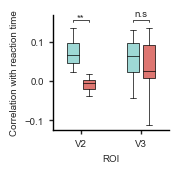

In [48]:
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_rel, wilcoxon, mannwhitneyu

data = np.load('D:/neural_manifold.npz')
suppression_manifold = data['suppression_manifold']
suppression_rt_corr = data['suppression_rt_corr']
suppression_ts = data['suppression_ts']
suppression_lp = data['suppression_lp']

enhance_manifold = data['enhance_manifold']
enhance_rt_corr = data['enhance_rt_corr']
enhance_ts = data['enhance_ts']
enhance_lp = data['enhance_lp']

suppression_rt_corr = (np.mean(suppression_rt_corr[:, 1:, :, 0], axis=2))
enhance_rt_corr = (np.mean(enhance_rt_corr[:, 1:, :, 0], axis=2))

colors = [(158/255, 216/255, 213/255),
          (222/255, 118/255, 113/255)]

fig, ax = plt.subplots(figsize=(1.5, 1.5))

# 设置位置：组1为位置 1 和 1.4，组2为 2.5 和 2.9
positions_sup = [1, 2.5]
positions_enh = [1.4, 2.9]

# 所有 boxplot 绘图
bp_sup = ax.boxplot(suppression_rt_corr, positions=positions_sup, widths=0.3, patch_artist=True, boxprops=dict(facecolor=colors[0]), showfliers=False)
bp_enh = ax.boxplot(enhance_rt_corr, positions=positions_enh, widths=0.3, patch_artist=True, boxprops=dict(facecolor=colors[1]), showfliers=False)

suppression_rt_corr = suppression_rt_corr.T
enhance_rt_corr = enhance_rt_corr.T

box = bp_sup
for patch, color in zip(box['boxes'], [colors[0], colors[0]]):
    patch.set_facecolor(color)
for b in box['boxes']:
    b.set_linewidth(0.5)
for median in box['medians']:
    median.set_linewidth(0.5)
    median.set_color('black')
for whisker in box['whiskers']:
    whisker.set_linewidth(0.5)
    whisker.set_color('black')
for cap in box['caps']:
    cap.set_linewidth(0.5)
    cap.set_color('black')

box = bp_enh
for patch, color in zip(box['boxes'], [colors[1], colors[1]]):
    patch.set_facecolor(color)
for b in box['boxes']:
    b.set_linewidth(0.5)
for median in box['medians']:
    median.set_linewidth(0.5)
    median.set_color('black')
for whisker in box['whiskers']:
    whisker.set_linewidth(0.5)
    whisker.set_color('black')
for cap in box['caps']:
    cap.set_linewidth(0.5)
    cap.set_color('black')

# 设置x轴刻度和标签
ax.set_xticks([1.2, 2.7])
ax.set_xticklabels(['V2', 'V3'])
plt.xticks(fontsize=fontsize, fontproperties='Arial')
plt.yticks(fontsize=fontsize, fontproperties='Arial')

plt.grid(False)
plt.tick_params(axis='x', which='both', bottom='off', length=3, width=1)
plt.tick_params(axis='y', which='both', left='off', length=3, width=1)

t_stat, p_value = wilcoxon(suppression_rt_corr[0], enhance_rt_corr[0])
va = 'center'
if p_value < 0.001:
    text = '***'
elif p_value < 0.01:
    text = '**'
elif p_value < 0.05:
    text = '*'
else:
    text = 'n.s'
    va = 'bottom'
plt.text(x=1.2, y=0.16, s=text, fontsize=fontsize, ha='center', va=va)
line_x = [1, 1, 1.4, 1.4]
line_y = [0.15, 0.155, 0.155, 0.15]
plt.plot(line_x, line_y, c='black', linewidth=0.5)
print(p_value)

t_stat, p_value = wilcoxon(suppression_rt_corr[1], enhance_rt_corr[1])
va = 'center'
if p_value < 0.001:
    text = '***'
elif p_value < 0.01:
    text = '**'
elif p_value < 0.05:
    text = '*'
else:
    text = 'n.s'
    va = 'bottom'
plt.text(x=2.7, y=0.16, s=text, fontsize=fontsize, ha='center', va=va)
line_x = [2.5, 2.5, 2.9, 2.9]
line_y = [0.15, 0.155, 0.155, 0.15]
plt.plot(line_x, line_y, c='black', linewidth=0.5)
print(p_value)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_color('black')

plt.xlabel('ROI', fontsize=fontsize, fontproperties='Arial')
plt.ylabel('Correlation with reaction time', fontsize=fontsize, fontproperties='Arial')

fig.savefig(os.path.join(Figure_root, 'Fig.6 - e.png'), format='png', dpi=500, bbox_inches="tight")

# Figure 6 - f

In [50]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
def compute_decoding_accuracy_per_class(match, unmatch, test_size=0.2, n_repeats=10):
    """
    match: np.array (features x trials)
    unmatch: np.array (features x trials)

    在不同随机种子下重复划分训练/测试集 n_repeats 次
    返回每个类别的平均准确率
    """
    acc_match_all = []
    acc_unmatch_all = []

    for seed in range(n_repeats):
        # 转置到 trials x features
        X = np.concatenate([match.T, unmatch.T], axis=0)
        y = np.array([0] * match.shape[1] + [1] * unmatch.shape[1])

        skf = StratifiedKFold(n_splits=int(1/test_size), shuffle=True)

        acc_match_list = []
        acc_unmatch_list = []

        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            clf = SVC(kernel='linear')
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)

            acc_match = accuracy_score(y_test[y_test==0], y_pred[y_test==0])
            acc_unmatch = accuracy_score(y_test[y_test==1], y_pred[y_test==1])

            acc_match_list.append(acc_match)
            acc_unmatch_list.append(acc_unmatch)

        # 每个随机种子下取 fold 平均
        acc_match_all.append(np.mean(acc_match_list))
        acc_unmatch_all.append(np.mean(acc_unmatch_list))

    # 返回重复 n_repeats 次的平均
    return np.mean(acc_match_all), np.mean(acc_unmatch_all)


data = np.load('D:/neural_manifold.npz')
suppression_manifold = data['suppression_manifold']
enhance_manifold = data['enhance_manifold']

import warnings
warnings.filterwarnings('ignore')

acc_sup = {
    'match': [],
    'unmatch': []
}

for roi_id in range(3):
    t_match = []
    t_unmatch = []
    for sub_id in range(8):
        match = suppression_manifold[sub_id, 0, roi_id]
        unmatch = suppression_manifold[sub_id, 1, roi_id]

        acc_match, acc_unmatch = compute_decoding_accuracy_per_class(match, unmatch)
        t_match.append(acc_match)
        t_unmatch.append(acc_unmatch)

    acc_sup['match'].append(t_match)
    acc_sup['unmatch'].append(t_unmatch)

acc_enh = {
    'match': [],
    'unmatch': []
}

for roi_id in range(3):
    t_match = []
    t_unmatch = []
    for sub_id in range(8):
        match = enhance_manifold[sub_id, 0, roi_id]
        unmatch = enhance_manifold[sub_id, 1, roi_id]

        acc_match, acc_unmatch = compute_decoding_accuracy_per_class(match, unmatch)
        t_match.append(acc_match)
        t_unmatch.append(acc_unmatch)

    acc_enh['match'].append(t_match)
    acc_enh['unmatch'].append(t_unmatch)

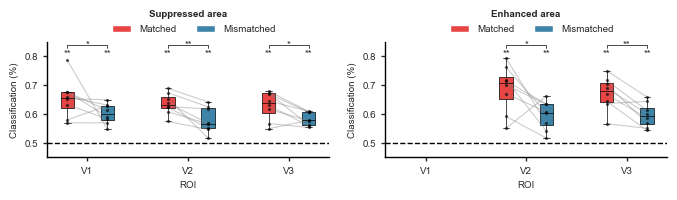

In [174]:
import seaborn as sns
colors = ['#e84545',
          '#3d84a8']
fig = plt.figure(figsize=(8, 1.5))
for i, acc in enumerate([acc_sup, acc_enh]):
    if i == 0:
        positions_match = [1, 2.5, 4]
        positions_unmatch = [1.6, 3.1, 4.6]

        acc_match = acc['match']
        acc_unmatch = acc['unmatch']
    else:
        positions_match = [2.5, 4]
        positions_unmatch = [3.1, 4.6]

        acc_match = acc['match'][1:]
        acc_unmatch = acc['unmatch'][1:]

    ax = fig.add_subplot(1, 2, i+1)
    bp_match = ax.boxplot(acc_match, positions=positions_match, widths=0.2, patch_artist=True, boxprops=dict(facecolor=colors[0]), showfliers=False)
    bp_unmatch = ax.boxplot(acc_unmatch, positions=positions_unmatch, widths=0.2, patch_artist=True, boxprops=dict(facecolor=colors[1]), showfliers=False)

    box = bp_match
    for patch, color in zip(box['boxes'], [colors[0], colors[0]]):
        patch.set_facecolor(color)
    for b in box['boxes']:
        b.set_linewidth(0.5)
    for median in box['medians']:
        median.set_linewidth(0.5)
        median.set_color('black')
    for whisker in box['whiskers']:
        whisker.set_linewidth(0.5)
        whisker.set_color('black')
    for cap in box['caps']:
        cap.set_linewidth(0.5)
        cap.set_color('black')

    box = bp_unmatch
    for patch, color in zip(box['boxes'], [colors[1], colors[1]]):
        patch.set_facecolor(color)
    for b in box['boxes']:
        b.set_linewidth(0.5)
    for median in box['medians']:
        median.set_linewidth(0.5)
        median.set_color('black')
    for whisker in box['whiskers']:
        whisker.set_linewidth(0.5)
        whisker.set_color('black')
    for cap in box['caps']:
        cap.set_linewidth(0.5)
        cap.set_color('black')

    for roi in range(3):
        if i == 1 and roi == 2:
            continue

        t_stat, p_value = wilcoxon(acc_match[roi], acc_unmatch[roi], alternative='greater')
        va = 'center'
        if p_value < 0.001:
            text = '***'
        elif p_value < 0.01:
            text = '**'
        elif p_value < 0.05:
            text = '*'
        else:
            text = 'n.s'
            va = 'bottom'
        plt.text(x=(positions_match[roi] + positions_unmatch[roi])/2, y=0.84, s=text, fontsize=fontsize, ha='center', va=va)
        line_x = [positions_match[roi], positions_match[roi], positions_unmatch[roi], positions_unmatch[roi]]
        line_y = [0.83, 0.838, 0.838, 0.83]
        plt.plot(line_x, line_y, c='black', linewidth=0.5)
        # print(p_value)

        # 检验是否偏移0.5
        stat_sup, p_value = wilcoxon(np.array(acc_match[roi])-0.5, alternative='greater')
        va = 'center'
        if p_value < 0.001:
            text = '***'
        elif p_value < 0.01:
            text = '**'
        elif p_value < 0.05:
            text = '*'
        else:
            text = 'n.s'
            va = 'bottom'
        plt.text(x=positions_match[roi], y=0.81, s=text, fontsize=fontsize, ha='center', va=va)
        # print(p_value)
        stat_enh, p_value = wilcoxon(np.array(acc_unmatch[roi])-0.5, alternative='greater')
        va = 'center'
        if p_value < 0.001:
            text = '***'
        elif p_value < 0.01:
            text = '**'
        elif p_value < 0.05:
            text = '*'
        else:
            text = 'n.s'
            va = 'bottom'
        plt.text(x=positions_unmatch[roi], y=0.81, s=text, fontsize=fontsize, ha='center', va=va)
        # print(p_value)

        data_all = np.array([acc_match[roi], acc_unmatch[roi]]).T
        x_pos = [positions_match[roi], positions_unmatch[roi]]
        for z in range(data_all.shape[0]):
            ax.plot(x_pos, data_all[z, :], color='gray', alpha=0.4, linewidth=0.8, markersize=0.2)
        ax.scatter([positions_match[roi]] * len(data_all[:, 0]), data_all[:, 0], c='k', s=2, alpha=0.5, zorder=3)
        ax.scatter([positions_unmatch[roi]] * len(data_all[:, 1]), data_all[:, 1], c='k', s=2, alpha=0.5, zorder=3)

    ax.axhline(y=0.5, color='k', linestyle='--', linewidth=1)

    # 设置x轴刻度和标签
    ax.set_xticks([1.3, 2.8, 4.3])
    ax.set_xticklabels(['V1', 'V2', 'V3'])
    ax.set_yticks([0.5, 0.6, 0.7, 0.8])
    ax.set_yticklabels(['0.5', '0.6', '0.7', '0.8'])
    plt.xticks(fontsize=fontsize, fontproperties='Arial')
    plt.yticks(fontsize=fontsize, fontproperties='Arial')

    plt.grid(False)
    plt.tick_params(axis='x', which='both', bottom='off', length=3, width=1)
    plt.tick_params(axis='y', which='both', left='off', length=3, width=1)

    ax.grid(False)
    ax.set_xlim(0.7, 4.9)
    ax.set_ylim(0.45, 0.85)
    for spine in ax.spines.values():
        spine.set_visible(False)

    ax.spines['left'].set_visible(True)
    ax.spines['left'].set_linewidth(1)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_visible(True)
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['bottom'].set_color('black')

    if i == 0:
        ax.text(0.5, 1.2, "Suppressed area", transform=ax.transAxes, ha='center', va='bottom', fontsize=fontsize, fontweight='bold')
    else:
        ax.text(0.5, 1.2, "Enhanced area", transform=ax.transAxes, ha='center', va='bottom', fontsize=fontsize, fontweight='bold')
    plt.xlabel('ROI', fontsize=fontsize, fontproperties='Arial')
    plt.ylabel('Classification (%)', fontsize=fontsize, fontproperties='Arial')

    handles = [
        patches.Patch(facecolor=colors[0], label='Matched'),
        patches.Patch(facecolor=colors[1], label='Mismatched')
    ]
    ax.legend(handles=handles, loc="upper center", ncol=2, fontsize=fontsize, frameon=False, bbox_to_anchor=(0.52, 1.22))

fig.savefig(os.path.join(Figure_root, 'Fig.6 - f.png'), format='png', dpi=500, bbox_inches="tight")

# Sup - Image clusters

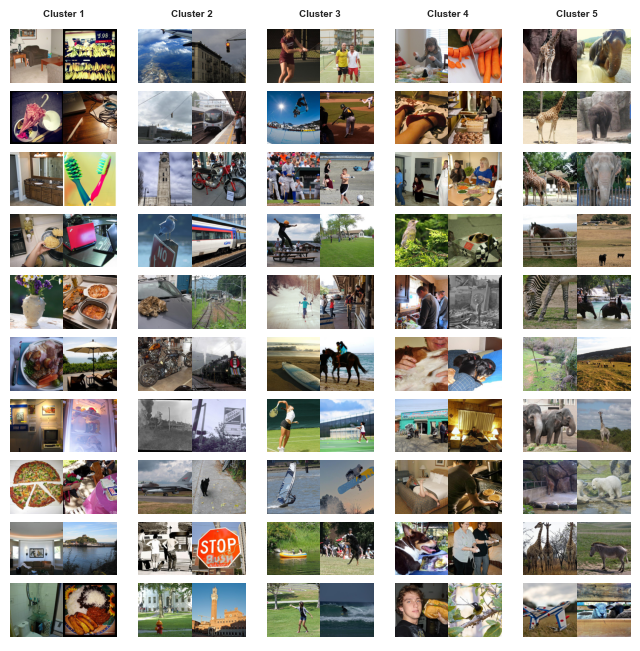

In [212]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from himalaya.backend import set_backend
from himalaya.ridge import RidgeCV
from himalaya.scoring import correlation_score
from sklearn.pipeline import make_pipeline
from himalaya.kernel_ridge import KernelRidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tqdm import tqdm

data = np.load('D:/neural_manifold.npz')
suppression_manifold = data['suppression_manifold']
enhance_manifold = data['enhance_manifold']

match_stimulus = data['match_stimulus'].astype(int)
unmatch_stimulus = data['unmatch_stimulus'].astype(int)

stim_label = np.load('D:/clip_cluster.npy')
match_label = stim_label[match_stimulus]
unmatch_label = stim_label[unmatch_stimulus]

stim_features = np.load('D:/CLIP_features.npy')
match_features = stim_features[match_label]
unmatch_features = stim_features[unmatch_label]

with open("D:/neural_manifold2.pkl", "rb") as f:
    whole_suppression, whole_enhance = pickle.load(f)

keep_labels = [0, 2, 5, 8, 9]

Stimulus_index = {}
with open('D:/Dataset/COCO_CN/Stimulus_index.txt', 'r', encoding='gbk') as f:
    content = f.readlines()
for line in content:
    temp = line.split()
    Stimulus_index[int(temp[0])] = temp[1]

# 需要展示的类别
labels_to_show = [0, 2, 5, 8, 9]

# 每类展示的数量
n_show = 30

n_show = 20  # 每类采样的数量
n_rows_in_label, n_cols_in_label = 10, 2  # 每个 label 内部 2行5列排布

fig, axes = plt.subplots(1, len(labels_to_show), figsize=(8, 8))

count = 0
for ax, label in zip(axes, labels_to_show):
    count += 1
    # 找到该类所有的图片路径
    temp_list = []
    for i in range(400):
        if match_label[0, i] == label:
            temp_list.append(os.path.join(
                'D:/Dataset/COCO_CN/All_images_480',
                Stimulus_index[match_stimulus[0, i]]
            ))

    # 随机选 10 张
    selected_imgs = random.sample(temp_list, min(n_show, len(temp_list)))

    # 在每个 subplot 内部再排小图
    for idx, img_path in enumerate(selected_imgs):
        row, col = divmod(idx, n_cols_in_label)
        # 子子图位置 [x0, y0, w, h] （相对于 ax 的坐标轴比例）
        x0, y0 = col / n_cols_in_label, 1 - (row + 1) / n_rows_in_label
        w, h = 1 / n_cols_in_label, 1 / n_rows_in_label
        subax = ax.inset_axes([x0, y0, w, h])
        img = mpimg.imread(img_path)
        subax.imshow(img)
        subax.axis("off")

    ax.set_title(f"Cluster {count}", fontsize=fontsize, fontweight="bold")
    ax.axis("off")  # 外层大框不显示

fig.savefig(os.path.join(Figure_root, 'Sup - image_clusters.png'), format='png', dpi=500, bbox_inches="tight")

# Sup - decoding image cluster

In [184]:
def compute_chance(y):
    """
    根据不均衡标签计算 chance level
    参数:
        y: array-like, shape (n_samples,)
           标签 (整数或字符串均可)
    返回:
        chance_majority: float, 永远预测多数类的 baseline
        chance_random: float, 按类别分布随机预测的 baseline
    """
    classes, counts = np.unique(y, return_counts=True)
    p = counts / counts.sum()

    chance_majority = np.max(p)    # 多数类 baseline
    chance_random = np.sum(p**2)   # 按分布随机预测 baseline

    return chance_majority, chance_random

In [281]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def retrieval_accuracy(y_test, y_pred, label_test):
    """
    计算检索 top-1/top-5 准确率，同时返回 confusion matrix

    参数:
    y_test: np.ndarray, shape (N, D) 测试集真实向量
    y_pred: np.ndarray, shape (N, D) 模型预测向量
    label_test: np.ndarray, shape (N,) 对应每个样本的标签

    返回:
    top1_acc: float
    top5_acc: float
    cm: np.ndarray, confusion matrix (normalized by true class)
    """
    sims = cosine_similarity(y_pred, y_test)  # (N, N)
    ranks = np.argsort(-sims, axis=1)  # 按相似度从高到低排序

    top1, top5 = 0, 0
    N = len(y_test)
    y_pred_label = np.zeros(N, dtype=label_test.dtype)

    for i in range(N):
        for k in range(5):
            candidate_idx = ranks[i][k]
            # if label_test[candidate_idx] == label_test[i]:
            if candidate_idx == i:
                if k == 0:
                    top1 += 1
                top5 += 1
                # 记录 top1 预测标签
                y_pred_label[i] = label_test[ranks[i][0]]
                break
        else:
            # 如果前5都没找到匹配，top1 预测取最相似的
            y_pred_label[i] = label_test[ranks[i][0]]

    top1_acc = top1 / N
    top5_acc = top5 / N

    # confusion matrix（normalized 按真实类）
    cm = confusion_matrix(label_test, y_pred_label, normalize='true')

    return top1_acc, top5_acc, cm

100%|██████████| 8/8 [01:02<00:00,  7.82s/it]


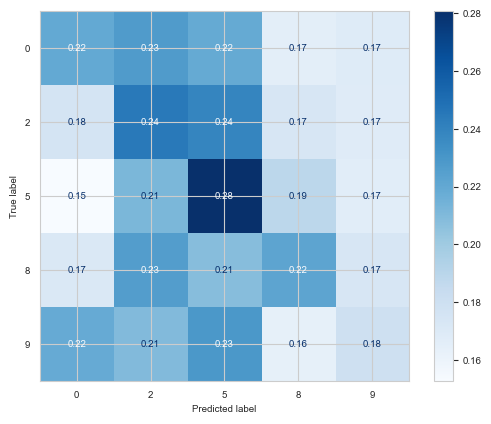

In [301]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

alpha = np.logspace(-20, 20, 40)

ridge = KernelRidgeCV(kernel='linear', alphas=alpha)
preprocess_pipeline = make_pipeline(
    StandardScaler(with_mean=True, with_std=True),
)
pipeline = make_pipeline(
    preprocess_pipeline,  # 标准化，去掉效果更好
    ridge,
    verbose=False,
)

match_results = []
match_cm = []
for i in tqdm(range(8)):
    temp = [[], [], [], [], []]
    temp_cm = []
    for _ in range(10):
        x = whole_suppression[i][:, 0].T
        y = match_features[i]
        label = match_label[i]

        mask = np.isin(label, keep_labels)
        x = x[mask]
        y = y[mask]
        label = label[mask]

        # 先按标签比例划分训练集和测试集
        X_train, X_test, y_train, y_test, label_train, label_test = train_test_split(
            x, y, label, test_size=0.25, stratify=label
        )

        # 训练集上采样，使每个类别样本数相等
        X_balanced = []
        y_balanced = []
        label_balanced = []

        classes = np.unique(label_train)
        n_max = np.max([np.sum(label_train == c) for c in classes])  # 每个类别上采样到最大数量

        for c in classes:
            X_c = X_train[label_train == c]
            y_c = y_train[label_train == c]
            label_c = label_train[label_train == c]

            X_res, y_res, label_res = resample(
                X_c, y_c, label_c,
                replace=True,
                n_samples=n_max
            )

            X_balanced.append(X_res)
            y_balanced.append(y_res)
            label_balanced.append(label_res)

        # 合并成训练集
        X_train = np.vstack(X_balanced)
        y_train = np.vstack(y_balanced)

        label_train = np.hstack(label_balanced)

        pipeline.fit(X_train, y_train)

        y_pred = pipeline.predict(X_test)
        # mean_Y = np.mean(y_train, axis=0)
        # var_Y = np.var(y_train, axis=0, ddof=0)
        # mean_scores = np.mean(y_pred, axis=0)
        # var_scores = np.var(y_pred, axis=0, ddof=0)
        # scale = np.sqrt(var_Y / (var_scores + 1e-10))
        # # 方差缩放 + 均值校正
        # y_pred = (y_pred - mean_scores) * scale + mean_Y

        # rs = correlation_score(y_test.T, y_pred.T)
        rs = (y_test - y_pred) ** 2
        top1_acc, top5_acc, cm = retrieval_accuracy(y_test, y_pred, label_test)
        chance_major, chance_distributed = compute_chance(label_test)
        temp[0].append(np.mean(rs))
        temp[1].append(top1_acc)
        temp[2].append(top5_acc)
        temp[3].append(chance_major)
        temp[4].append(chance_distributed)
        temp_cm.append(cm)

    match_results.append(np.mean(temp, axis=1))
    match_cm.append(np.mean(temp_cm, axis=0))
match_results = np.array(match_results)
match_cm = np.array(match_cm)
disp = ConfusionMatrixDisplay(confusion_matrix=match_cm.mean(0), display_labels=np.unique(label))
disp.plot(cmap="Blues", values_format=".2f")

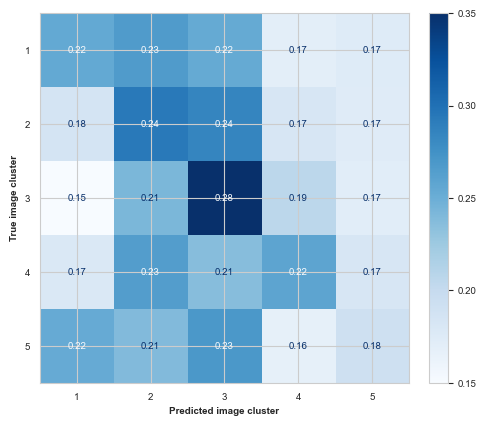

In [358]:
disp = ConfusionMatrixDisplay(confusion_matrix=match_cm.mean(0), display_labels=np.arange(1, 6))
disp.plot(cmap="Blues", values_format=".2f", colorbar=False)
plt.ylabel('True image cluster', fontsize=fontsize, fontweight='bold', fontname='Arial')
plt.xlabel('Predicted image cluster', fontsize=fontsize, fontweight='bold', fontname='Arial')
cbar_ticks = [0.15, 0.2, 0.25, 0.3, 0.35]
cbar = plt.colorbar(im, ax=disp.ax_, fraction=0.05, pad=0.04, ticks=cbar_ticks)
plt.savefig(os.path.join(Figure_root, 'Sup - Mean_confusion_matrix.png'), format='png', dpi=500, bbox_inches="tight")

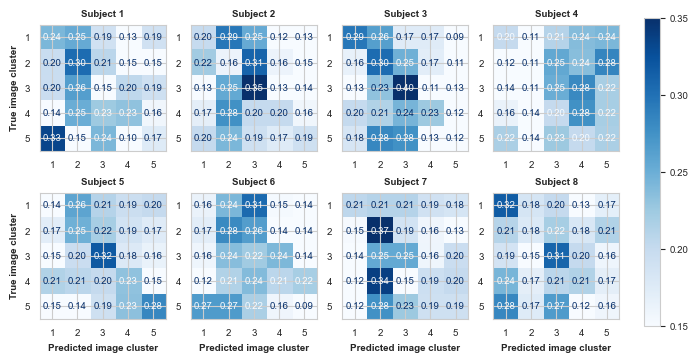

In [344]:
n_subjects = 8
fig, axes = plt.subplots(2, 4, figsize=(8, 4))  # 2行4列布局
axes = axes.flatten()  # 方便迭代

im_list = []
for i in range(n_subjects):
    disp = ConfusionMatrixDisplay(confusion_matrix=match_cm[i], display_labels=np.arange(1, 6))
    disp.plot(ax=axes[i], cmap="Blues", values_format=".2f", colorbar=False)  # colorbar 只画一次可选

    for text in disp.text_.flatten():
        text.set_fontsize(fontsize)

    im = axes[i].images[0]
    im.set_clim(0.15, 0.35)  # 设置统一色条范围
    im_list.append(im)
    if i == 0 or i == 4:
        axes[i].set_ylabel('True image cluster', fontsize=fontsize, fontweight='bold', fontname='Arial')
    else:
        axes[i].set_ylabel(None)
    if i in [4, 5, 6, 7]:
        axes[i].set_xlabel('Predicted image cluster', fontsize=fontsize, fontweight='bold', fontname='Arial')
    else:
        axes[i].set_xlabel(None)
    axes[i].set_title(f'Subject {i+1}', fontsize=fontsize, fontweight='bold')

cbar_ticks = [0.15, 0.2, 0.25, 0.3, 0.35]
cbar = fig.colorbar(im_list[0], ax=axes, fraction=0.025, pad=0.04, ticks=cbar_ticks)
plt.savefig(os.path.join(Figure_root, 'Sup - Subject_confusion_matrix.png'), format='png', dpi=500, bbox_inches="tight")

# Dataset paper

In [4]:
Figure_root = 'D:/Project/Article - Dataset/Figure'

In [1]:
Figure_root = '/root/Project/Cross-modal/Predictive_coding_new/Dataset_Figure'

In [2]:
import matplotlib.pyplot as plt
fontsize = 7
pycortex_dpi = 96
pycortex_height = 1024
pycortex_figheight = 3.6
pycortex_fontsize = round(pycortex_height / pycortex_dpi / pycortex_figheight * fontsize, 1)
print(f'Fontsize = %d, Pycortex_fontsize = %.1f' % (fontsize, pycortex_fontsize))

plt.rc('font', size=fontsize)

Fontsize = 7, Pycortex_fontsize = 20.7


# Figure 2 - a

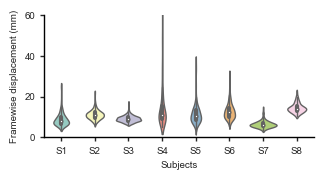

In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sub_label = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8']
FD = np.load('D:/Project/Cross-model decoding/quality_control/Framewise_displacement.npy')

label = []
FD_data = []
for i in range(8):
    FD_data.extend(FD[i]*100)
    label.extend([sub_label[i]] * len(FD[i]))

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(3.5, 2))
sns.violinplot(x=label, y=FD_data, inner='box', linewidth=1, showmeans=True, palette="Set3", ax=ax, scale="area", cut=1)

plt.xlabel('Subjects', fontsize=fontsize, fontproperties='Arial')
plt.ylabel('Framewise displacement (mm)', fontsize=fontsize, fontproperties='Arial')
plt.tight_layout()

plt.grid(False)
plt.tick_params(axis='x', which='both', bottom='off', length=3, width=1)
plt.tick_params(axis='y', which='both', left='off', length=3, width=1)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

for label in ax.get_yticklabels():
    label.set_fontsize(fontsize)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_color('black')

plt.ylim(0, 60)
fig.savefig(os.path.join(Figure_root, "Fig.2 - a.png"), format="png", dpi=500, bbox_inches="tight")

# Figure 2 - b

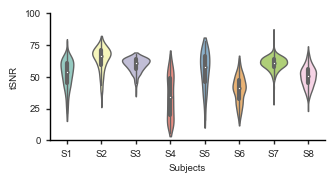

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import io

qc_data = io.loadmat('D:/Project/Cross-model decoding/quality_control/qc_fmri.mat')
qc_data['tsnr'][0][2][0][232] = 50
qc_data['tsnr'][0][3][0][358] = 50

tsnr = []
label = []
for i in range(8):
    tsnr.extend(qc_data['tsnr'][0][i][0])
    label.extend([sub_label[i]] * len(qc_data['tsnr'][0][i][0]))

tsnr = np.array(tsnr)
tsnr = np.where(tsnr < 0, 0, tsnr)

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(3.5, 2))
sns.violinplot(x=label, y=tsnr, inner='box', linewidth=1,showmeans=True, palette="Set3", ax=ax, scale="area", cut=0.5)

plt.xlabel('Subjects', fontsize=fontsize, fontproperties='Arial')
plt.ylabel('tSNR', fontsize=fontsize, fontproperties='Arial')
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.tight_layout()

plt.grid(False)
plt.tick_params(axis='x', which='both', bottom='off', length=3, width=1)
plt.tick_params(axis='y', which='both', left='off', length=3, width=1)

for label in ax.get_yticklabels():
    label.set_fontsize(fontsize)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_color('black')

plt.ylim(0, 100)
fig.savefig(os.path.join(Figure_root, "Fig.2 - b.png"), format="png", dpi=500, bbox_inches="tight")

# Figure 3 - a

Background RRGGBBAA: ffffff00
Area 0:0:2274.66:1024 exported to 2275 x 1024 pixels (96 dpi)
Background RRGGBBAA: ffffff00
Area 0:0:2274.66:1024 exported to 2275 x 1024 pixels (96 dpi)


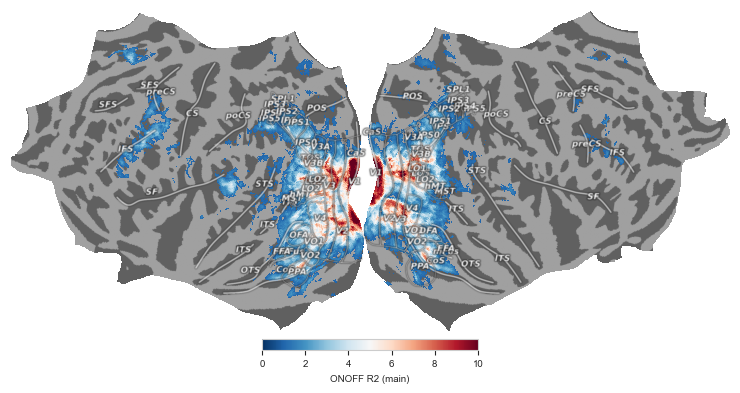

In [3]:
import os
import cortex
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

lh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/ONOFF_lh.csv')
rh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/ONOFF_rh.csv')

onoff = pd.concat([lh, rh])
data = onoff.to_numpy()
data = data.T
data[0] = np.where(data[2] < 1, np.nan, data[0])
data[1] = np.where(data[2] < 1, np.nan, data[1])
data[2] = np.where(data[2] < 1, np.nan, data[2])

fig= plt.figure(figsize=(2*pycortex_figheight, pycortex_figheight))
surface = cortex.dataset.Vertex(data[2], subject='fsaverage', vmin=0, vmax=10, cmap='RdBu_r')
img = cortex.quickflat.make_figure(surface, with_colorbar=False, with_curvature=True, with_sulci=True, with_rois=True,
                                 with_labels=True, labelsize=str(pycortex_fontsize)+"pt", colorbar_location=(0.4, 0, 0.2, 0.02), fig=fig)

sm = plt.cm.ScalarMappable(cmap='RdBu_r', norm=plt.Normalize(vmin=0, vmax=10))
cb = plt.colorbar(sm, ax=fig.axes[-1], fraction=0.03, pad=0.015, orientation="horizontal")
cb.set_label("ONOFF R2 (main)", fontsize=fontsize)
cb.ax.tick_params(labelsize=fontsize)

fig.savefig(os.path.join(Figure_root, "Fig.3 -a.png"), format="png", dpi=500, bbox_inches="tight")

/tmp/ipykernel_58844/3966483643.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdBu_r')


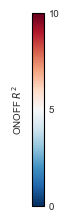

In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

fig, ax = plt.subplots(figsize=(0.15, 2.5))
cmap = plt.cm.get_cmap('RdBu_r')
truncated_cmap = mcolors.LinearSegmentedColormap.from_list('truncated_Blues', cmap(np.linspace(0, 1, 256)))
norm = mcolors.Normalize(vmin=0, vmax=10)
sm = plt.cm.ScalarMappable(cmap=truncated_cmap, norm=norm)
cb = plt.colorbar(sm, cax=ax, orientation="vertical")

cb.set_ticks([0, 5, 10])
cb.ax.set_yticklabels(['0', '5', '10'])
cb.ax.tick_params(labelsize=fontsize)
cb.ax.tick_params(axis='y', length=0)
cb.outline.set_linewidth(0.8)
cb.outline.set_edgecolor('black')

# 添加在 colorbar 顶部的 label
cb.set_label(r"ONOFF $R^2$", labelpad=6, fontsize=fontsize, rotation=90)
cb.ax.yaxis.set_label_position('left')  # 把 label 放在右侧顶部

fig.savefig(os.path.join(Figure_root, "Fig.3 - a_colorbar.png"), format="png", dpi=500, bbox_inches="tight")

# Figure 3 - b

Background RRGGBBAA: ffffff00
Area 0:0:2274.66:1024 exported to 2275 x 1024 pixels (96 dpi)
Background RRGGBBAA: ffffff00
Area 0:0:2274.66:1024 exported to 2275 x 1024 pixels (96 dpi)


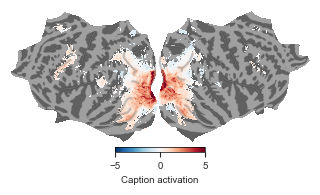

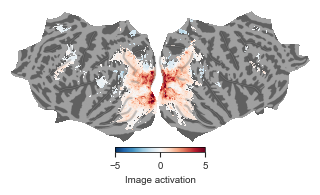

In [18]:
import os
import cortex
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

lh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/ONOFF_lh.csv')
rh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/ONOFF_rh.csv')

onoff = pd.concat([lh, rh])
data = onoff.to_numpy()
data = data.T
data[0] = np.where(data[2] < 1, np.nan, data[0])
data[1] = np.where(data[2] < 1, np.nan, data[1])
data[2] = np.where(data[2] < 1, np.nan, data[2])

label = ['b', 'c']
for i, k in enumerate(['ONOFF_Caption_main', 'ONOFF_Image_main']):
    fig= plt.figure(figsize=(3, 1.5))
    surface = cortex.dataset.Vertex(data[i], subject='fsaverage', vmin=-5, vmax=5, cmap='RdBu_r')
    img = cortex.quickflat.make_figure(surface, with_colorbar=False, with_curvature=True, with_sulci=True, with_rois=False,
                                     with_labels=False, labelsize=str(pycortex_fontsize)+"pt", colorbar_location=(0.4, 0, 0.2, 0.02), fig=fig)

    sm = plt.cm.ScalarMappable(cmap='RdBu_r', norm=plt.Normalize(vmin=-5, vmax=5))
    cb = plt.colorbar(sm, ax=fig.axes[-1], fraction=0.03, pad=0.015, orientation="horizontal")
    if i == 0:
        cb.set_label("Caption activation", fontsize=fontsize)
    else:
        cb.set_label("Image activation", fontsize=fontsize)
    cb.ax.tick_params(labelsize=fontsize)
    cb.outline.set_linewidth(0.5)
    cb.outline.set_edgecolor('black')

    fig.savefig(os.path.join(Figure_root, 'Fig.3 - ' + label[i] + ".png"), format="png", dpi=500, bbox_inches="tight")

# Figure 4 - a

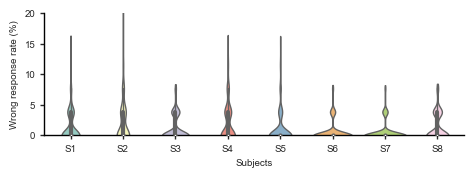

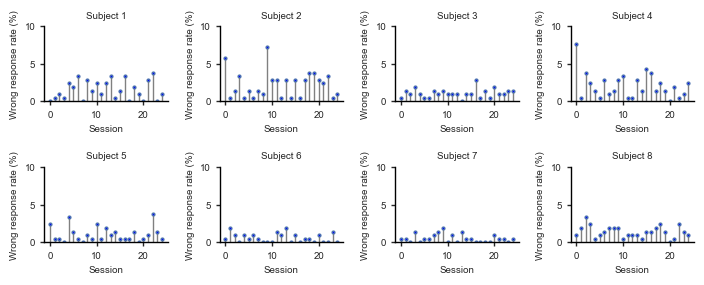

In [67]:
import os
import re
from scipy import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

subjects = ['S1_LiJiawei', 'S2_ChenPeili', 'S3_WangZhenjie', 'S4_WangRuoming', 'S5_FangYu', 'S6_WuJinze', 'S7_LiuAnglin', 'S8_ChenQian']
root = 'D:/Dataset/Cross_modal/Data'

behavior = []
for i in range(8):
    sub_root = os.path.join(root, subjects[i], 'behavior', 'stimulus')
    temp = np.zeros(200)
    FileList = sorted(os.listdir(sub_root))
    count = 0
    for file in FileList:
        if '.mat' not in file:
            continue
        count += 1
        run = re.findall(r'[Rr]un_?(\d+)', file)
        data = io.loadmat(os.path.join(sub_root, file))

        wrongAlarm = data['theData']['wrongAlarm'][0][0][0][0]
        temp[int(run[0])-1] = wrongAlarm/26
    behavior.append(temp)

sub_label = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8']

label = []
data = []
for i in range(8):
    data.extend(behavior[i]*100)
    label.extend([sub_label[i]] * len(behavior[i]))

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(5, 2))
sns.violinplot(x=label, y=data, inner='box', linewidth=1, showmeans=True, palette="Set3", ax=ax, scale="area", cut=1)

plt.xlabel('Subjects', fontsize=fontsize, fontproperties='Arial')
plt.ylabel('Wrong response rate (%)', fontsize=fontsize, fontproperties='Arial')
plt.tight_layout()

plt.grid(False)
plt.tick_params(axis='x', which='both', bottom='off', length=3, width=1)
plt.tick_params(axis='y', which='both', left='off', length=3, width=1)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

for label in ax.get_yticklabels():
    label.set_fontsize(fontsize)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_color('black')

plt.ylim(0, 20)
fig.savefig(os.path.join(Figure_root, "Fig.4 - a.png"), format="png", dpi=500, bbox_inches="tight")

for i in range(8):
    behavior[i] = np.mean(np.array(behavior[i]).reshape(25, 8), axis=1) * 100

fig, axes = plt.subplots(2, 4, figsize=(7.2, 3))  # 2行4列的子图
axes = axes.flatten()  # 变成一维数组便于索引

for i in range(8):
    markerline, stemlines, baseline = axes[i].stem(behavior[i], basefmt=" ")

    # 修改 marker 大小
    markerline.set_markerfacecolor('blue')
    markerline.set_markersize(2)  # 控制marker的大小

    # 修改 stem 线宽
    stemlines.set_linewidth(1)  # 控制线的粗细
    stemlines.set_color('gray')

    axes[i].set_title(f'Subplot {i+1}', fontsize=fontsize)
    axes[i].set_xlabel('Index', fontsize=fontsize)
    axes[i].set_ylabel('Value', fontsize=fontsize)
    axes[i].set_ylim([0, 10])
    axes[i].tick_params(labelsize=fontsize)

    axes[i].set_ylabel('Wrong response rate (%)', fontsize=fontsize)
    axes[i].set_xlabel('Session', fontsize=fontsize)
    axes[i].set_title('Subject '+ str(i+1), fontsize=fontsize)

    for spine in axes[i].spines.values():
        spine.set_visible(False)

    axes[i].spines['left'].set_visible(True)
    axes[i].spines['left'].set_linewidth(1)
    axes[i].spines['left'].set_color('black')
    axes[i].spines['bottom'].set_visible(True)
    axes[i].spines['bottom'].set_linewidth(1)
    axes[i].spines['bottom'].set_color('black')

    axes[i].grid(False)

    axes[i].tick_params(axis='x', which='both', bottom='off', length=3, width=1)
    axes[i].tick_params(axis='y', which='both', left='off', length=3, width=1)

plt.tight_layout()
plt.show()
fig.savefig(os.path.join(Figure_root, "Fig.4 - b.png"), format="png", dpi=500, bbox_inches="tight")

# Figure 5 - a

/root/anaconda3/envs/tats/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:347: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


Background RRGGBBAA: ffffff00
Area 0:0:2274.66:1024 exported to 2275 x 1024 pixels (96 dpi)


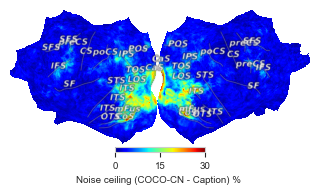

In [6]:
import os
import cortex
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pts, polys = cortex.database.db.get_surf('fsaverage', 'inflated', 'lh')
lh_surface = cortex.polyutils.Surface(pts, polys)

pts, polys = cortex.database.db.get_surf('fsaverage', 'inflated', 'rh')
rh_surface = cortex.polyutils.Surface(pts, polys)

lh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/ONOFF_lh.csv')
rh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/ONOFF_rh.csv')

onoff = pd.concat([lh, rh])
onoff = onoff.to_numpy()
onoff = onoff.T

lh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/noise_ceiling_lh.csv')
rh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/noise_ceiling_rh.csv')

data = pd.concat([lh, rh])
data = data.to_numpy()
data = data.T

for i in range(2):
    data[i, :len(pts)] = lh_surface.smooth(data[i, :len(pts)])
    data[i, len(pts):] = rh_surface.smooth(data[i, len(pts):])

# data[0] = np.where(onoff[2] < 1, np.nan, data[0])
# data[1] = np.where(onoff[2] < 1, np.nan, data[1])

fig= plt.figure(figsize=(3, 1.5))
surface = cortex.dataset.Vertex(data[0], subject='fsaverage', vmin=0, vmax=30, cmap='jet')
img = cortex.quickflat.make_figure(surface, with_colorbar=False, with_curvature=True, with_sulci=True, with_rois=False, with_labels=True, labelsize="49.8pt", colorbar_location=(0.4, 0, 0.2, 0.02), fig=fig)

sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=30))
cb = plt.colorbar(sm, ax=fig.axes[-1], fraction=0.03, pad=0.015, orientation="horizontal")
cb.set_label("Noise ceiling (COCO-CN - Caption) % ", fontsize=fontsize)
cb.ax.tick_params(labelsize=fontsize)
cb.set_ticks([0, 15, 30])
cb.ax.set_xticklabels(['0', '15', '30'])

fig.savefig(os.path.join(Figure_root, "Fig.5 - a.png"), format="png", dpi=500, bbox_inches="tight")

In [ ]:
import os
import cortex
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pts, polys = cortex.database.db.get_surf('fsaverage', 'inflated', 'lh')
lh_surface = cortex.polyutils.Surface(pts, polys)

pts, polys = cortex.database.db.get_surf('fsaverage', 'inflated', 'rh')
rh_surface = cortex.polyutils.Surface(pts, polys)

lh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/ONOFF_lh.csv')
rh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/ONOFF_rh.csv')

onoff = pd.concat([lh, rh])
onoff = onoff.to_numpy()
onoff = onoff.T

lh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/noise_ceiling_lh.csv')
rh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/noise_ceiling_rh.csv')

data = pd.concat([lh, rh])
data = data.to_numpy()
data = data.T

for i in range(2):
    data[i, :len(pts)] = lh_surface.smooth(data[i, :len(pts)])
    data[i, len(pts):] = rh_surface.smooth(data[i, len(pts):])

# data[0] = np.where(onoff[2] < 1, np.nan, data[0])
# data[1] = np.where(onoff[2] < 1, np.nan, data[1])

fig= plt.figure(figsize=(3, 1.5))
surface = cortex.dataset.Vertex(data[1], subject='fsaverage', vmin=0, vmax=30, cmap='jet')
img = cortex.quickflat.make_figure(surface, with_colorbar=False, with_curvature=True, with_sulci=True, with_rois=False, with_labels=True, labelsize="49.8pt", colorbar_location=(0.4, 0, 0.2, 0.02), fig=fig)

sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=30))
cb = plt.colorbar(sm, ax=fig.axes[-1], fraction=0.03, pad=0.015, orientation="horizontal")
cb.set_label("Noise ceiling (COCO-CN - Image) % ", fontsize=fontsize)
cb.set_ticks([0, 15, 30])
cb.ax.set_xticklabels(['0', '15', '30'])

fig.savefig(os.path.join(Figure_root, "Fig.5 - b.png"), format="png", dpi=500, bbox_inches="tight")

/root/anaconda3/envs/tats/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:347: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


In [ ]:
import os
import cortex
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pts, polys = cortex.database.db.get_surf('fsaverage', 'inflated', 'lh')
lh_surface = cortex.polyutils.Surface(pts, polys)

pts, polys = cortex.database.db.get_surf('fsaverage', 'inflated', 'rh')
rh_surface = cortex.polyutils.Surface(pts, polys)

lh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/ONOFF_lh.csv')
rh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/ONOFF_rh.csv')

onoff = pd.concat([lh, rh])
onoff = onoff.to_numpy()
onoff = onoff.T

lh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/noise_ceiling_control_lh.csv')
rh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/noise_ceiling_control_rh.csv')

data = pd.concat([lh, rh])
data = data.to_numpy()
data = data.T

for i in range(2):
    data[i, :len(pts)] = lh_surface.smooth(data[i, :len(pts)])
    data[i, len(pts):] = rh_surface.smooth(data[i, len(pts):])

# data[0] = np.where(onoff[2] < 1, np.nan, data[0])
# data[1] = np.where(onoff[2] < 1, np.nan, data[1])

fig= plt.figure(figsize=(3, 1.5))
surface = cortex.dataset.Vertex(data[0], subject='fsaverage', vmin=0, vmax=30, cmap='jet')
img = cortex.quickflat.make_figure(surface, with_colorbar=False, with_curvature=True, with_sulci=True, with_rois=False, with_labels=True, labelsize="49.8pt", colorbar_location=(0.4, 0, 0.2, 0.02), fig=fig)

sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=30))
cb = plt.colorbar(sm, ax=fig.axes[-1], fraction=0.03, pad=0.015, orientation="horizontal")
cb.set_label("Noise ceiling (Control - caption) % ", fontsize=fontsize)
cb.ax.tick_params(labelsize=fontsize)
cb.set_ticks([0, 15, 30])
cb.ax.set_xticklabels(['0', '15', '30'])

fig.savefig(os.path.join(Figure_root, "Fig.5 - c.png"), format="png", dpi=500, bbox_inches="tight")

In [ ]:
import os
import cortex
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pts, polys = cortex.database.db.get_surf('fsaverage', 'inflated', 'lh')
lh_surface = cortex.polyutils.Surface(pts, polys)

pts, polys = cortex.database.db.get_surf('fsaverage', 'inflated', 'rh')
rh_surface = cortex.polyutils.Surface(pts, polys)

lh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/ONOFF_lh.csv')
rh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/ONOFF_rh.csv')

onoff = pd.concat([lh, rh])
onoff = onoff.to_numpy()
onoff = onoff.T

lh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/noise_ceiling_control_lh.csv')
rh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/noise_ceiling_control_rh.csv')

data = pd.concat([lh, rh])
data = data.to_numpy()
data = data.T

for i in range(2):
    data[i, :len(pts)] = lh_surface.smooth(data[i, :len(pts)])
    data[i, len(pts):] = rh_surface.smooth(data[i, len(pts):])

# data[0] = np.where(onoff[2] < 1, np.nan, data[0])
# data[1] = np.where(onoff[2] < 1, np.nan, data[1])

fig= plt.figure(figsize=(3, 1.5))
surface = cortex.dataset.Vertex(data[1], subject='fsaverage', vmin=0, vmax=30, cmap='jet')
img = cortex.quickflat.make_figure(surface, with_colorbar=False, with_curvature=True, with_sulci=True, with_rois=False, with_labels=True, labelsize="49.8pt", colorbar_location=(0.4, 0, 0.2, 0.02), fig=fig)

sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=30))
cb = plt.colorbar(sm, ax=fig.axes[-1], fraction=0.03, pad=0.015, orientation="horizontal")
cb.set_label("Noise ceiling (Control - Image) % ", fontsize=fontsize)
cb.ax.tick_params(labelsize=fontsize)
cb.set_ticks([0, 15, 30])
cb.ax.set_xticklabels(['0', '15', '30'])

fig.savefig(os.path.join(Figure_root, "Fig.5 - d.png"), format="png", dpi=500, bbox_inches="tight")

# Figure 6

Background RRGGBBAA: ffffff00
Area 0:0:2274.66:1024 exported to 2275 x 1024 pixels (96 dpi)
Background RRGGBBAA: ffffff00
Area 0:0:2274.66:1024 exported to 2275 x 1024 pixels (96 dpi)


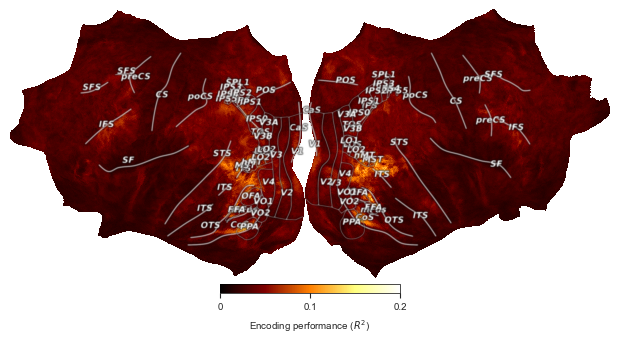

In [24]:
import os
import cortex
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

lh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/layer_preference_lh.csv')
rh = pd.read_csv('/root/Project/Cross-modal/Predictive_coding_new/layer_preference_rh.csv')

data = pd.concat([lh, rh])
data = data.to_numpy()
data = data.T

# data[7] = np.where(data[7]<0.04, np.nan, data[7])

fig= plt.figure(figsize=(6, 3))
surface = cortex.dataset.Vertex(data[7], subject='fsaverage', vmin=0, vmax=0.2, cmap='afmhot')
img = cortex.quickflat.make_figure(surface, with_colorbar=False, with_curvature=True, with_sulci=True, with_rois=True, with_labels=True, labelsize="24.9pt", colorbar_location=(0.4, 0, 0.2, 0.02), fig=fig)

sm = plt.cm.ScalarMappable(cmap='afmhot', norm=plt.Normalize(vmin=0, vmax=0.2))
cb = plt.colorbar(sm, ax=fig.axes[-1], fraction=0.03, pad=0.015, orientation="horizontal")
cb.set_label(r"Encoding performance ($R^2$) ", fontsize=fontsize)
cb.ax.tick_params(labelsize=fontsize)
cb.set_ticks([0, 0.1, 0.2])
cb.ax.set_xticklabels(['0', '0.1', '0.2'])
cb.outline.set_linewidth(0.5)
cb.outline.set_edgecolor('black')

fig.savefig(os.path.join(Figure_root, "Fig.6.png"), format="png", dpi=500, bbox_inches="tight")